In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import pandas as pd
import imageio
from IPython.display import Image

In [2]:
#read file
data_df = pd.read_csv('Trajectories/tr_ind.csv', index_col = False)
data_df.head()

Unnamed: 0    0    1    2    3    4    5    6    7    8    9   10   11  \
0           1  142  161  177  129  130  128  157  147  131  164  134  122   
1           2  139  156  172  131  128  125  155  144  129  158  130  120   
2           3  138  154  164  131  128  125  153  143  129  156  126  119   
3           4  137  152  164  130  128  125  151  143  131  156  126  120   
4           5  133  148  159  127  124  122  147  140  128  151  121  117   

    12   13  
0  143  151  
1  137  150  
2  137  144  
3  138  144  
4  134  141

In [3]:
data_df.columns = ['time',  '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13']

In [4]:
data_df.head()

time    0    1    2    3    4    5    6    7    8    9   10   11   12   13
0     1  142  161  177  129  130  128  157  147  131  164  134  122  143  151
1     2  139  156  172  131  128  125  155  144  129  158  130  120  137  150
2     3  138  154  164  131  128  125  153  143  129  156  126  119  137  144
3     4  137  152  164  130  128  125  151  143  131  156  126  120  138  144
4     5  133  148  159  127  124  122  147  140  128  151  121  117  134  141

In [5]:
#Get original data
path_tp = 'Triple_points_pos/'
tp = {}
for i in range(59):
    name = str(i+1) + '.txt'
    tp_name = path_tp + name
    tp[i] = np.loadtxt(tp_name)

tp    

{0: array([[ 85.,   4.],
        [ 67.,   5.],
        [125.,   5.],
        [  6.,   9.],
        [ 53.,   9.],
        [ 70.,   9.],
        [165.,   9.],
        [176.,  10.],
        [178.,  13.],
        [186.,  14.],
        [ 22.,  15.],
        [ 18.,  16.],
        [ 22.,  16.],
        [ 22.,  17.],
        [ 36.,  17.],
        [ 70.,  17.],
        [103.,  17.],
        [176.,  17.],
        [ 54.,  18.],
        [ 57.,  18.],
        [111.,  19.],
        [114.,  19.],
        [153.,  19.],
        [166.,  20.],
        [168.,  20.],
        [191.,  21.],
        [ 74.,  22.],
        [ 86.,  22.],
        [140.,  22.],
        [ 38.,  23.],
        [130.,  23.],
        [136.,  23.],
        [159.,  23.],
        [119.,  24.],
        [146.,  24.],
        [179.,  24.],
        [188.,  24.],
        [ 91.,  25.],
        [128.,  25.],
        [ 45.,  26.],
        [ 45.,  27.],
        [ 47.,  27.],
        [ 25.,  28.],
        [ 45.,  28.],
        [159.,  28.],
       

In [6]:
arr = data_df.columns
arr1 = arr[1:]
arr1

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')

In [7]:
tp_dict = {}
for i in range(59):
    tp_dict[i] = np.array([tp[i][data_df[j][i]] for j in arr1])
        

In [8]:
tp_dict[13].shape

(14, 2)

## Adjacency matrix dictionary

In [9]:
adj_mat = [[0,1,0,0,1,1,0,0,0,0,0,0,0,0],
           [1,0,1,0,0,0,1,0,0,0,0,0,0,0],
           [0,1,0,0,0,0,0,0,0,1,0,0,0,0],
           [0,0,0,0,1,0,1,0,0,0,0,0,0,0],
           [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
           [1,0,0,0,0,0,0,0,1,0,0,0,0,0],
           [0,1,0,1,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,1,1,0,0,0,1],
           [0,0,0,0,0,1,0,1,0,0,0,1,0,0],
           [0,0,1,0,0,0,0,1,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,0,1,1,0],
           [0,0,0,0,0,0,0,0,1,0,1,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,1,0,0,1],
           [0,0,0,0,0,0,0,1,0,0,0,0,1,0]]

In [10]:
adj_dict = {}
for i in range(59):
    adj_dict[i] = np.array(adj_mat)


## Visualising

In [11]:
class grain_img():
    def __init__(self, tp, adj):
        self.tp = tp
        self.adj = adj
        
    def grain_plot(self, ind):
        edge = np.array(np.where(self.adj[ind] == 1))
        _, l = len(edge), len(np.transpose(edge))
        new = np.sort(np.transpose(edge))
        
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot()
        ax.scatter(self.tp[ind][:,0], self.tp[ind][:,1])
        for i in range(len(self.tp[ind])):
            plt.annotate(i,[self.tp[ind][i,0],self.tp[ind][i,1]])
        for i in range(l):
            val1 = [self.tp[ind][new[i,0],1], self.tp[ind][new[i,1],1]]
            val2 = [self.tp[ind][new[i,0],0], self.tp[ind][new[i,1],0]]
            #print(val1,val2)
            #print("\n")
            ax.plot(val2,val1)
            #plt.show()
        ax.set_aspect('equal', adjustable='box')
        plt.savefig(f'track_plots/plot_{ind}.png')
        plt.show()              
      
    
    
    def plot_upd(self, n):
        plt.clf()
        self.grain_plot(n)
        
    def plotly_grain_plot(self):
        slider = IntSlider(min=1, max=59, step=1, value=1)
        interact(self.plot_upd, n=slider)

In [12]:
def save_plots(tp, adj):
    for ind in range(59):
        edge = np.array(np.where(adj[ind] == 1))
        _, l = len(edge), len(np.transpose(edge))
        new = np.sort(np.transpose(edge))
        
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot()
        ax.scatter(tp[ind][:,0],tp[ind][:,1])
        for i in range(len(tp[ind])):
            plt.annotate(i,[tp[ind][i,0],tp[ind][i,1]])
        for i in range(l):
            val1 = [tp[ind][new[i,0],1], tp[ind][new[i,1],1]]
            val2 = [tp[ind][new[i,0],0], tp[ind][new[i,1],0]]
            #print(val1,val2)
            #print("\n")
            ax.plot(val2,val1)
            #plt.show()
        ax.set_aspect('equal', adjustable='box')
        ax.set_title(str(ind))
        ax.set_xlim(40,110)
        ax.set_ylim(50,110)
        plt.savefig(f'track_plots/plot_{ind}.png')
        plt.show()           
    

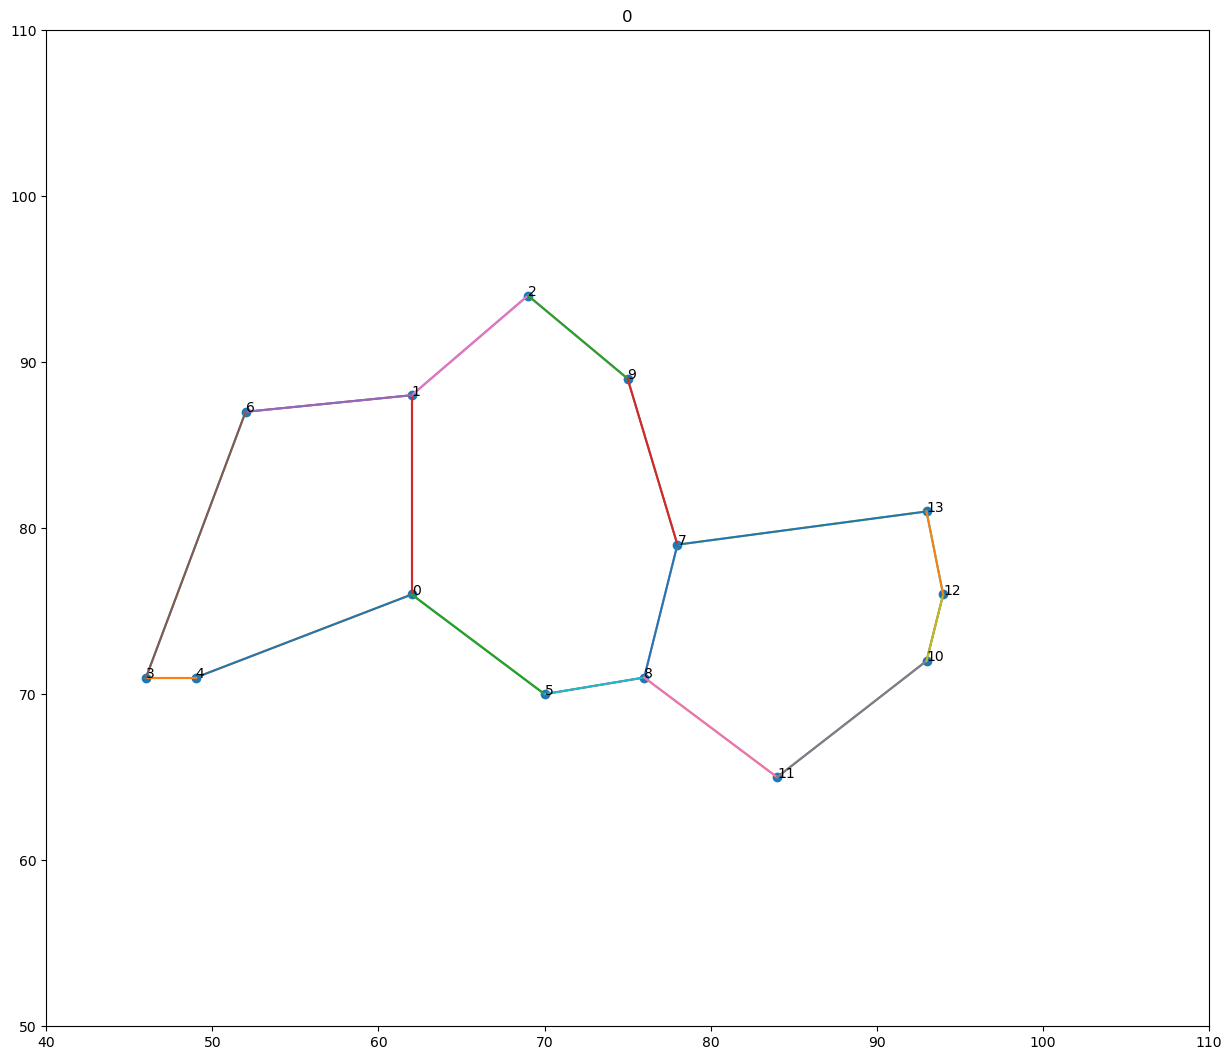

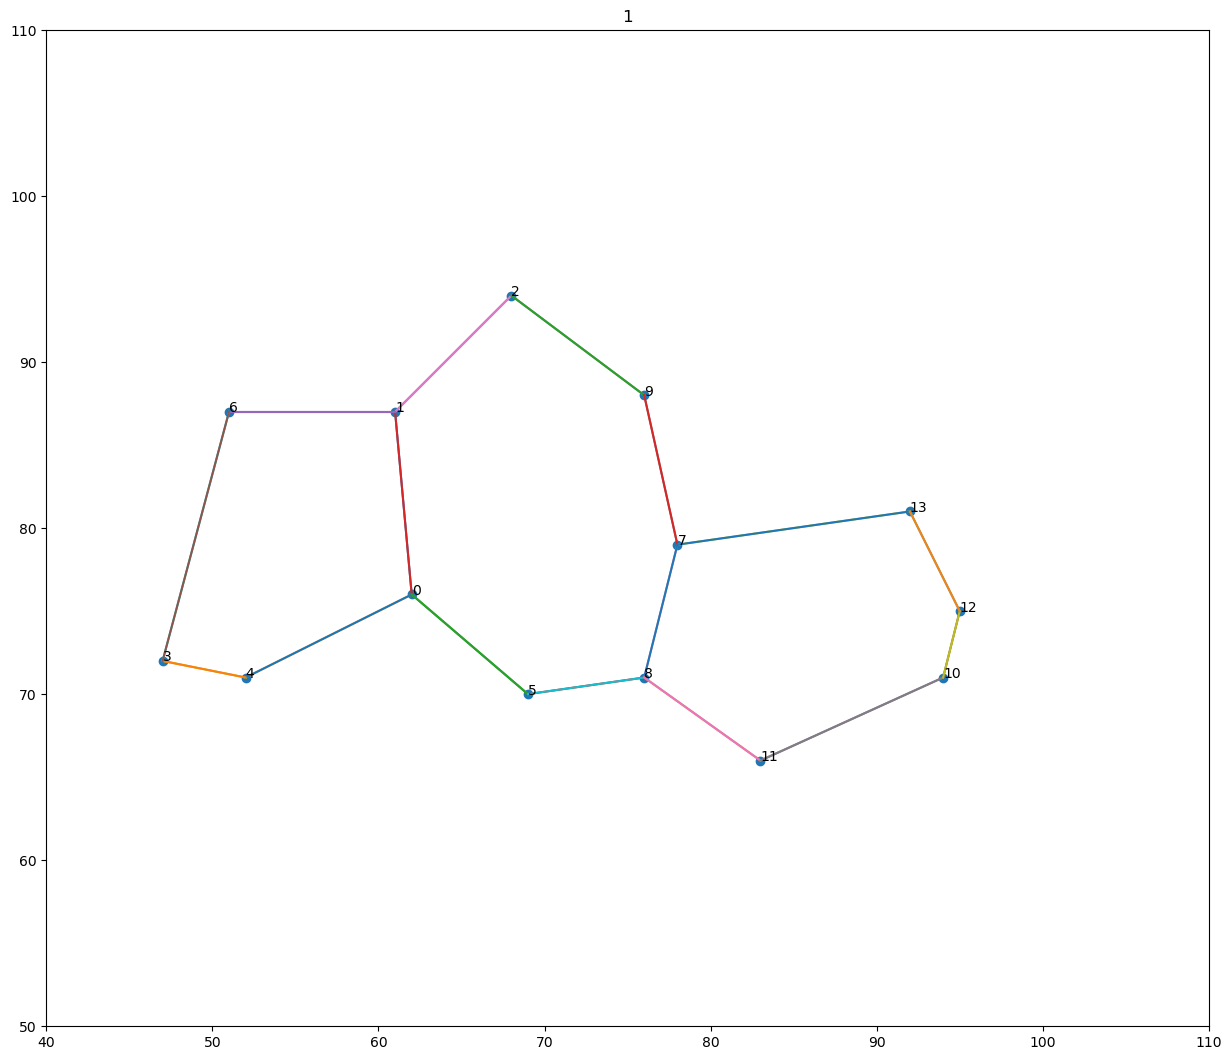

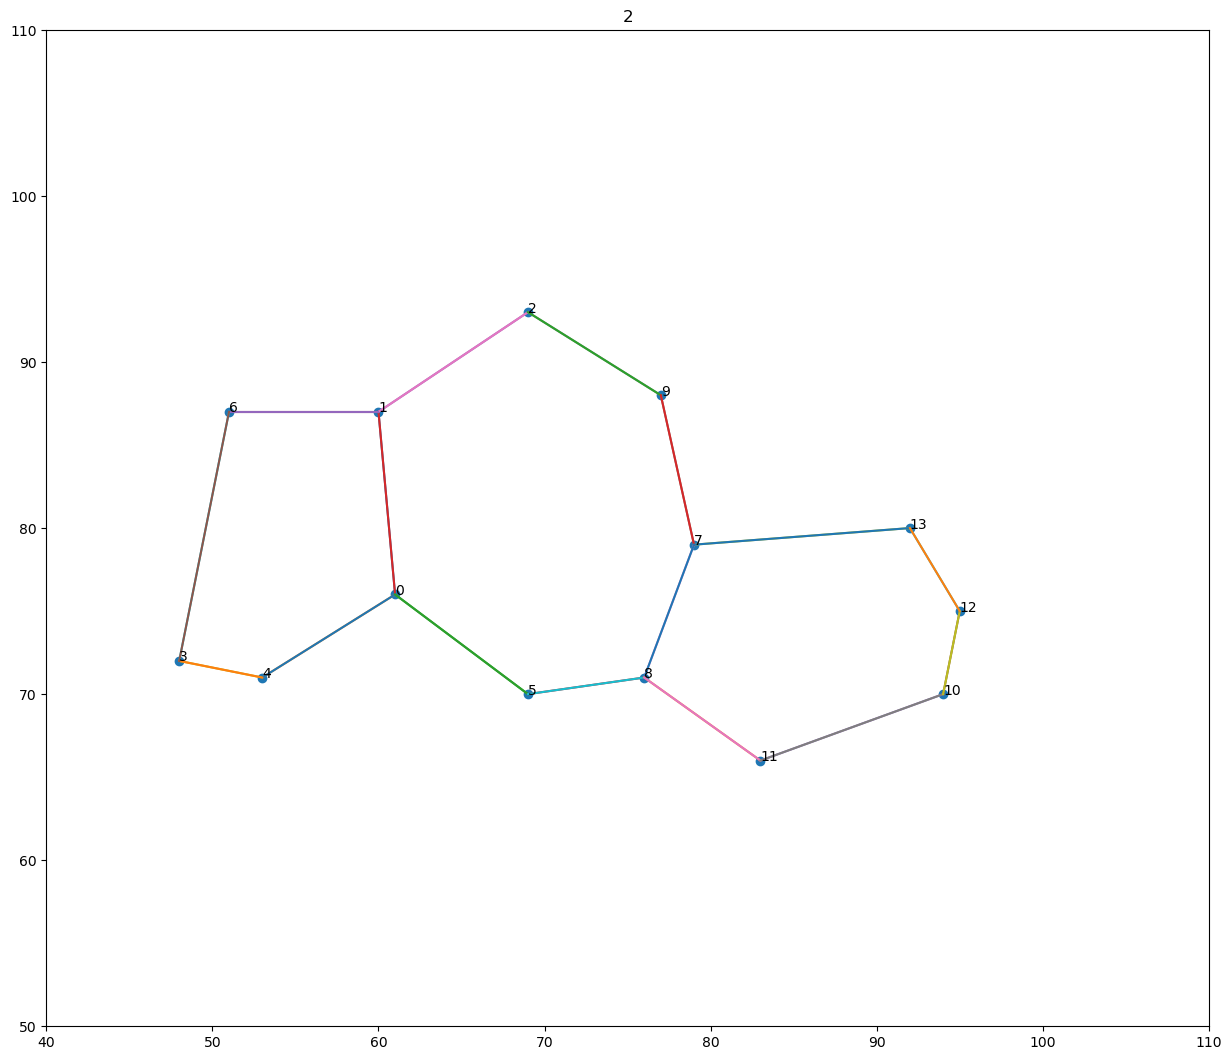

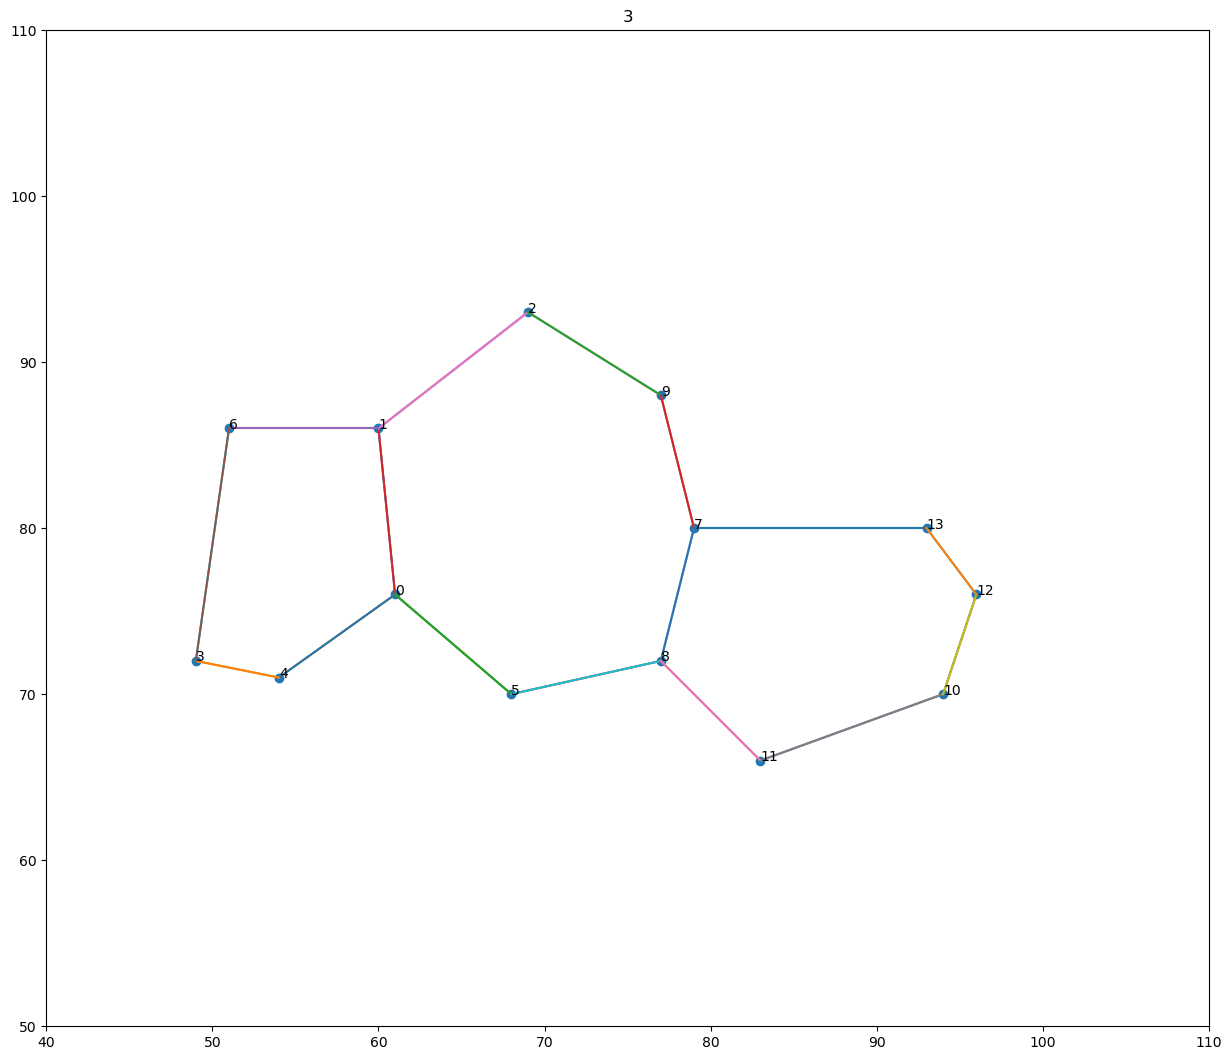

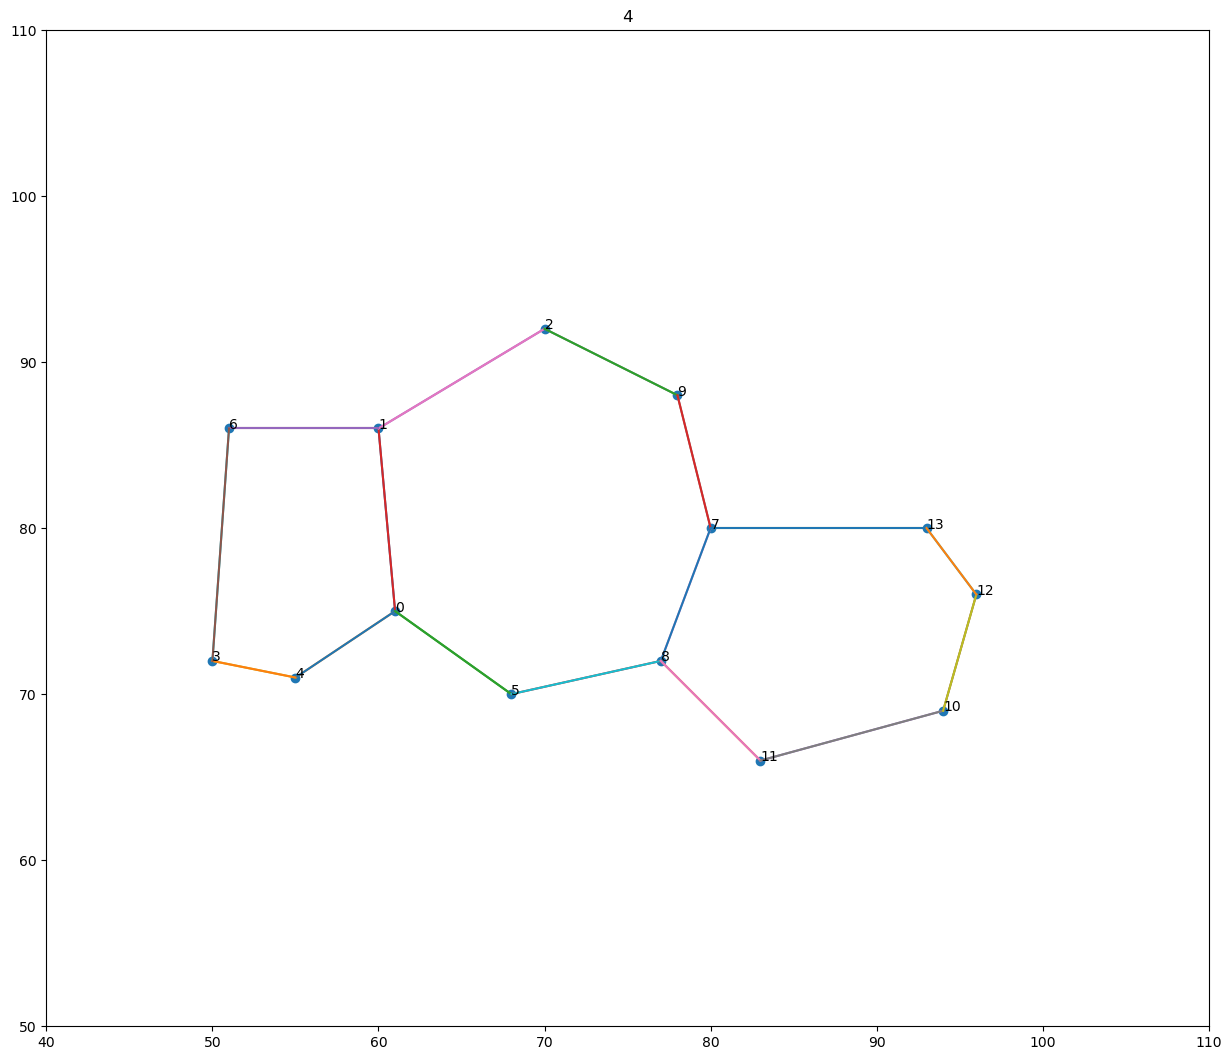

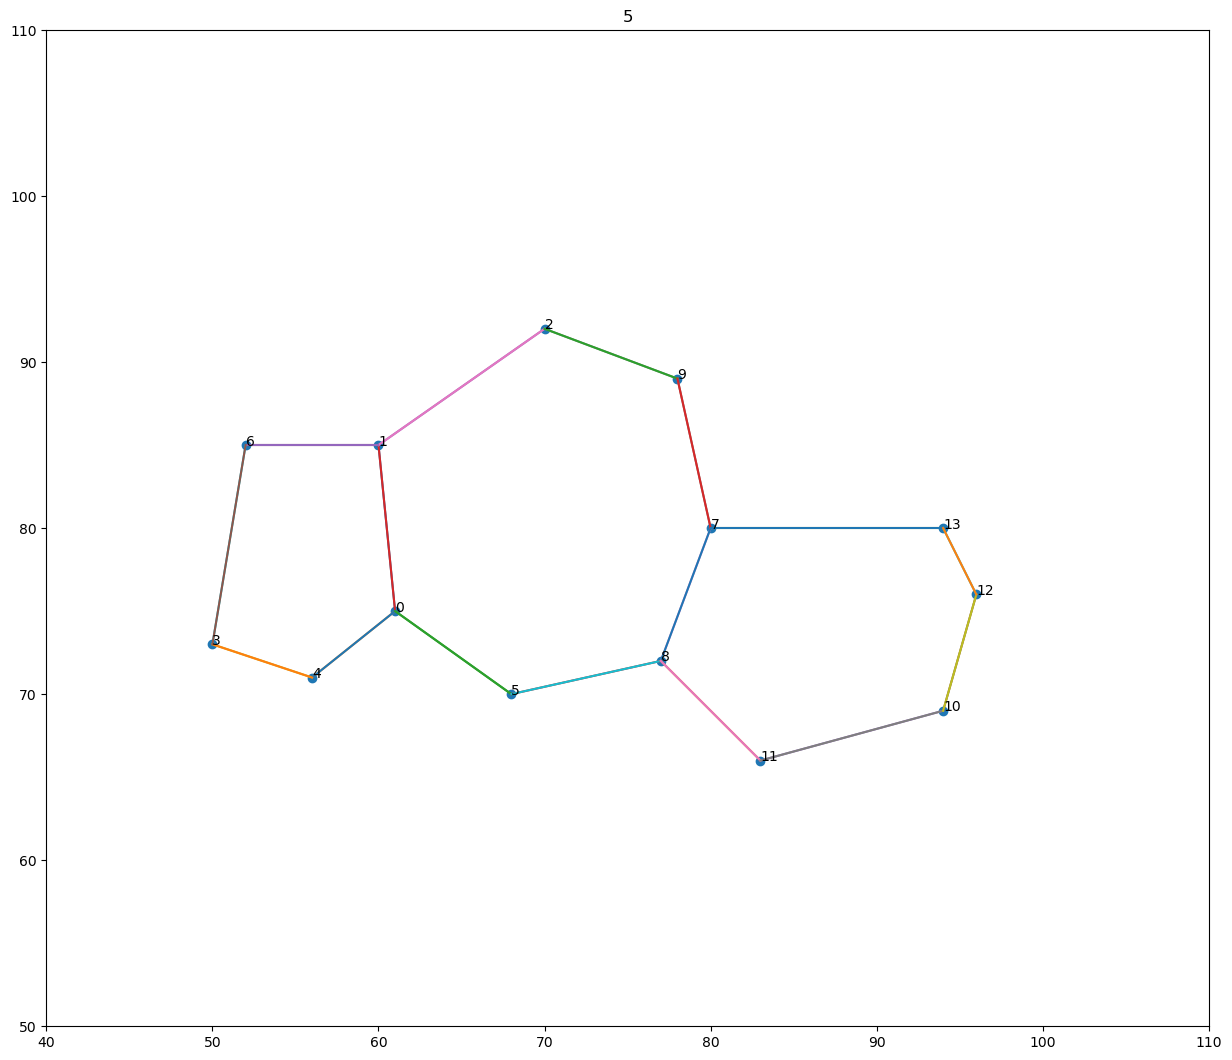

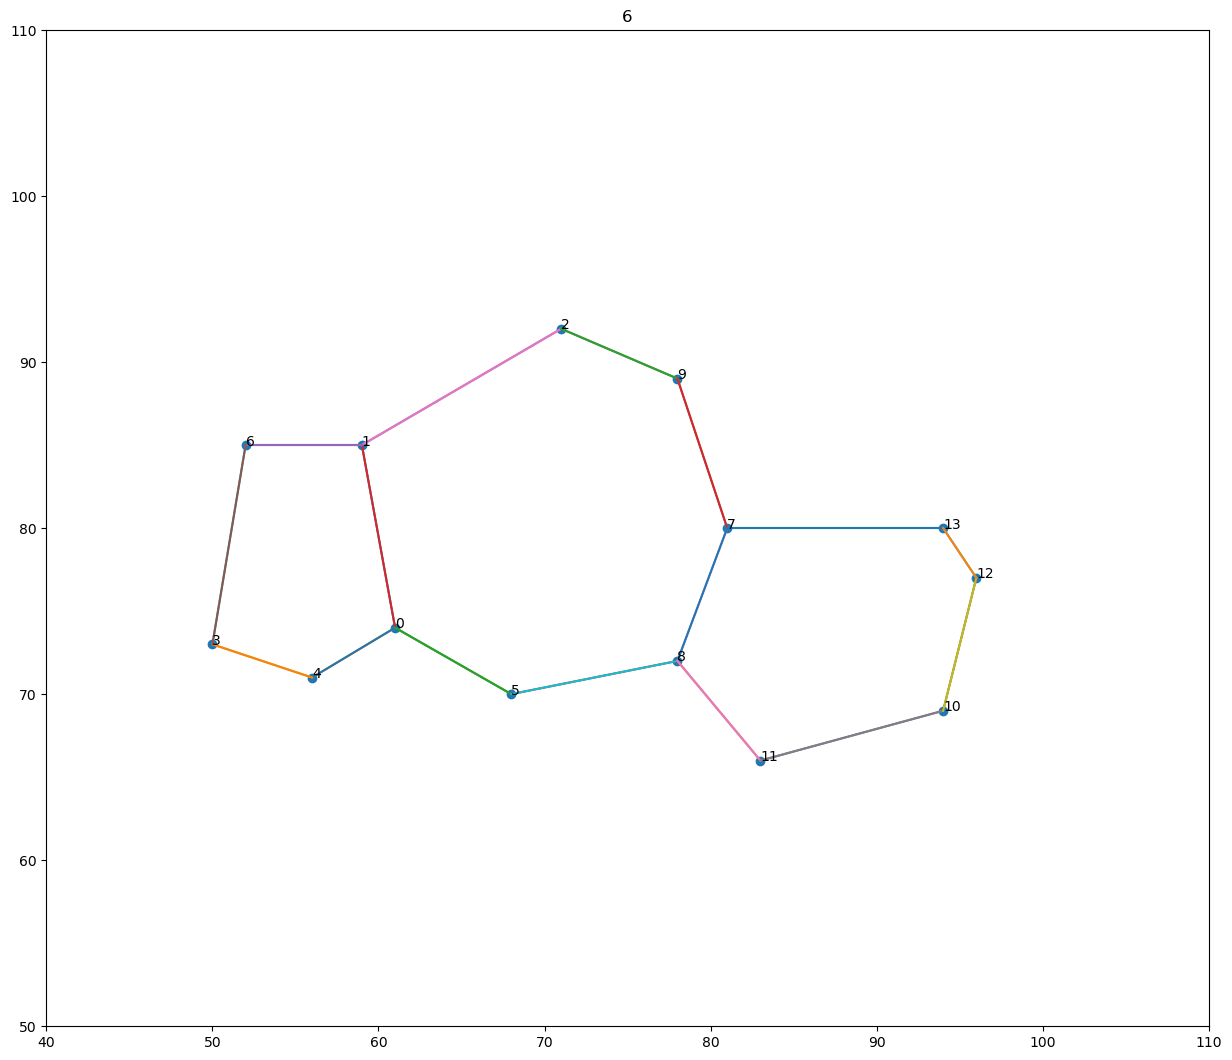

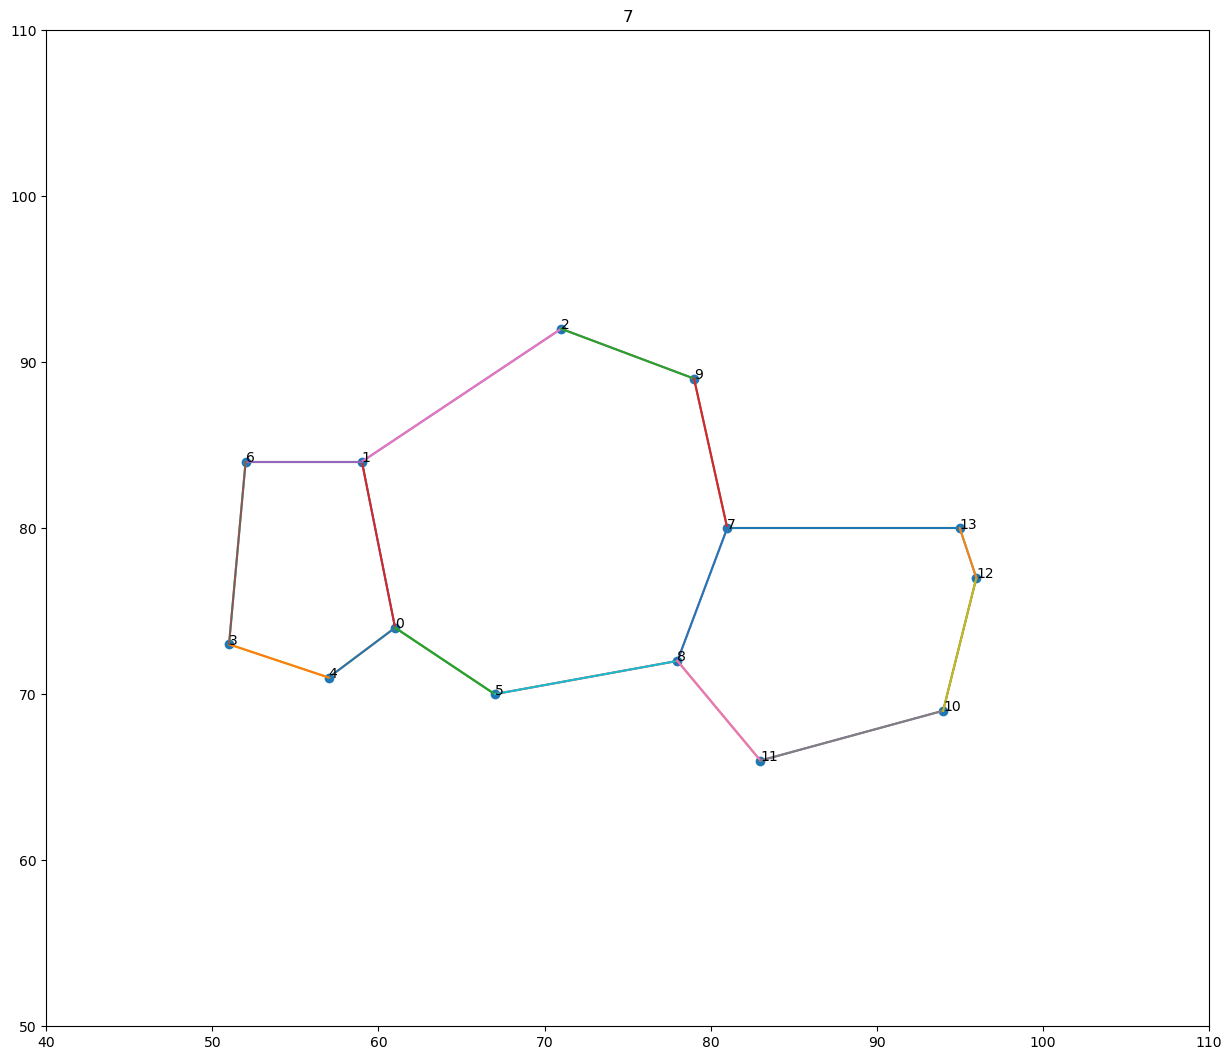

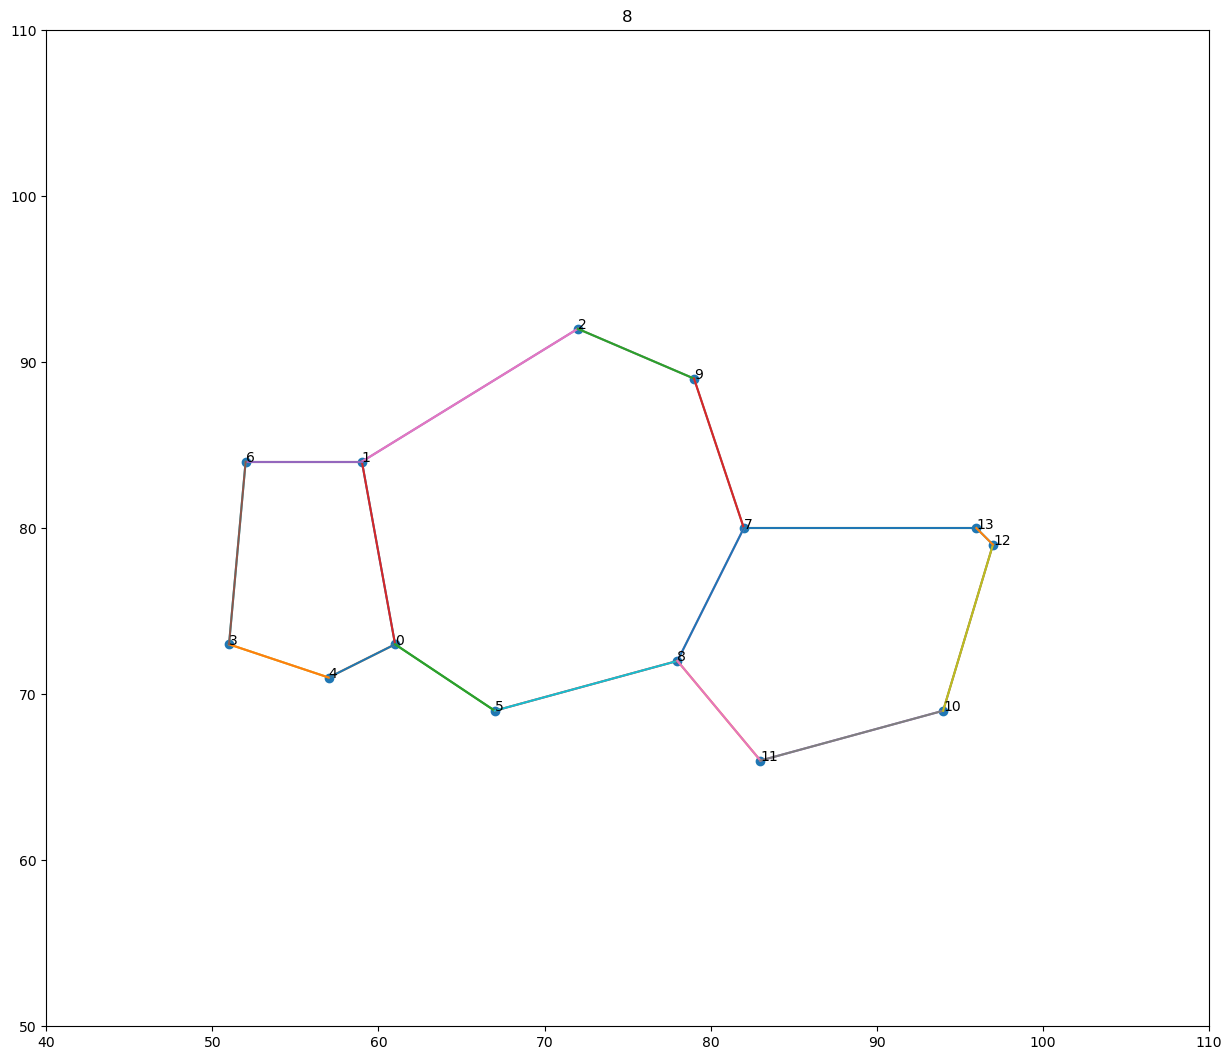

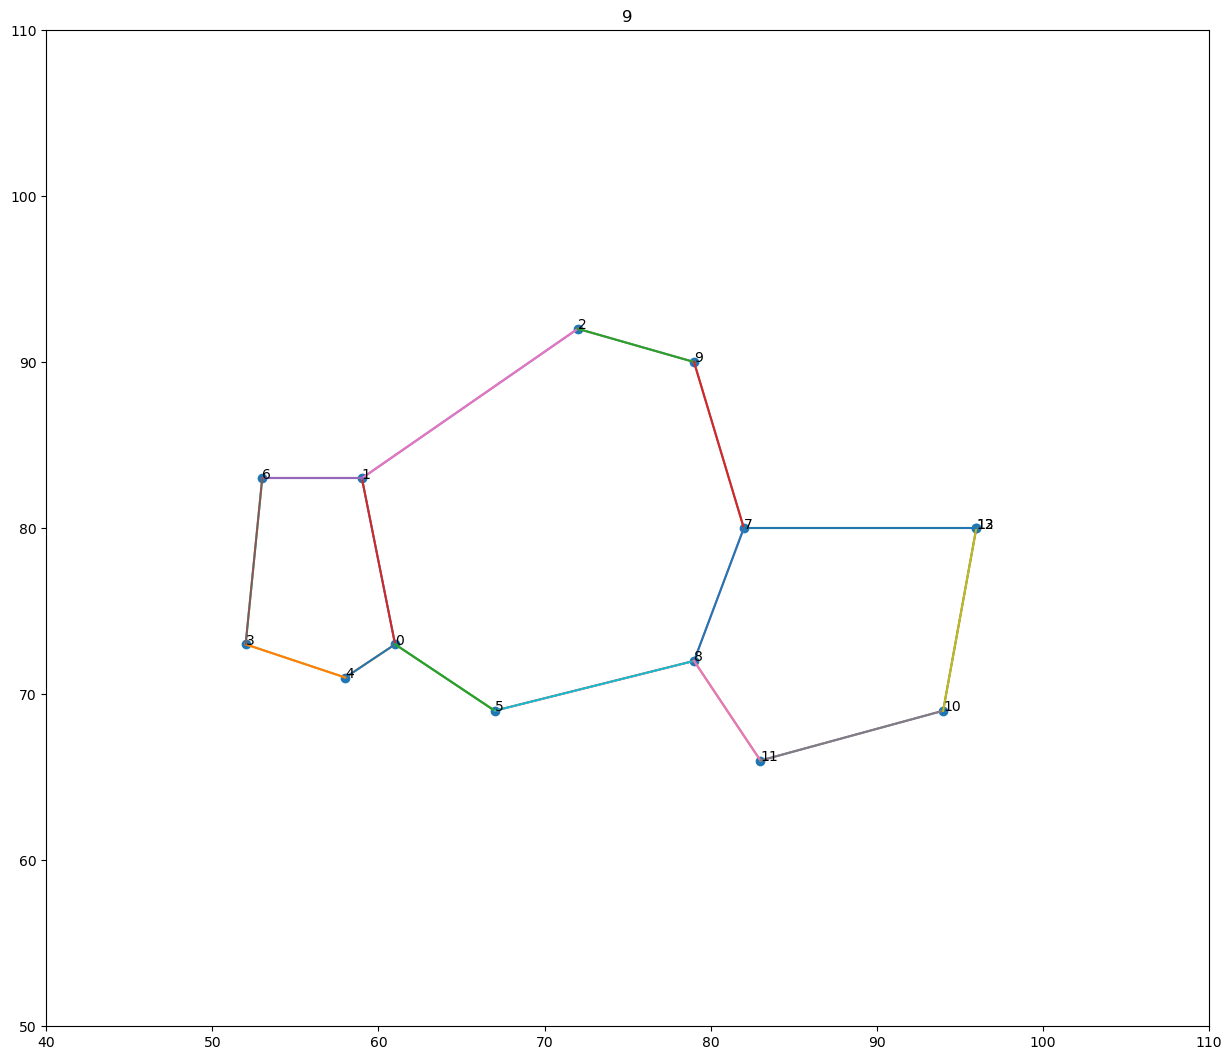

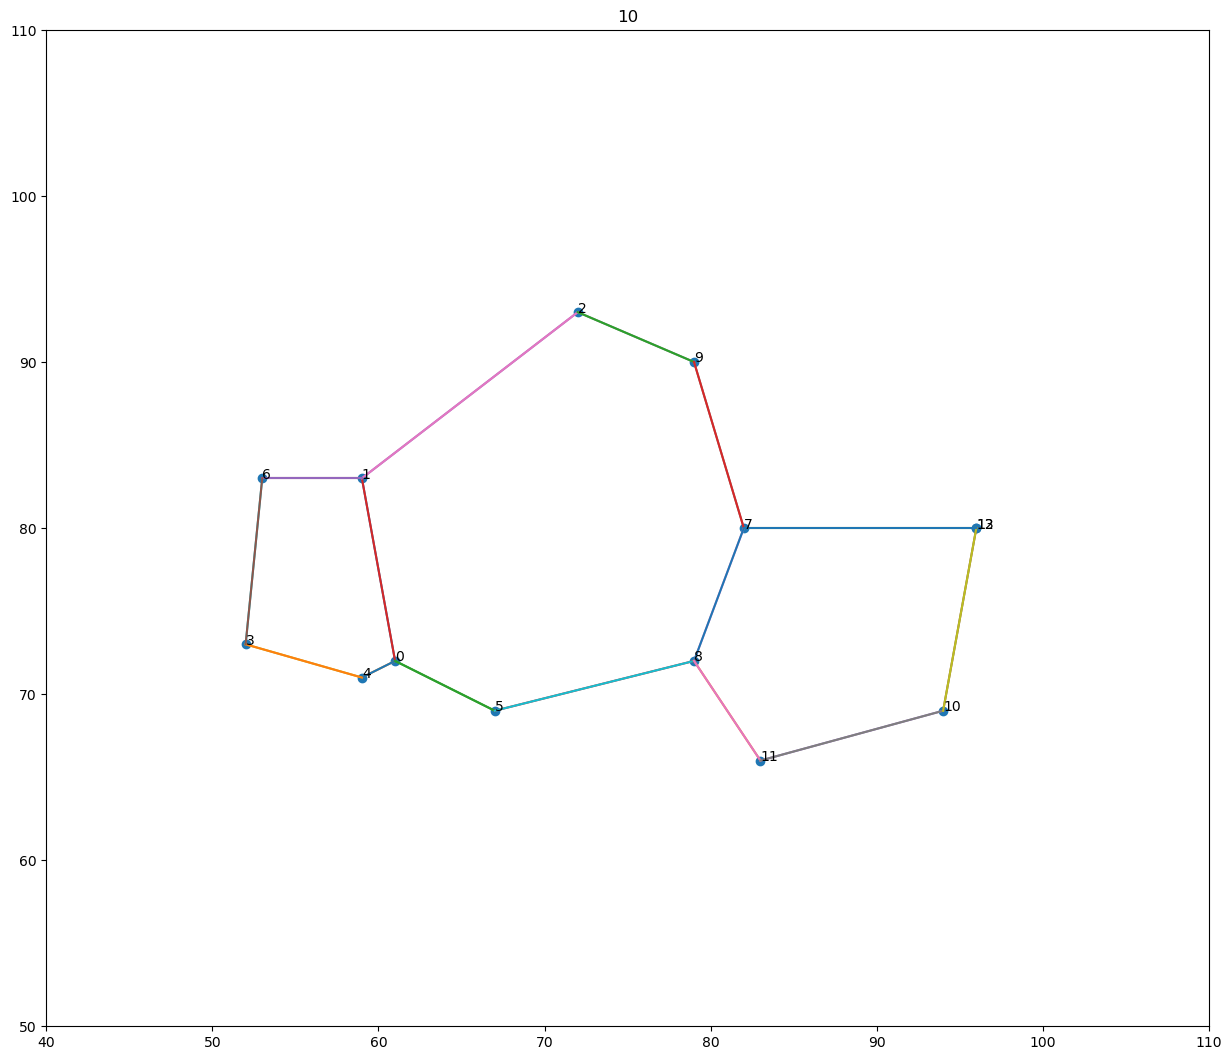

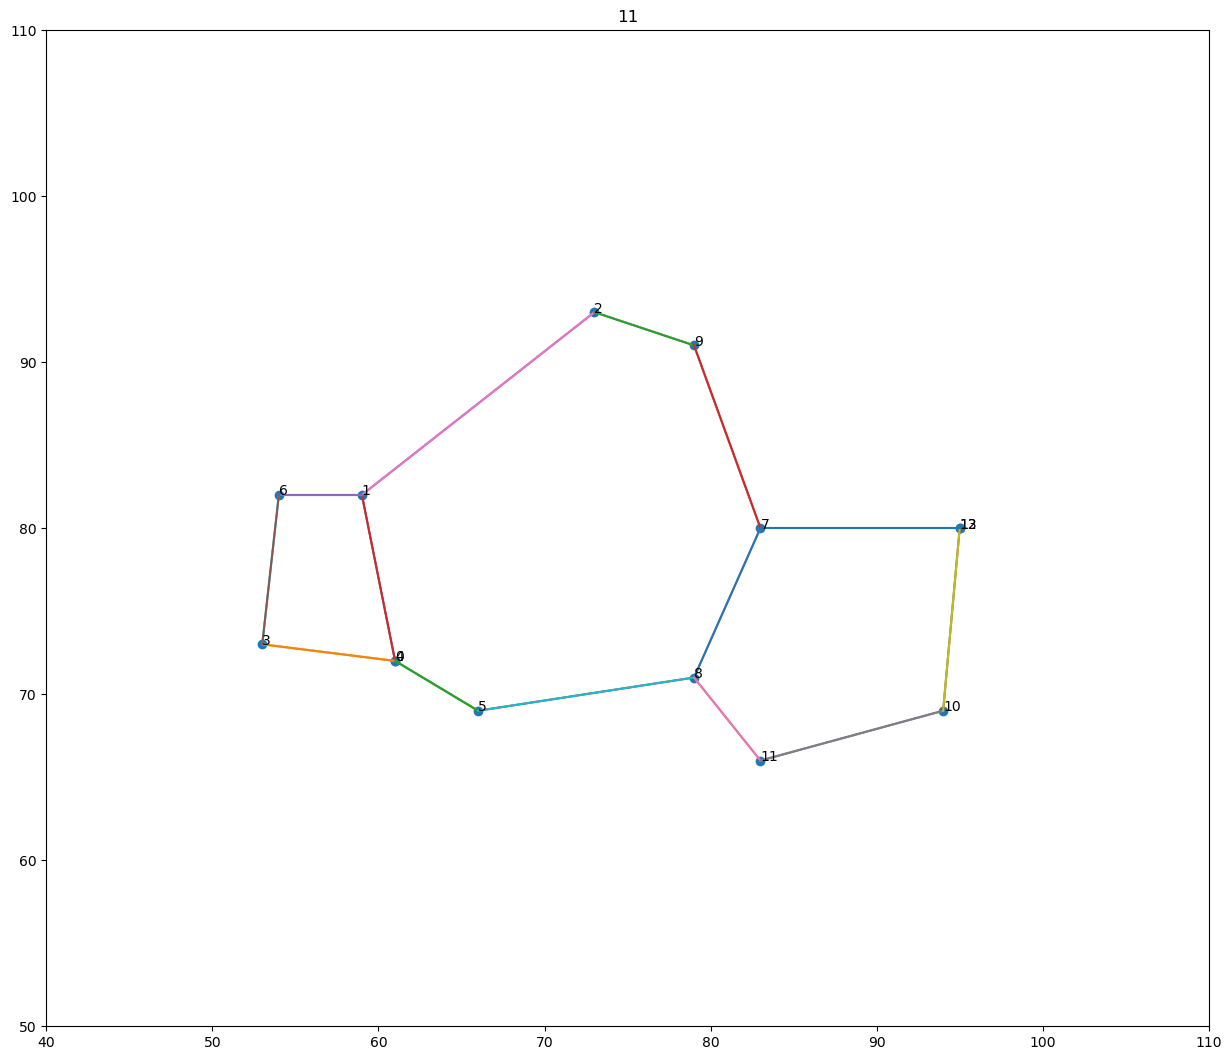

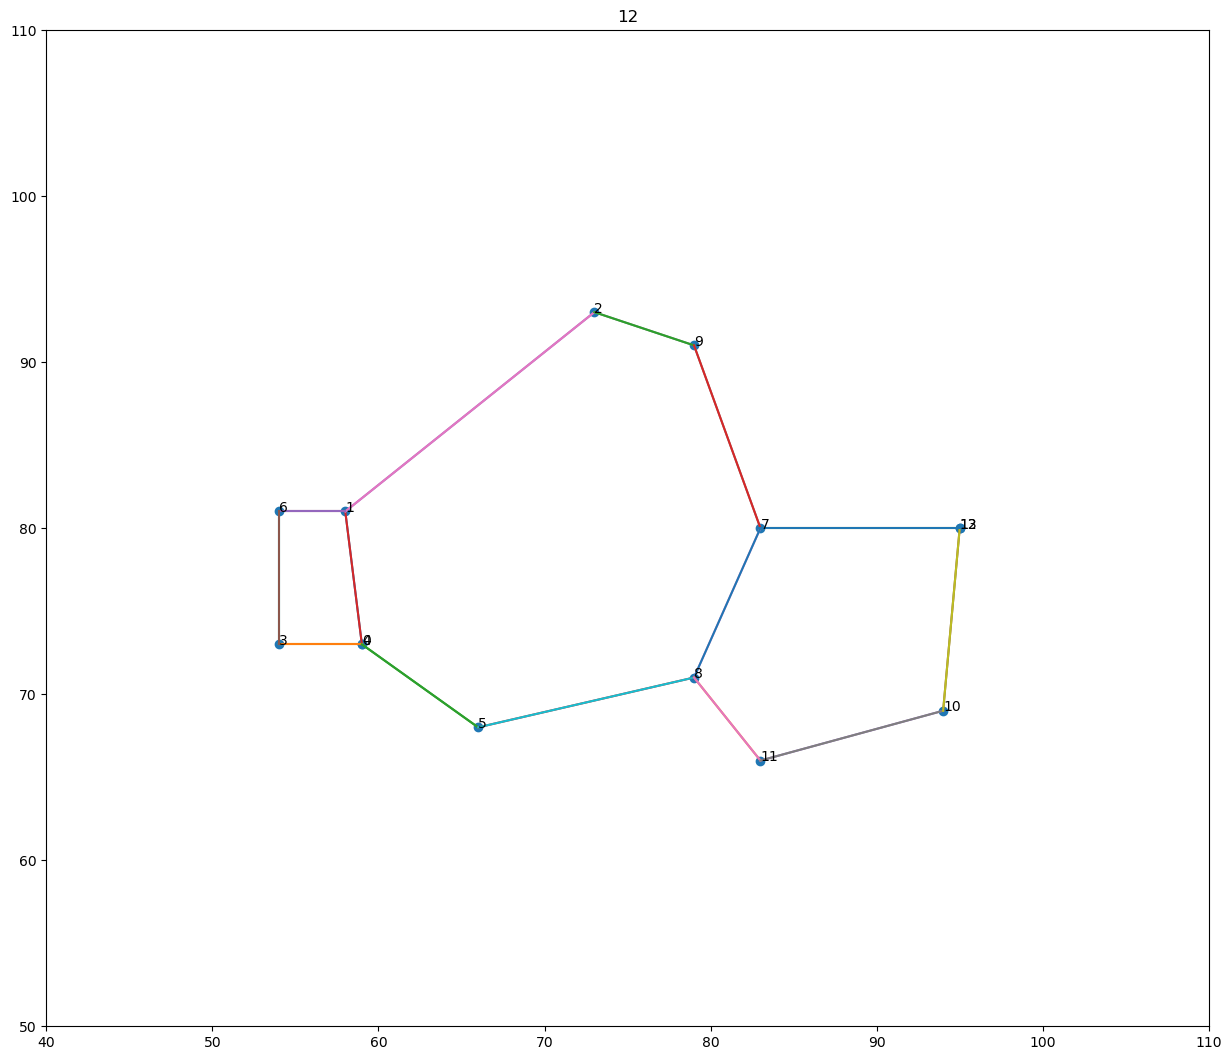

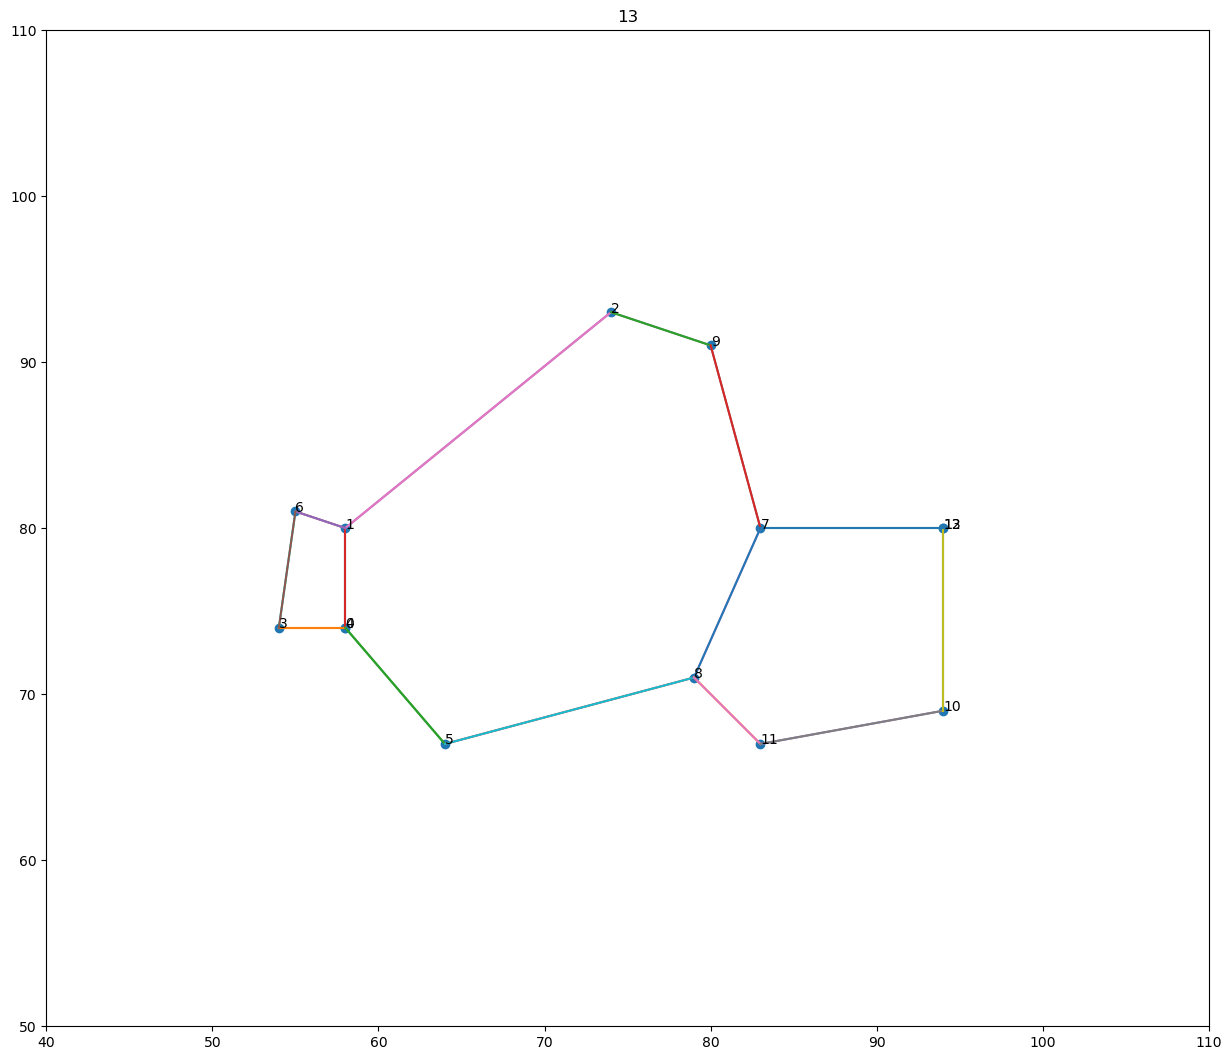

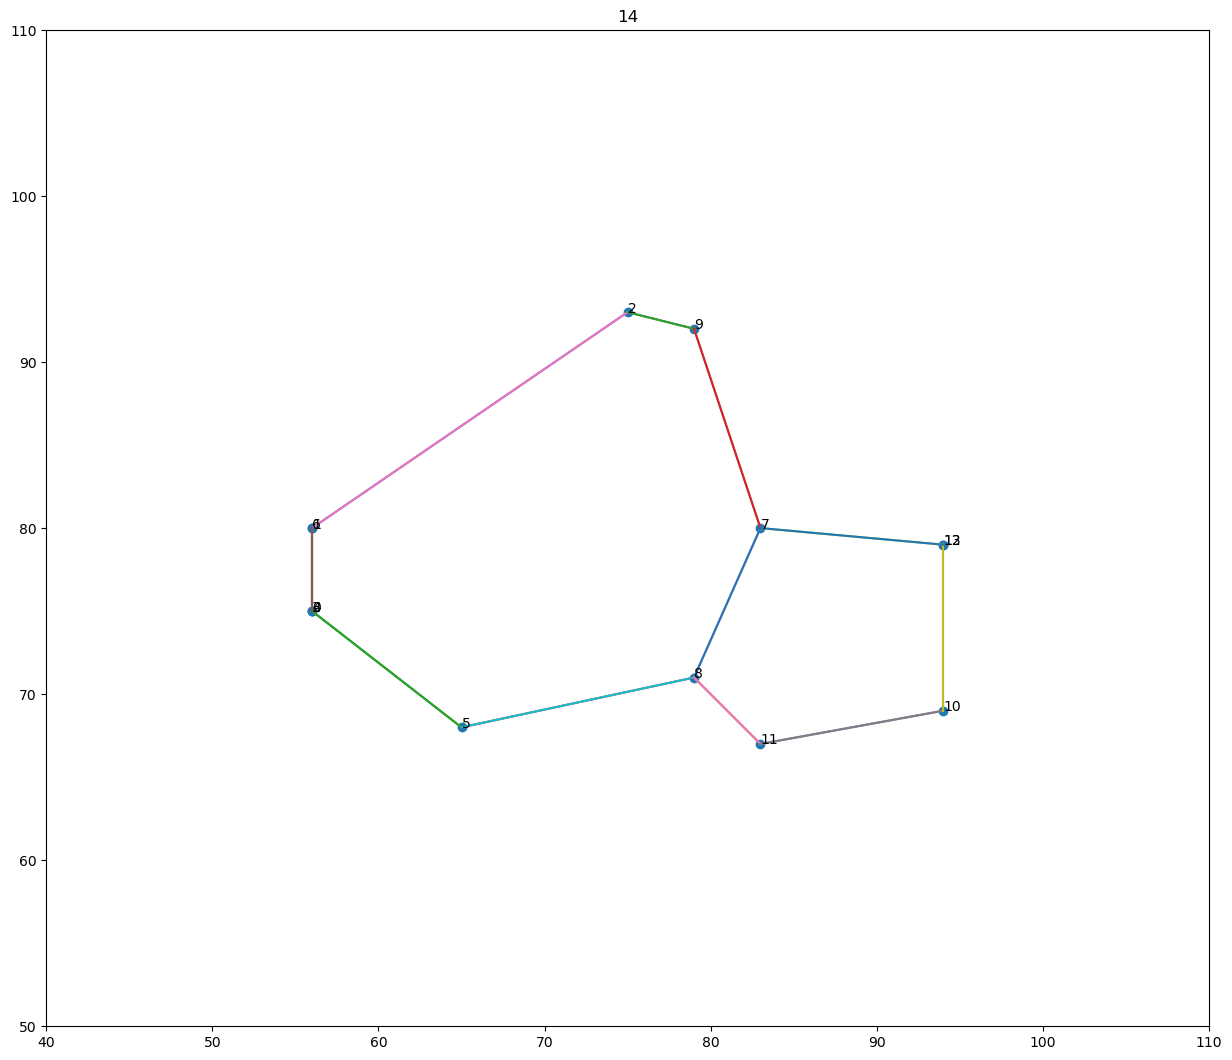

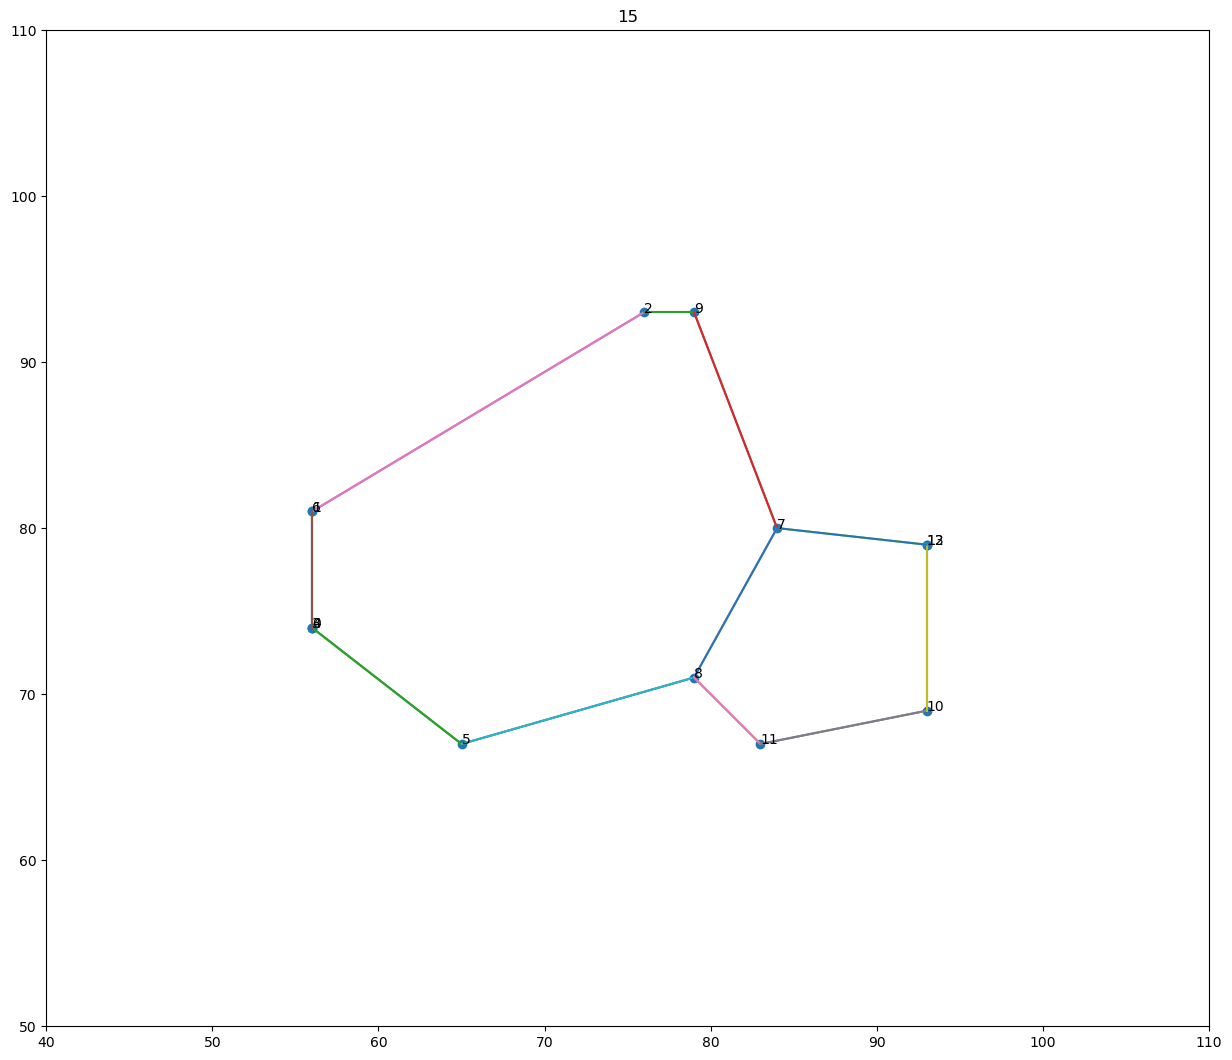

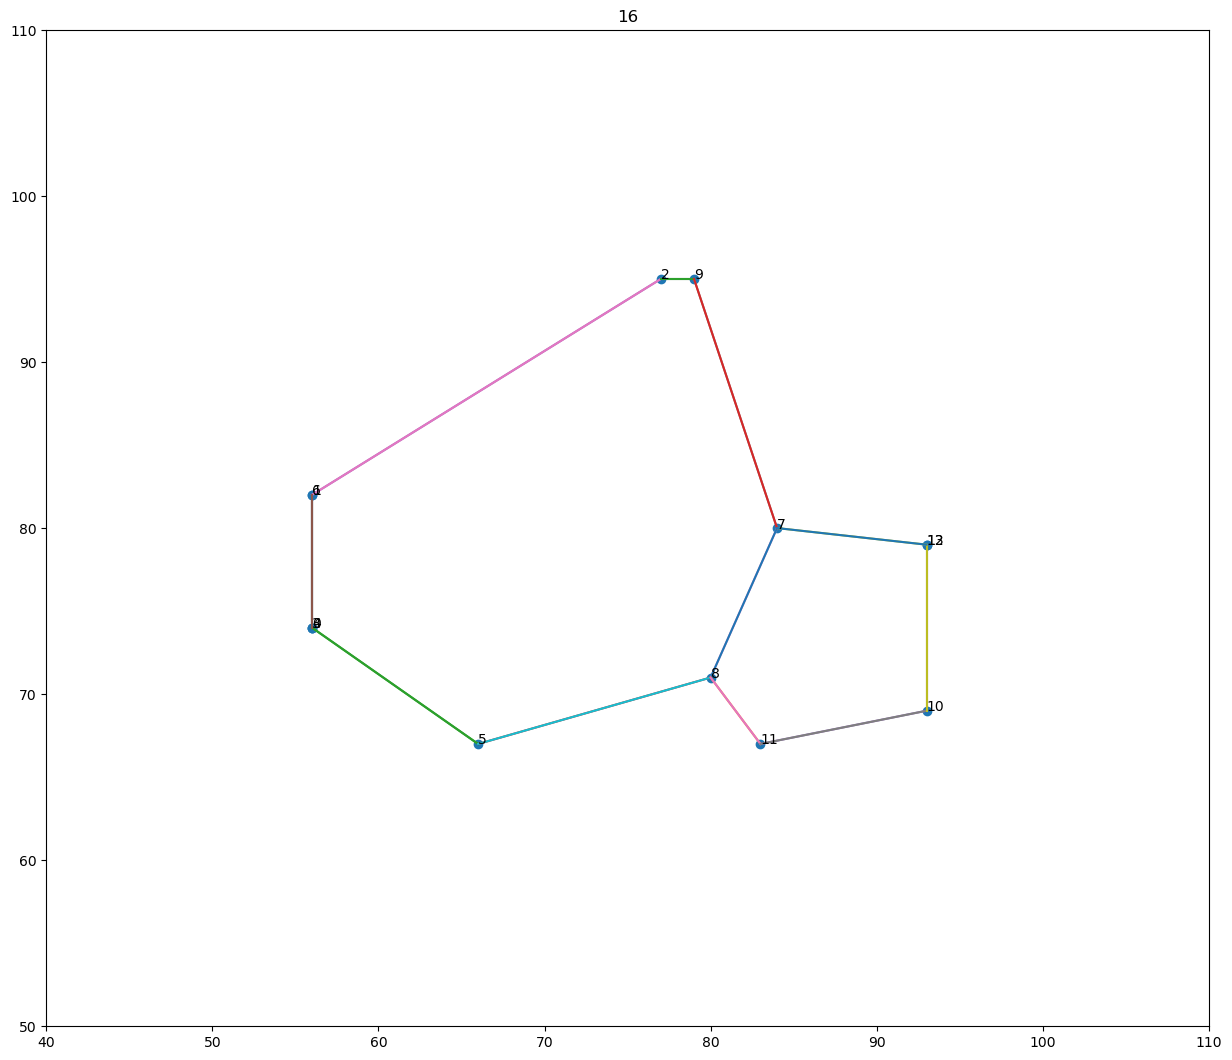

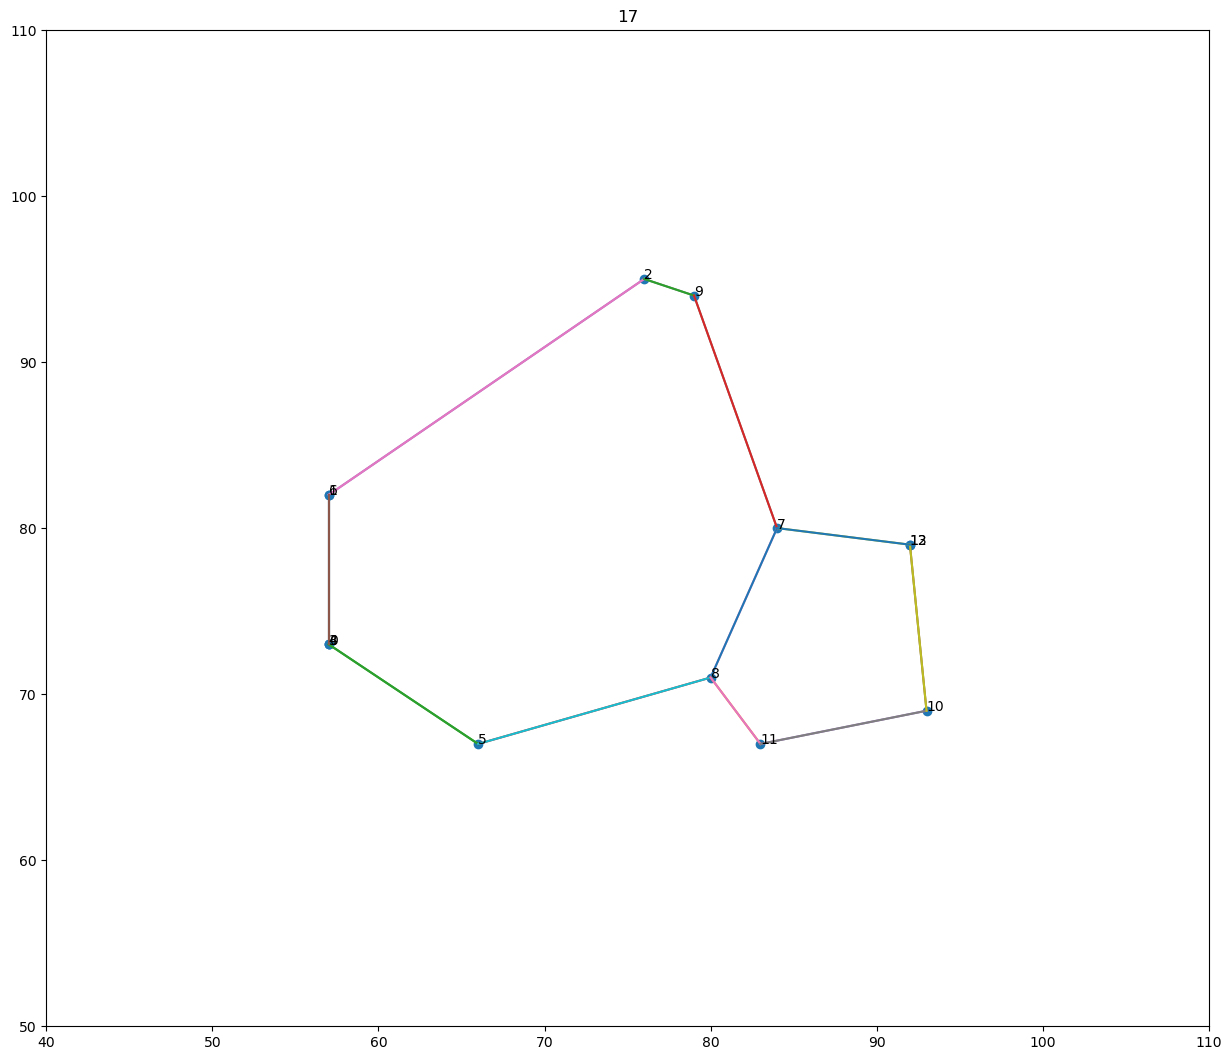

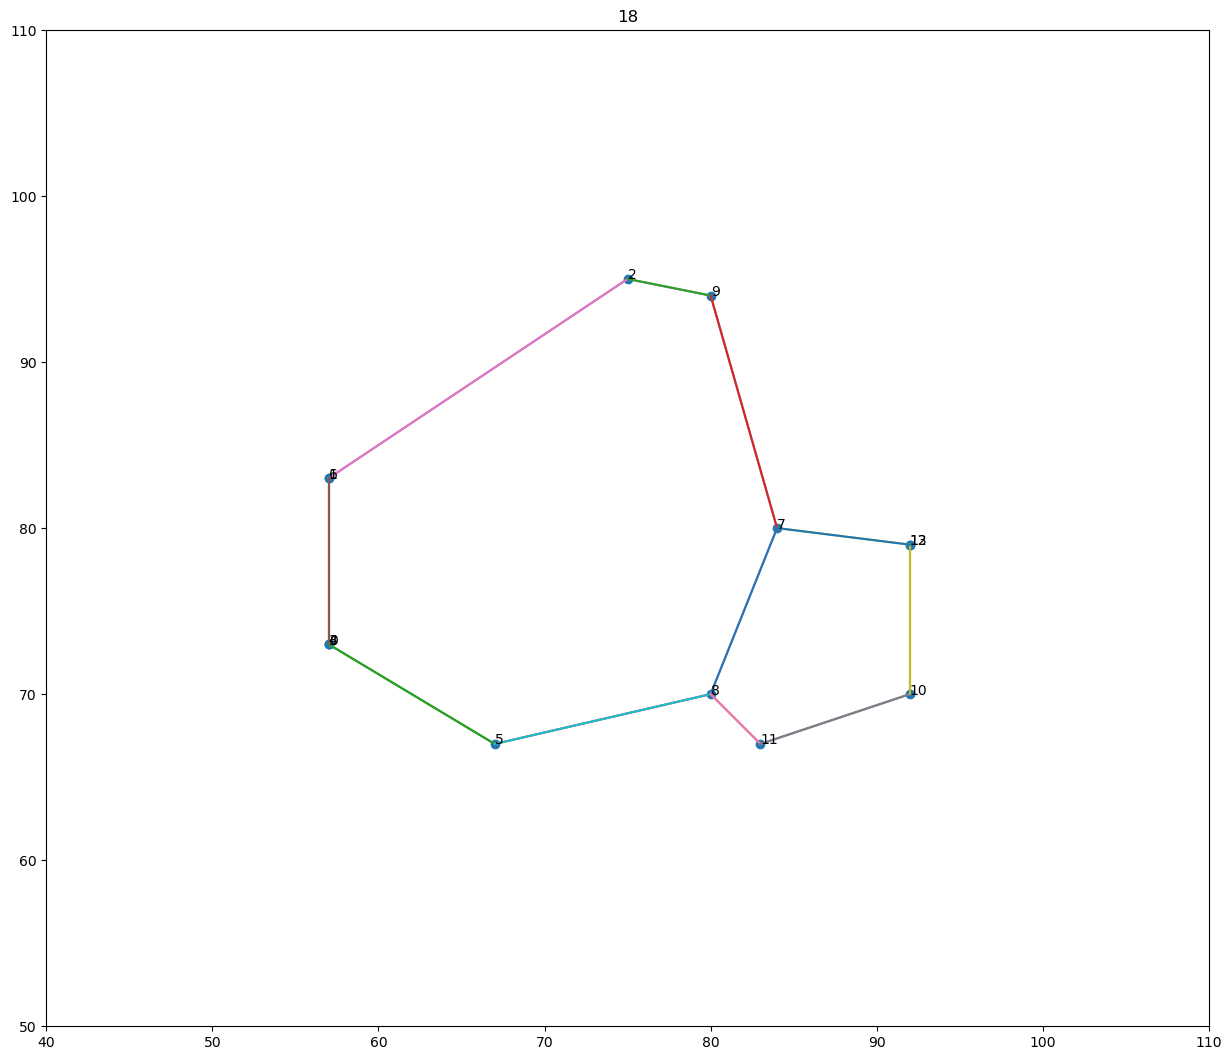

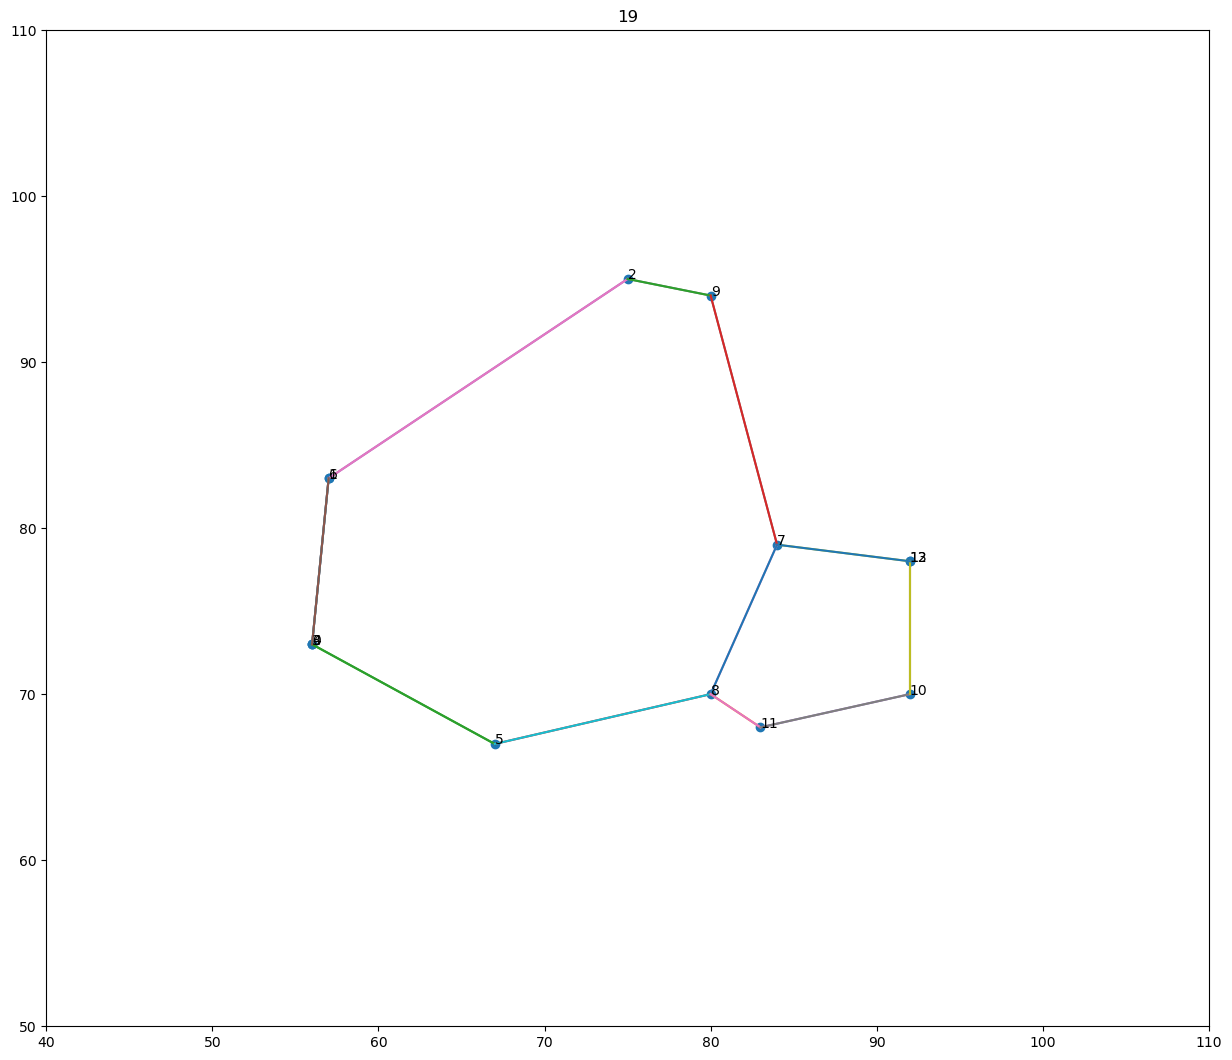

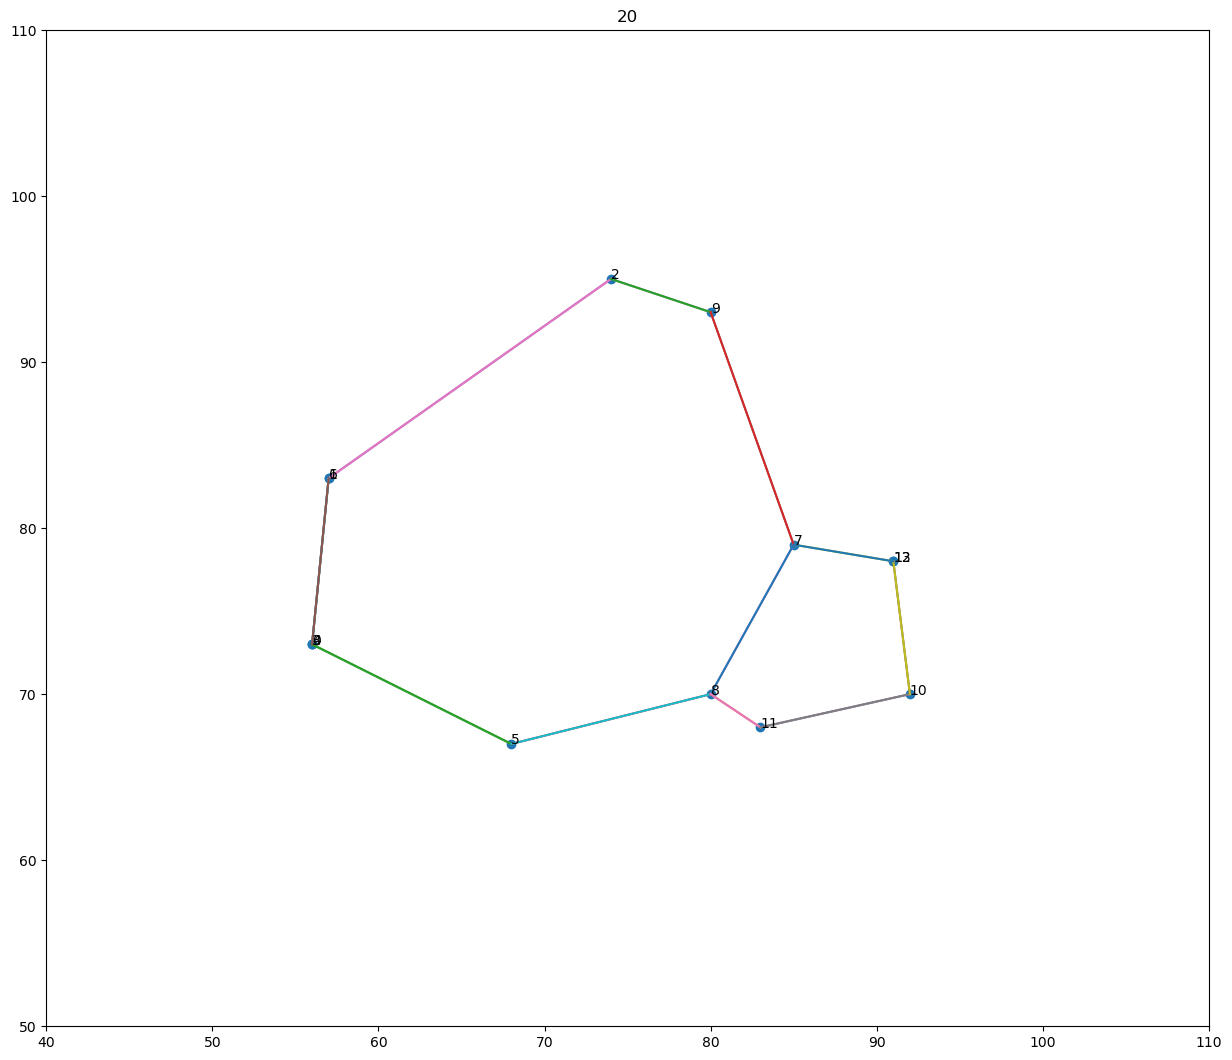

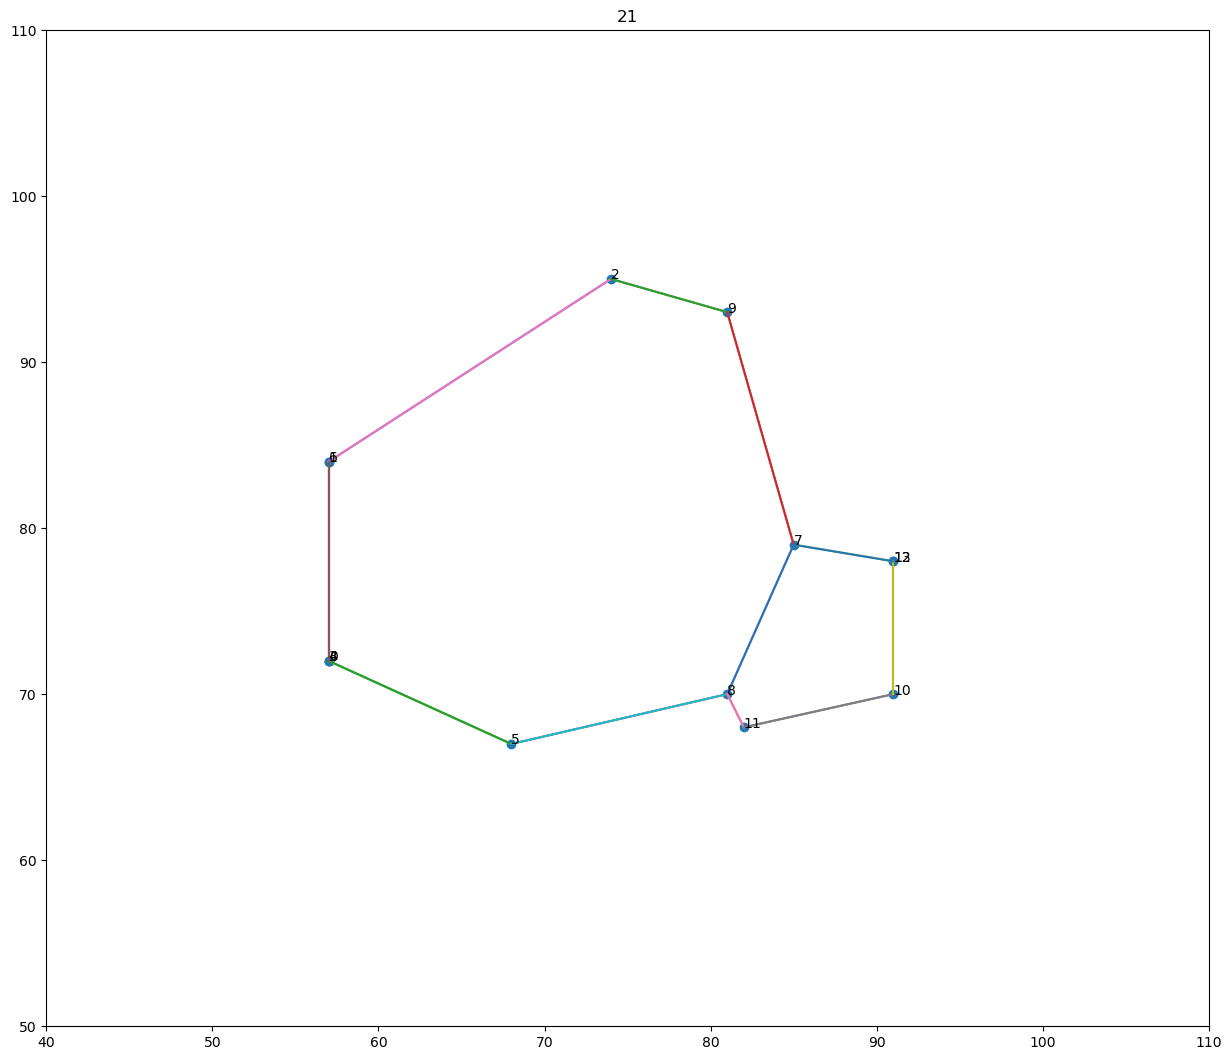

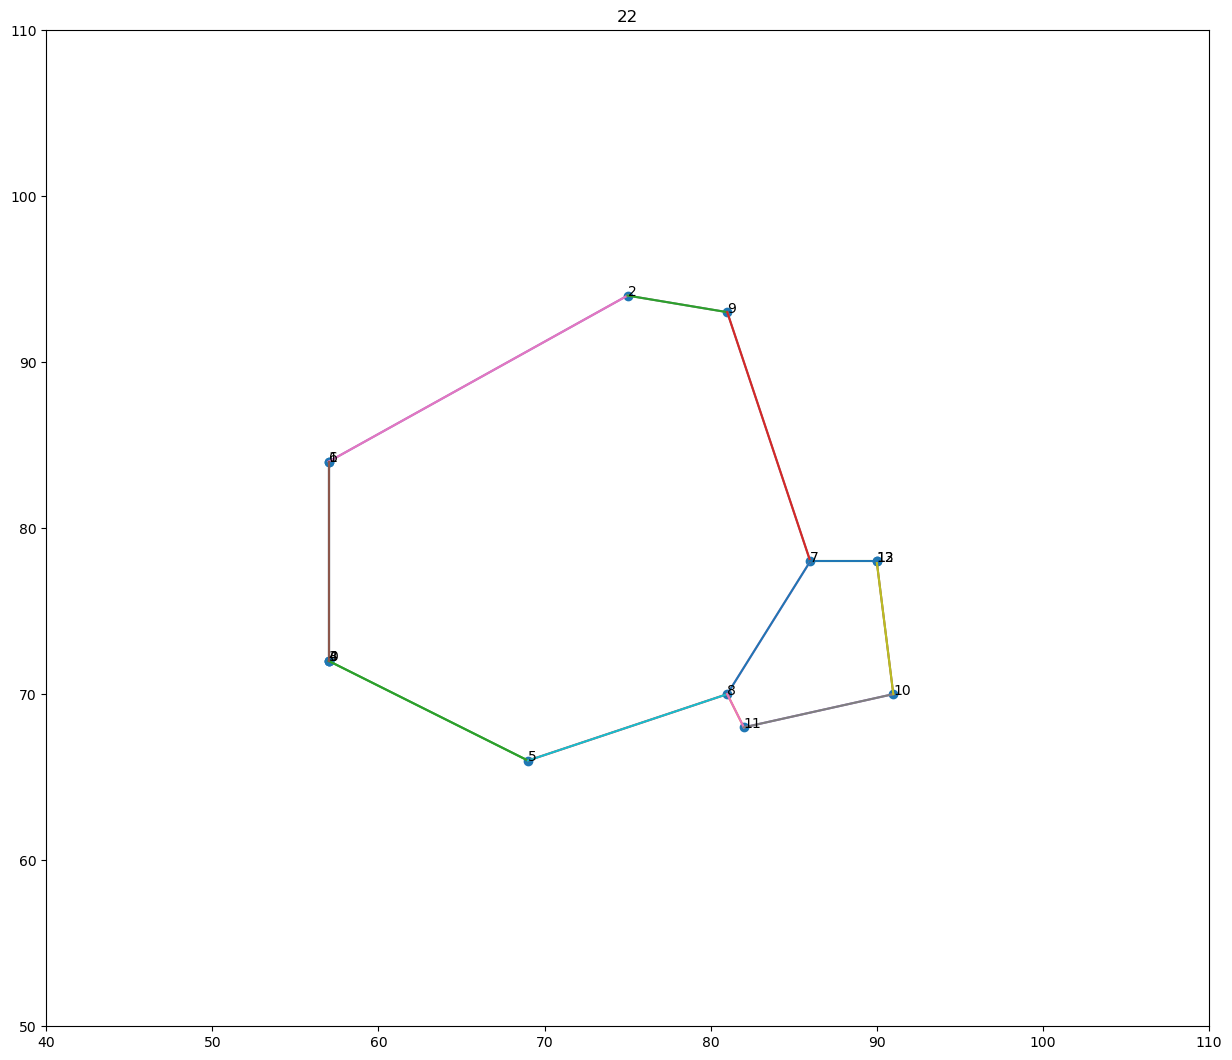

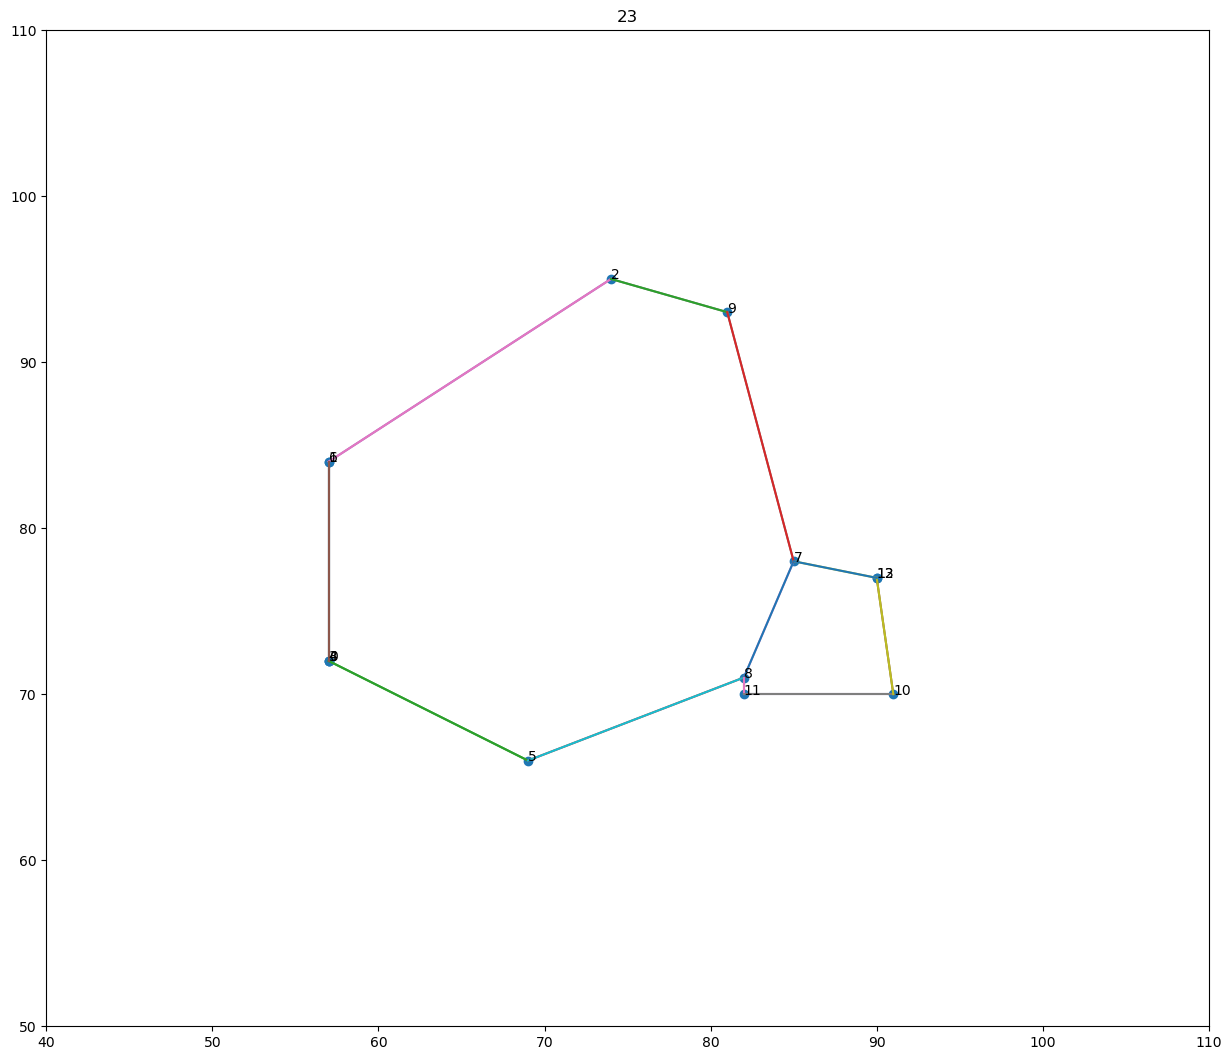

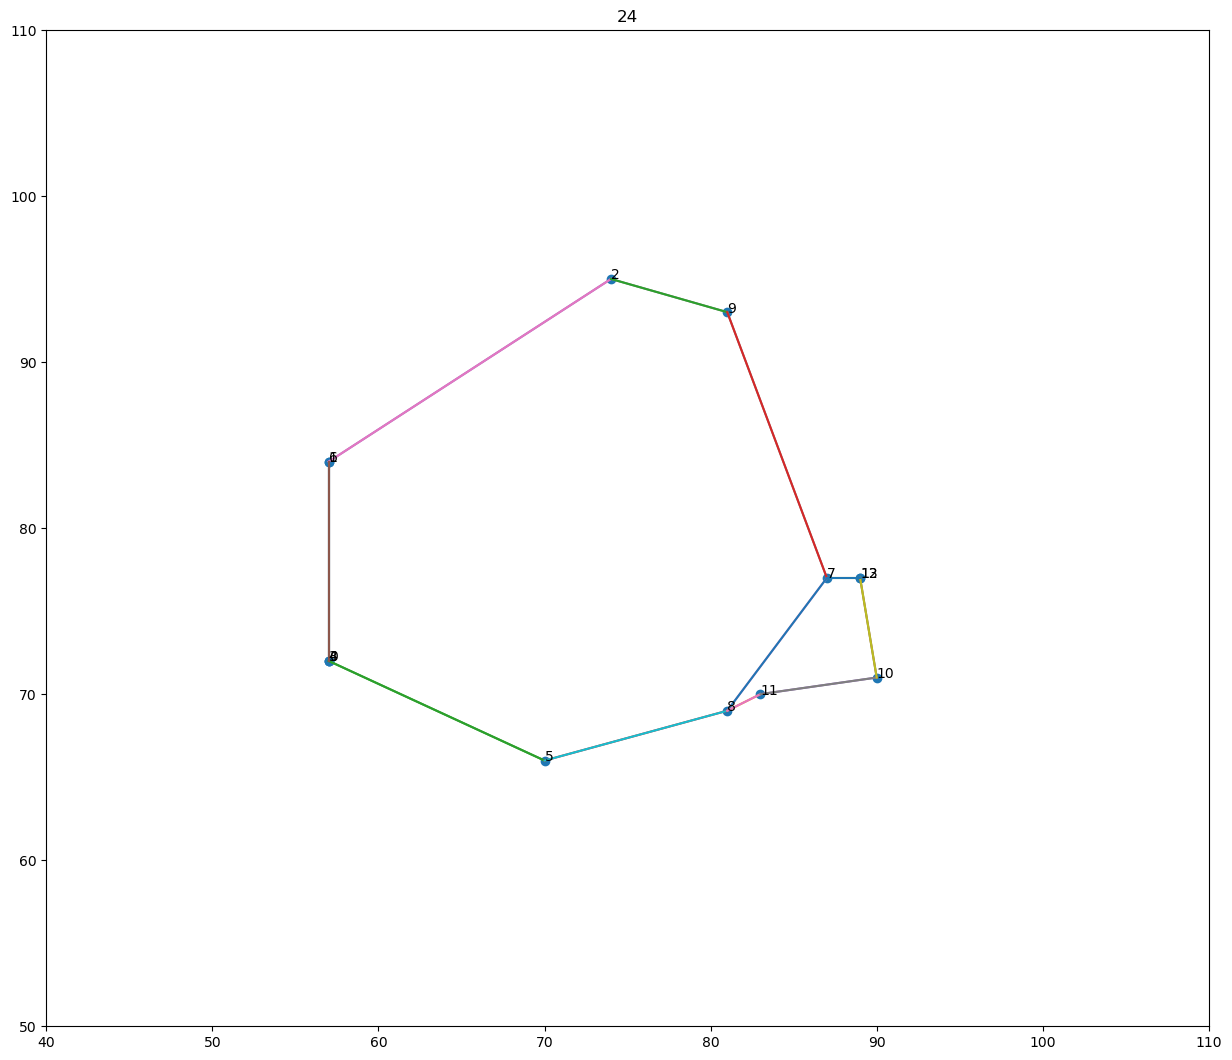

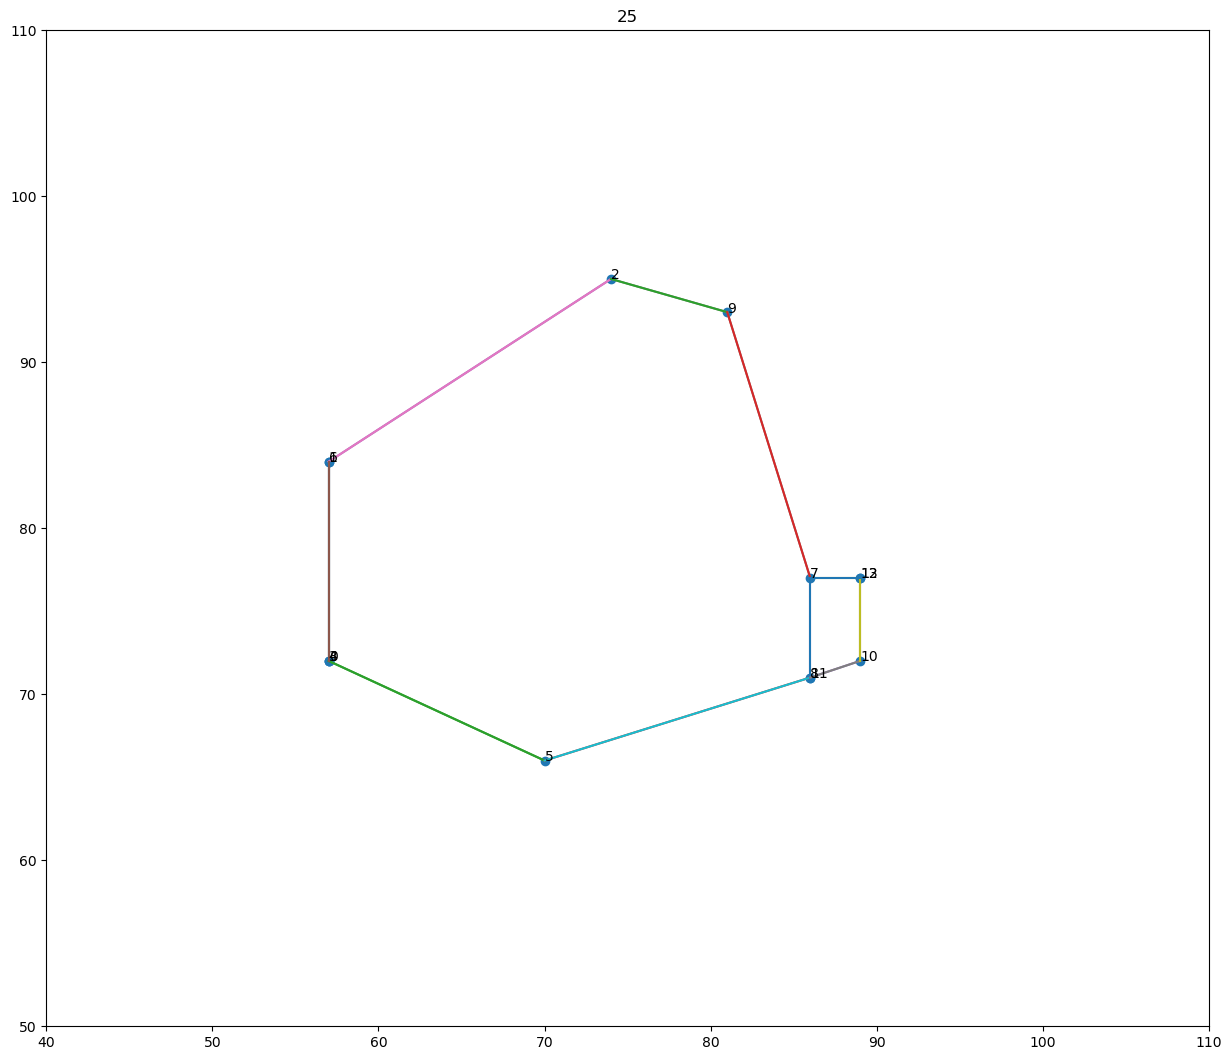

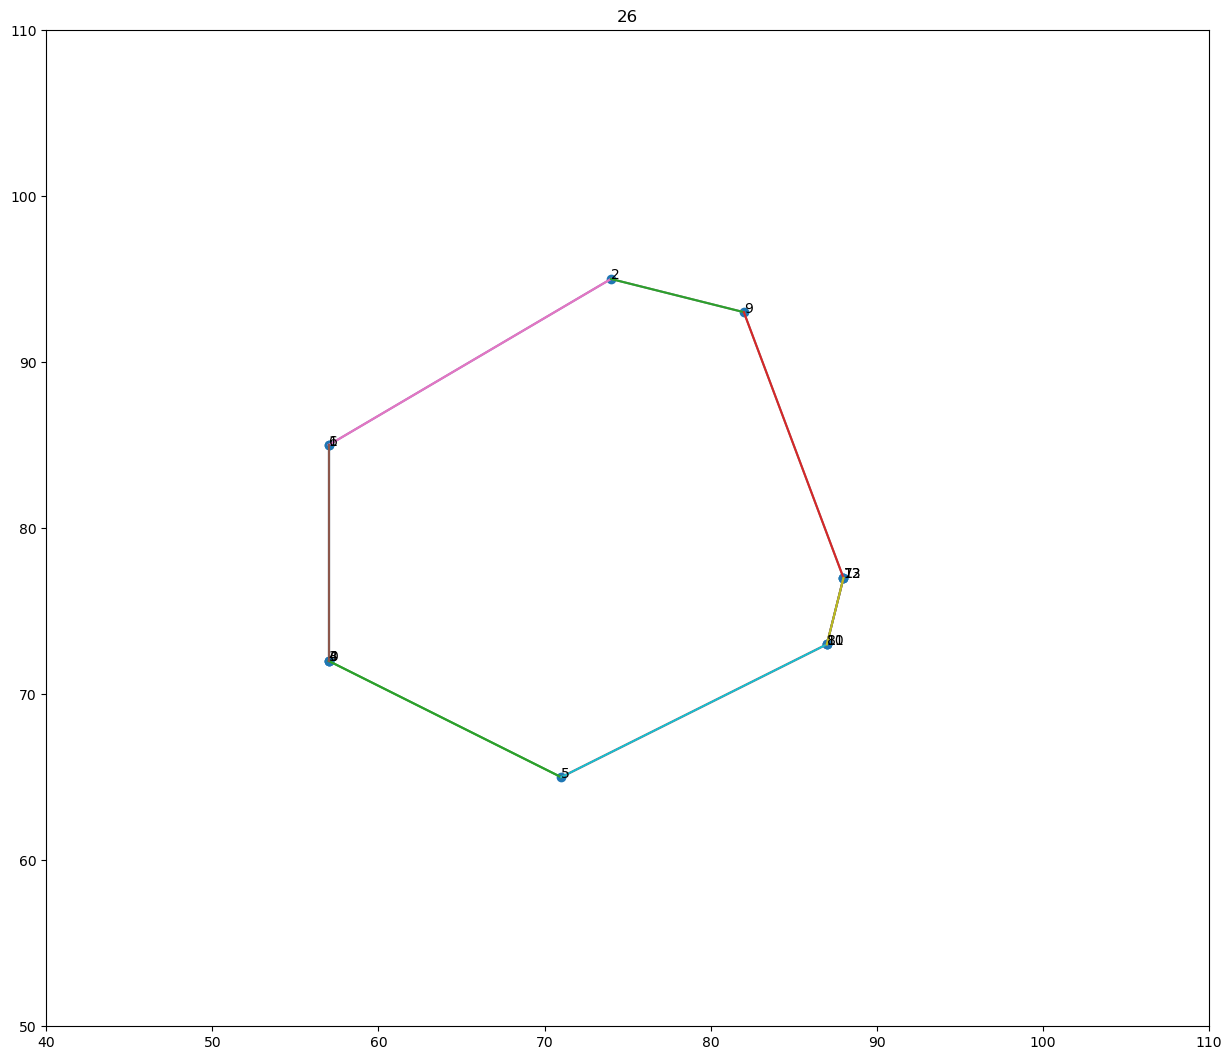

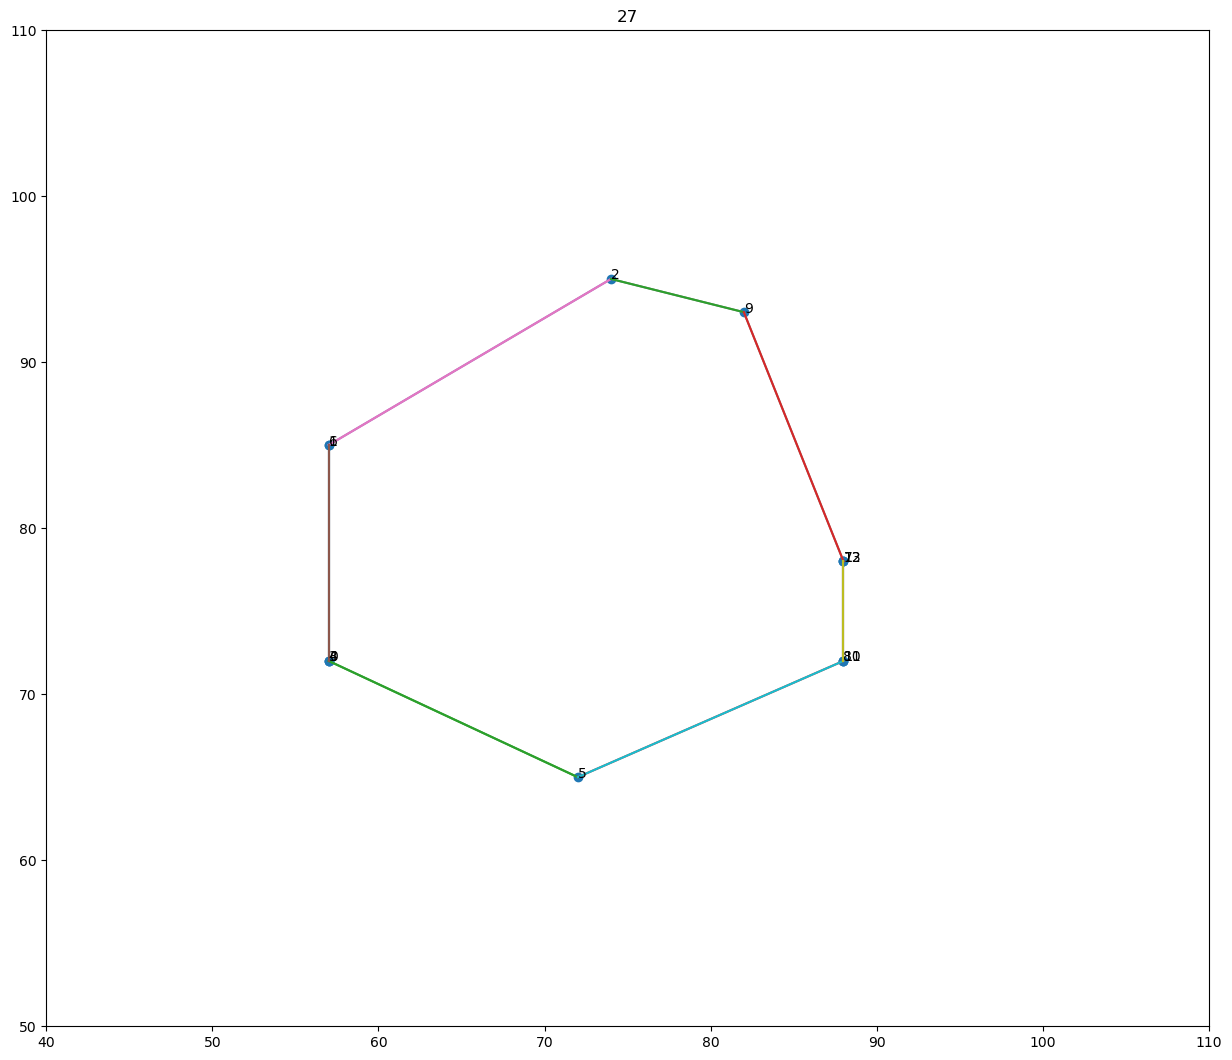

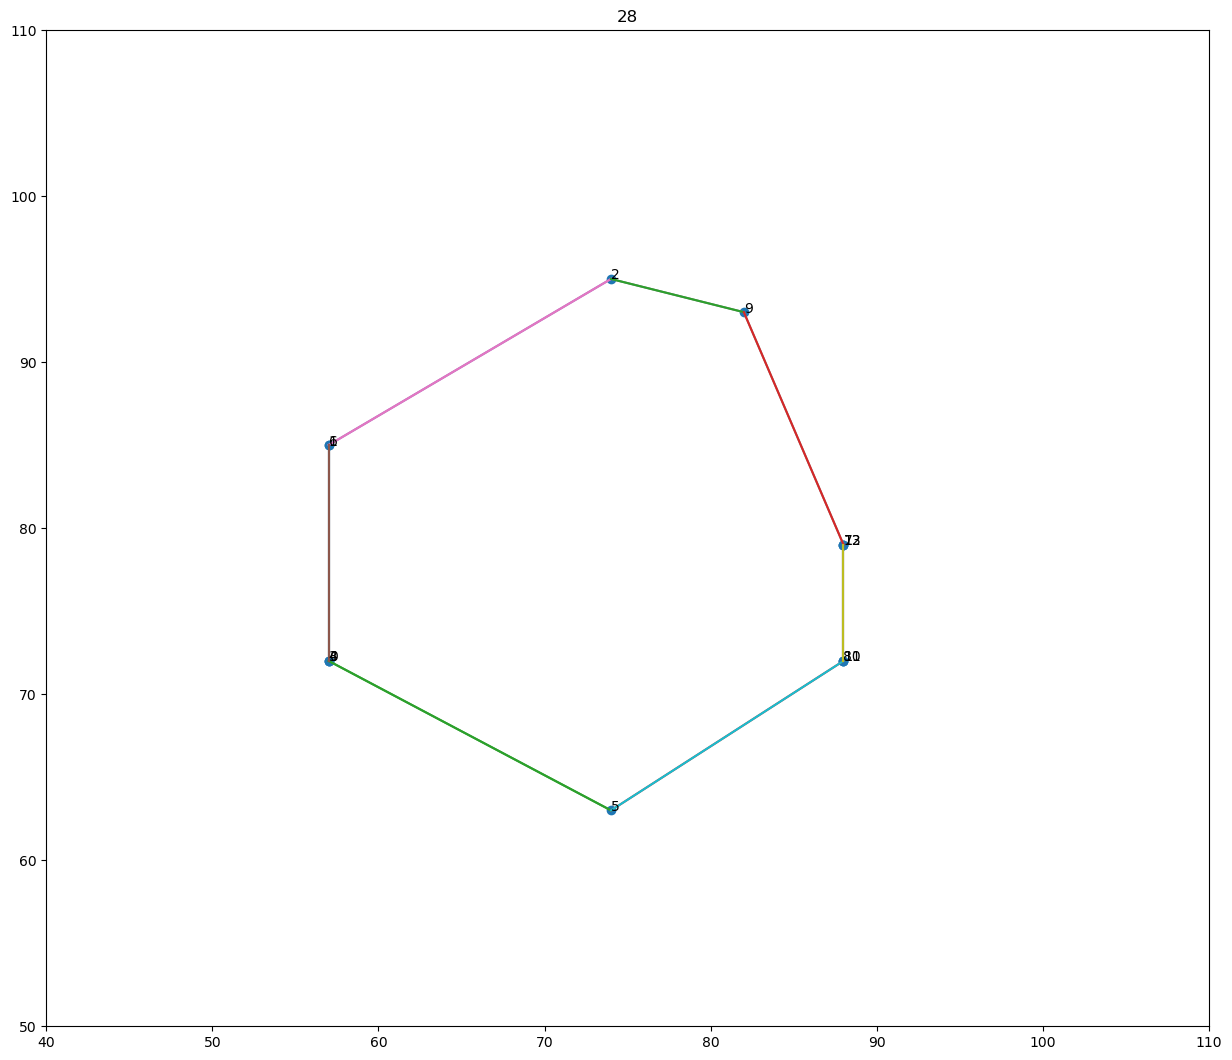

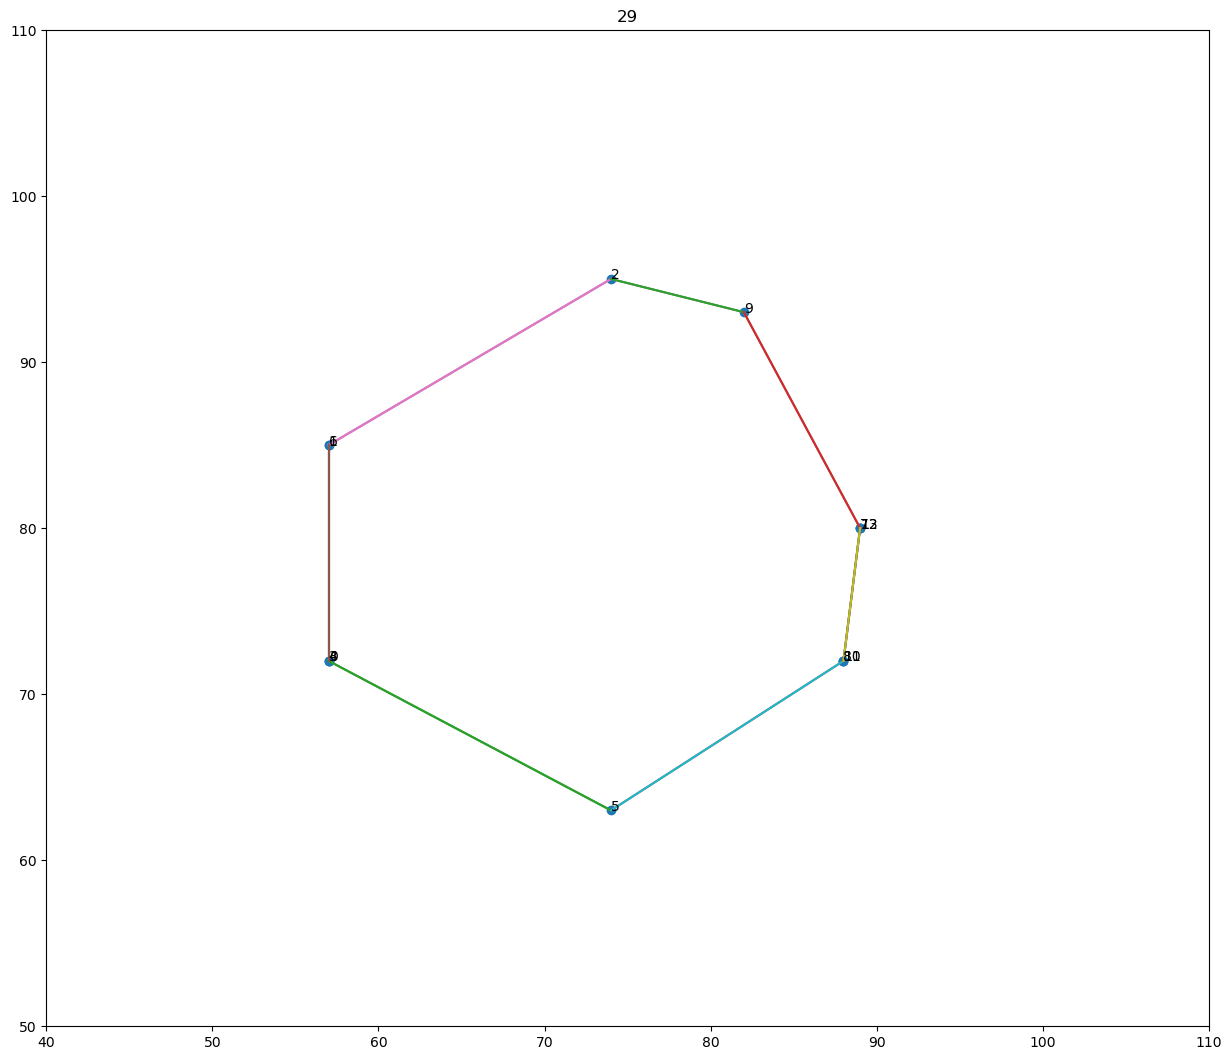

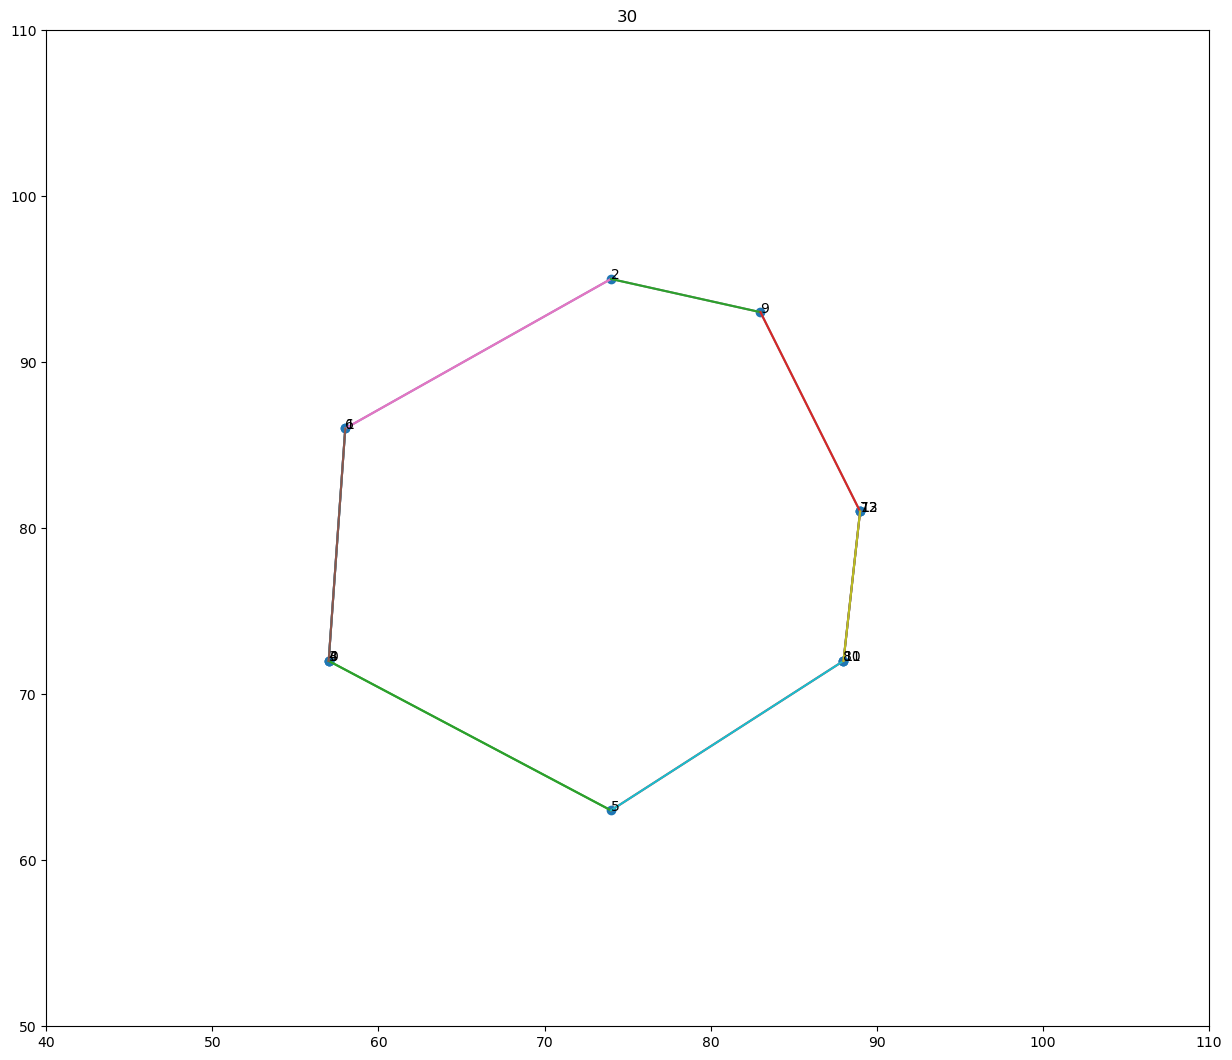

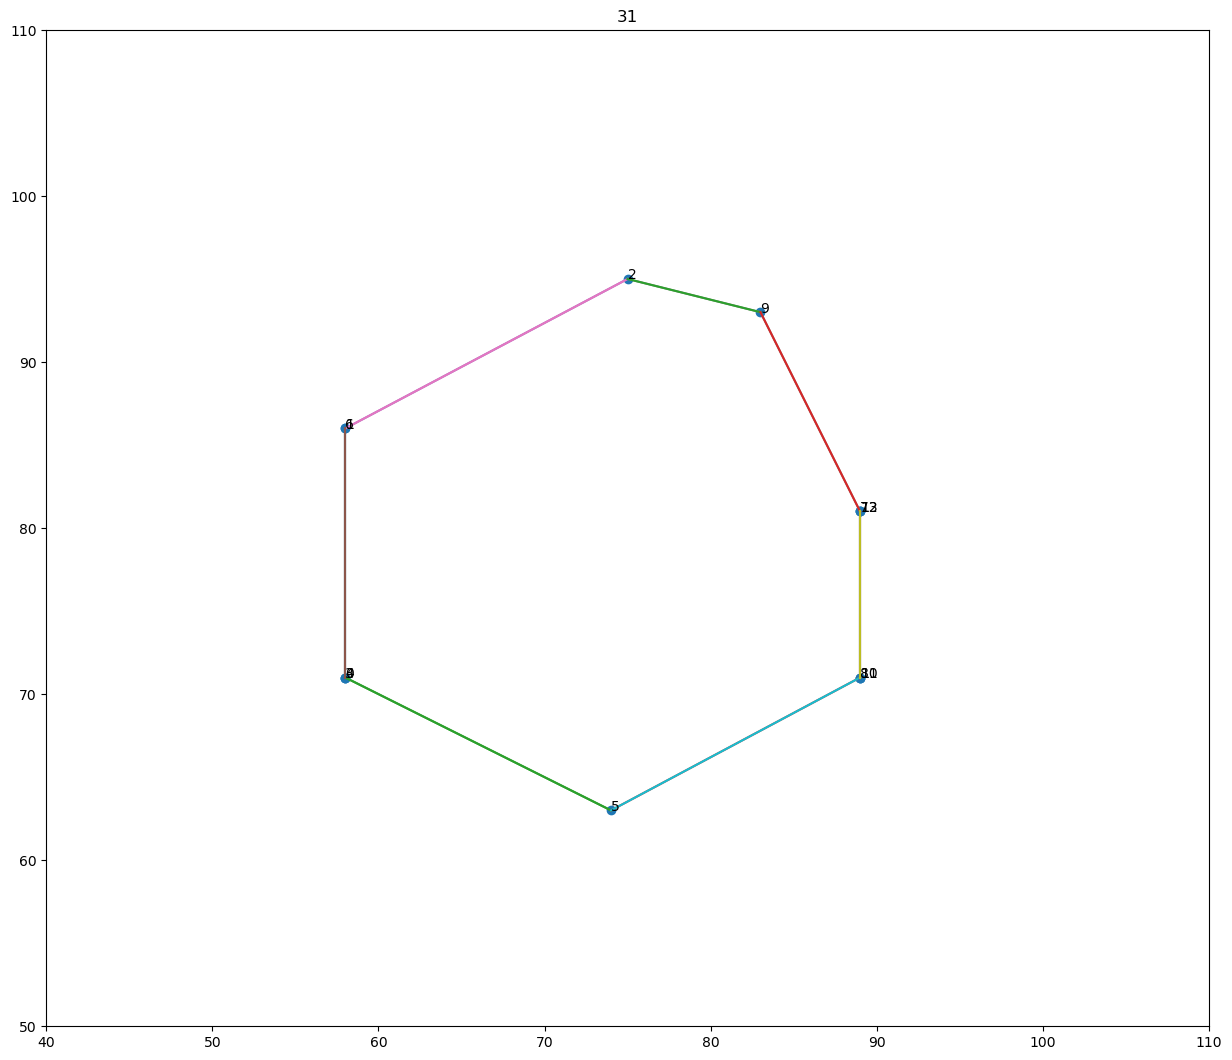

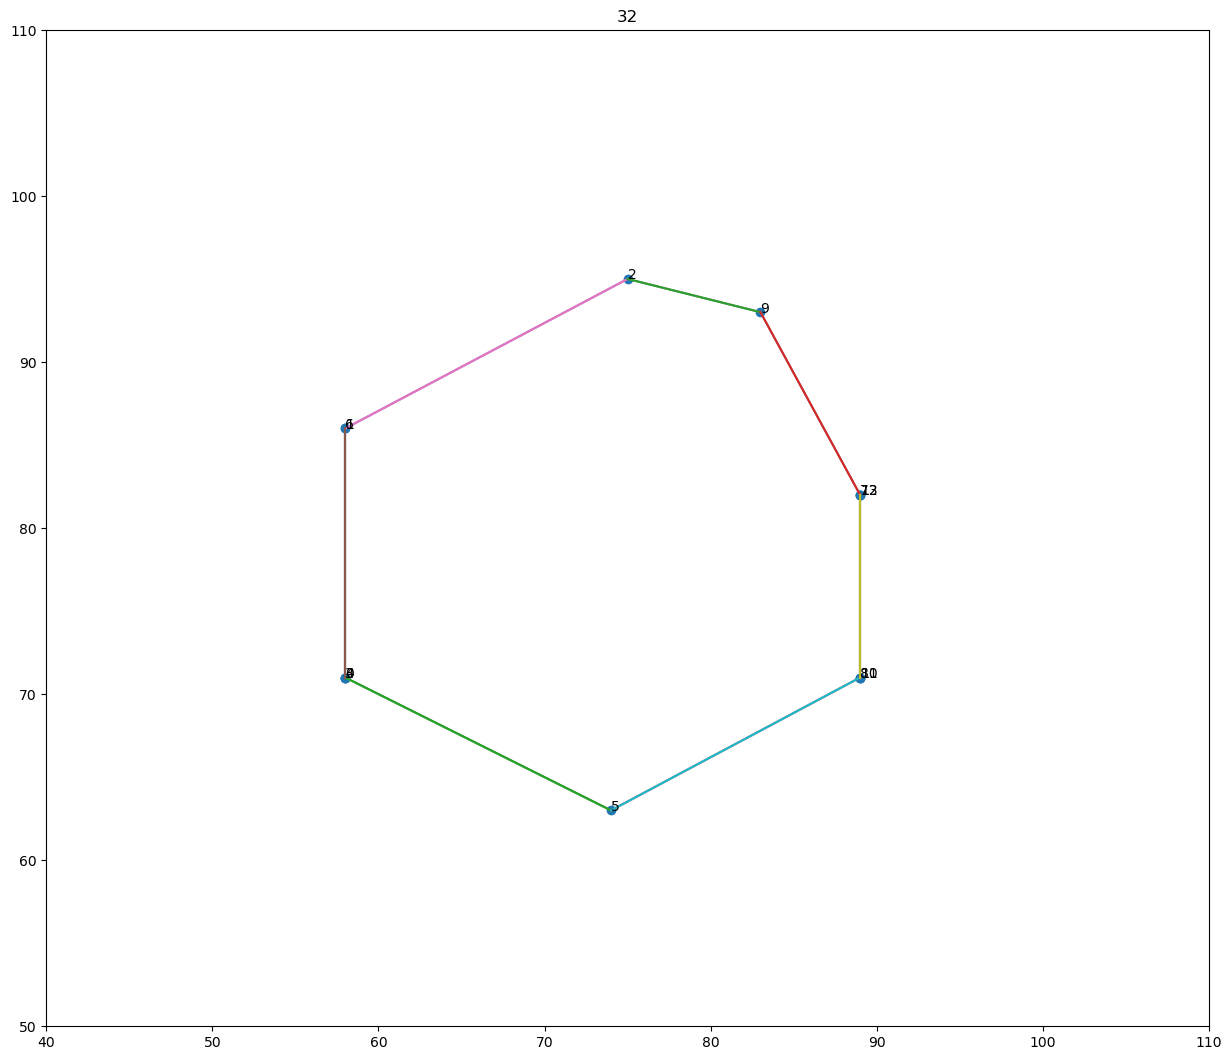

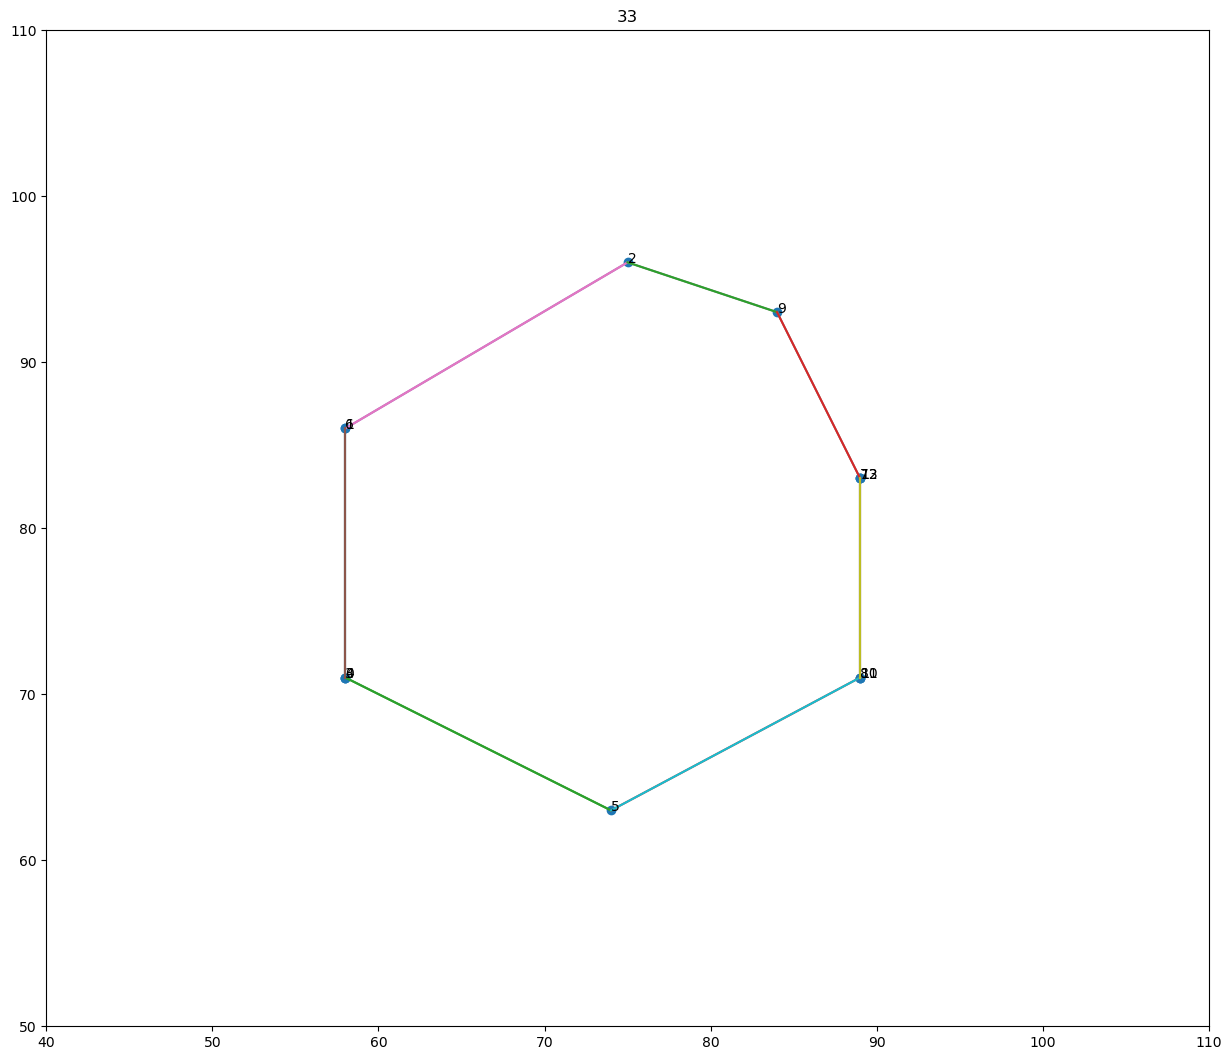

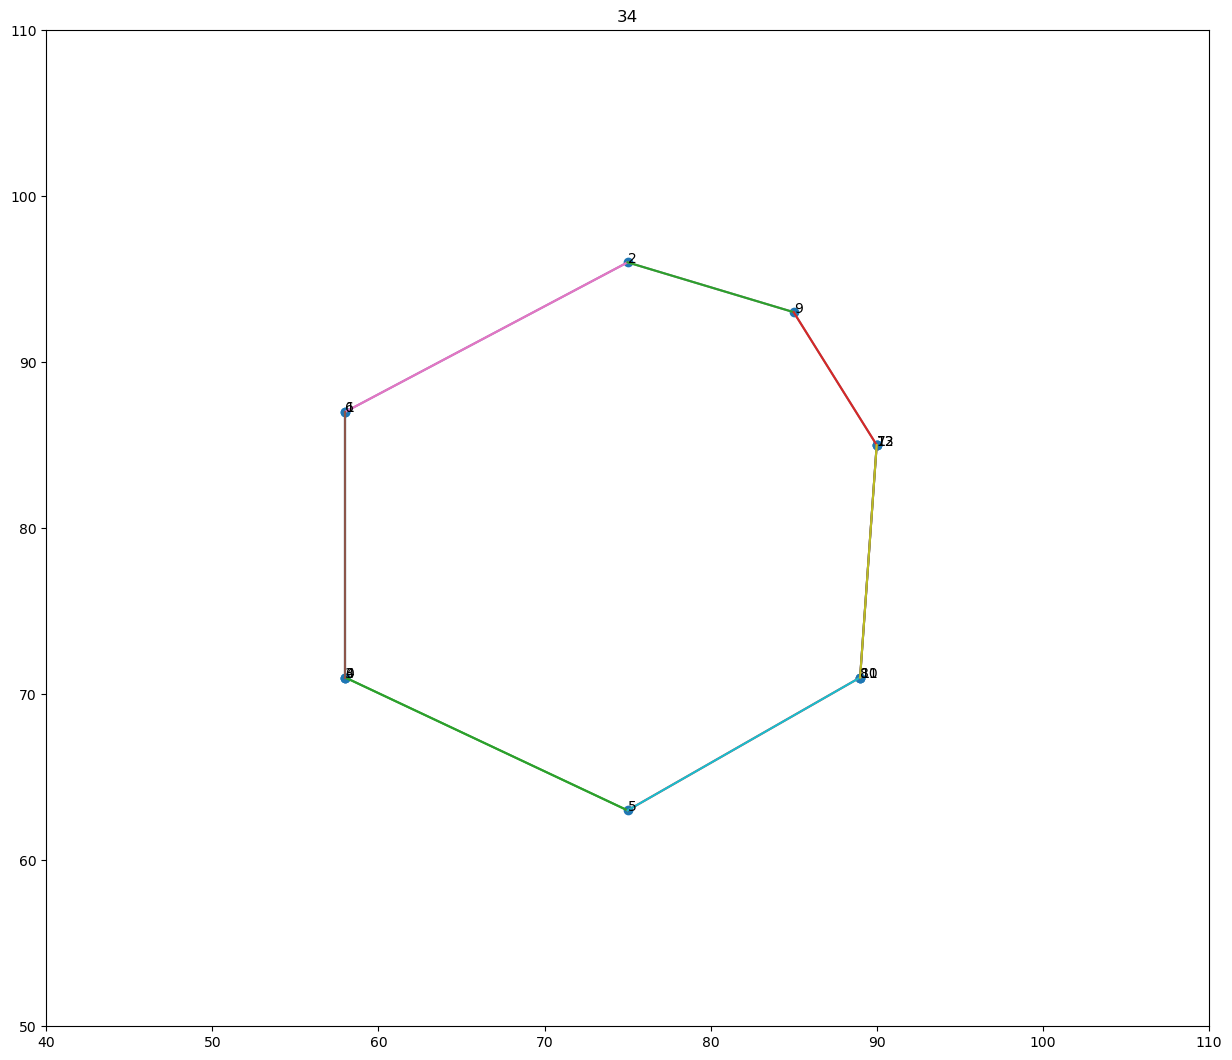

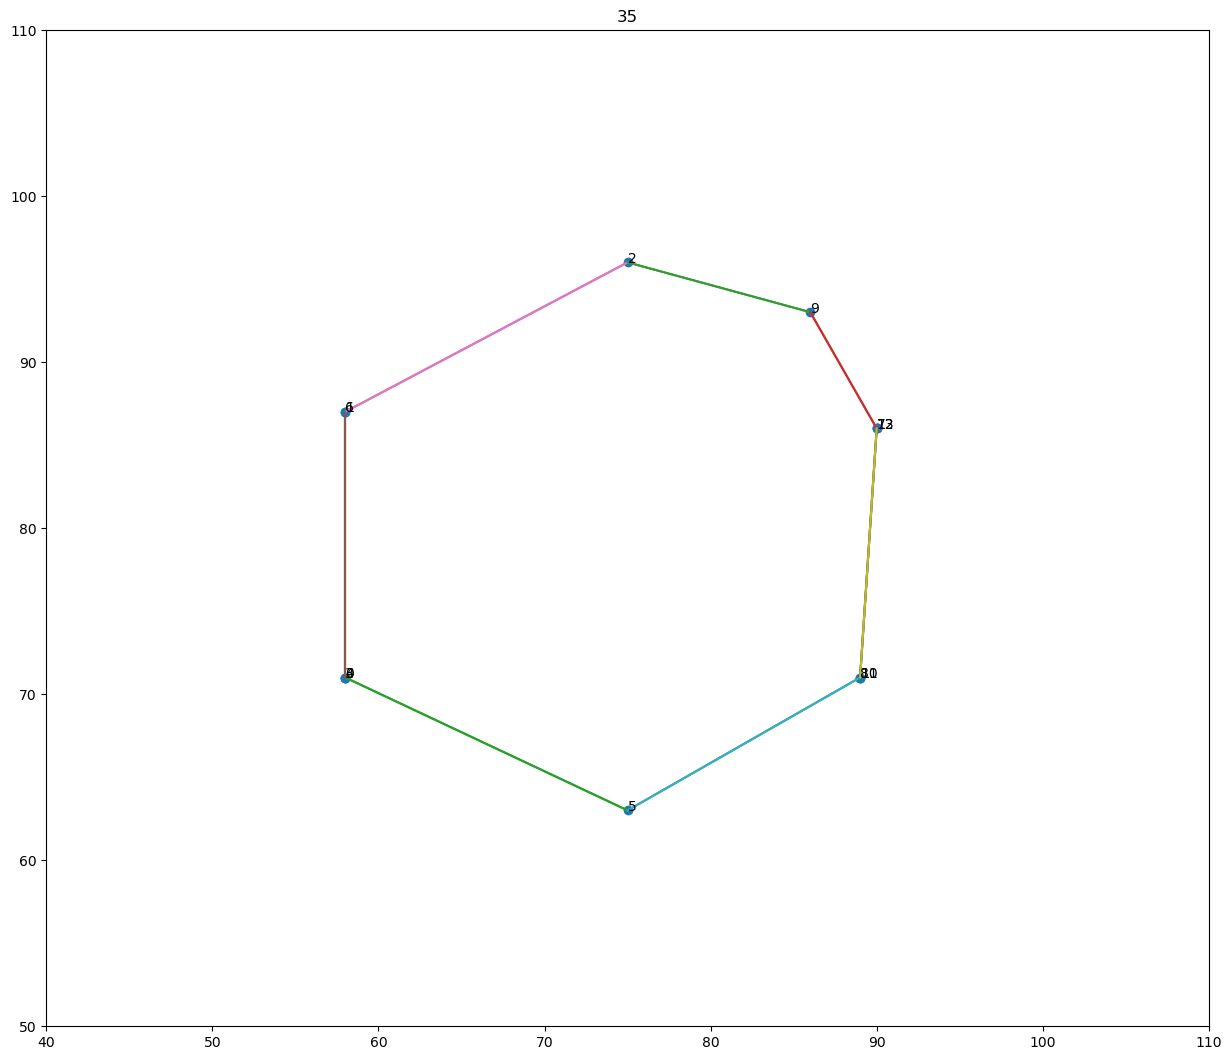

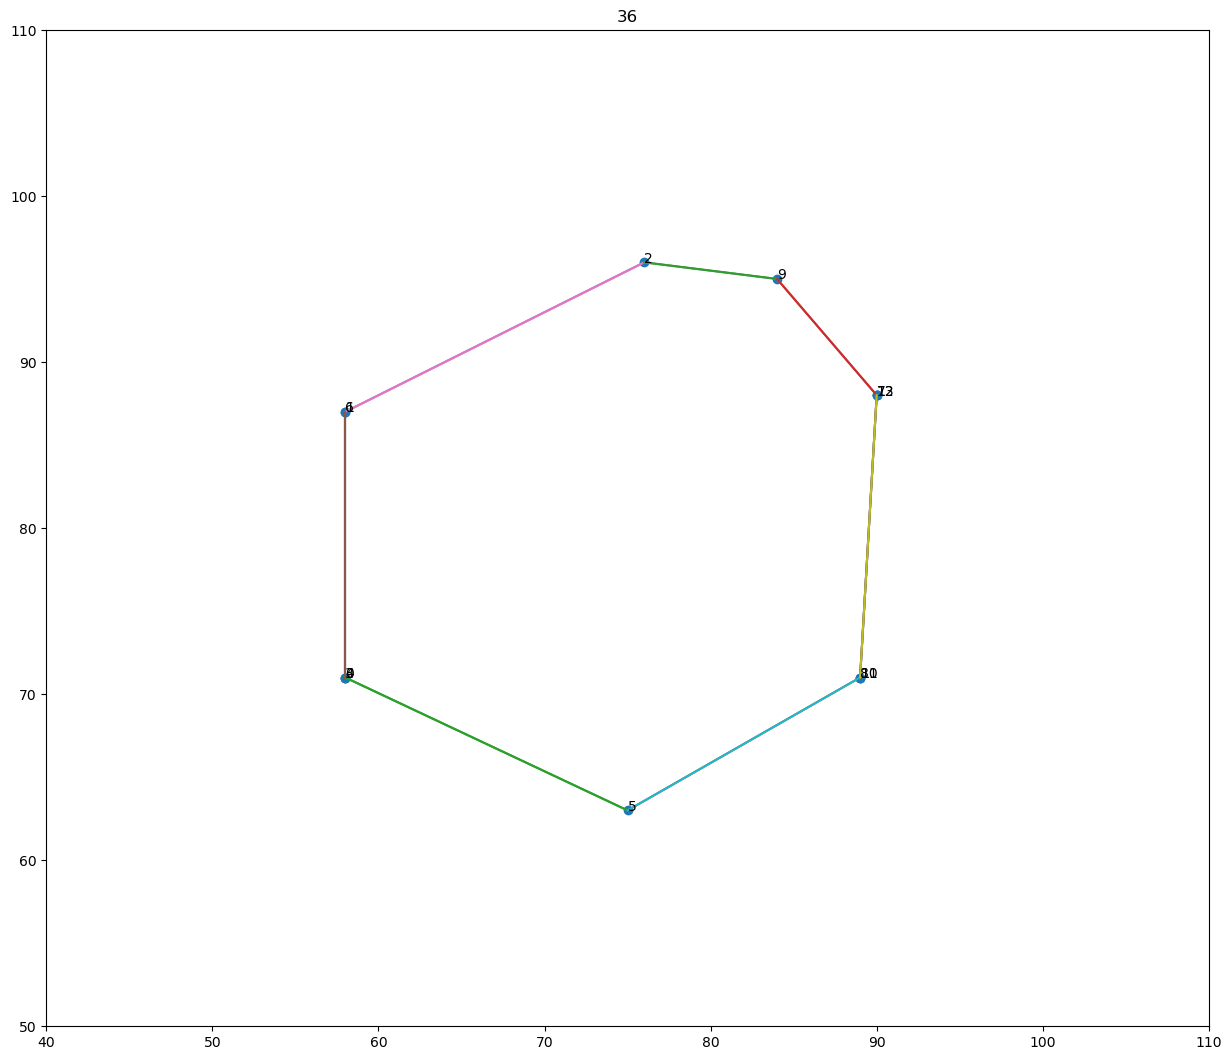

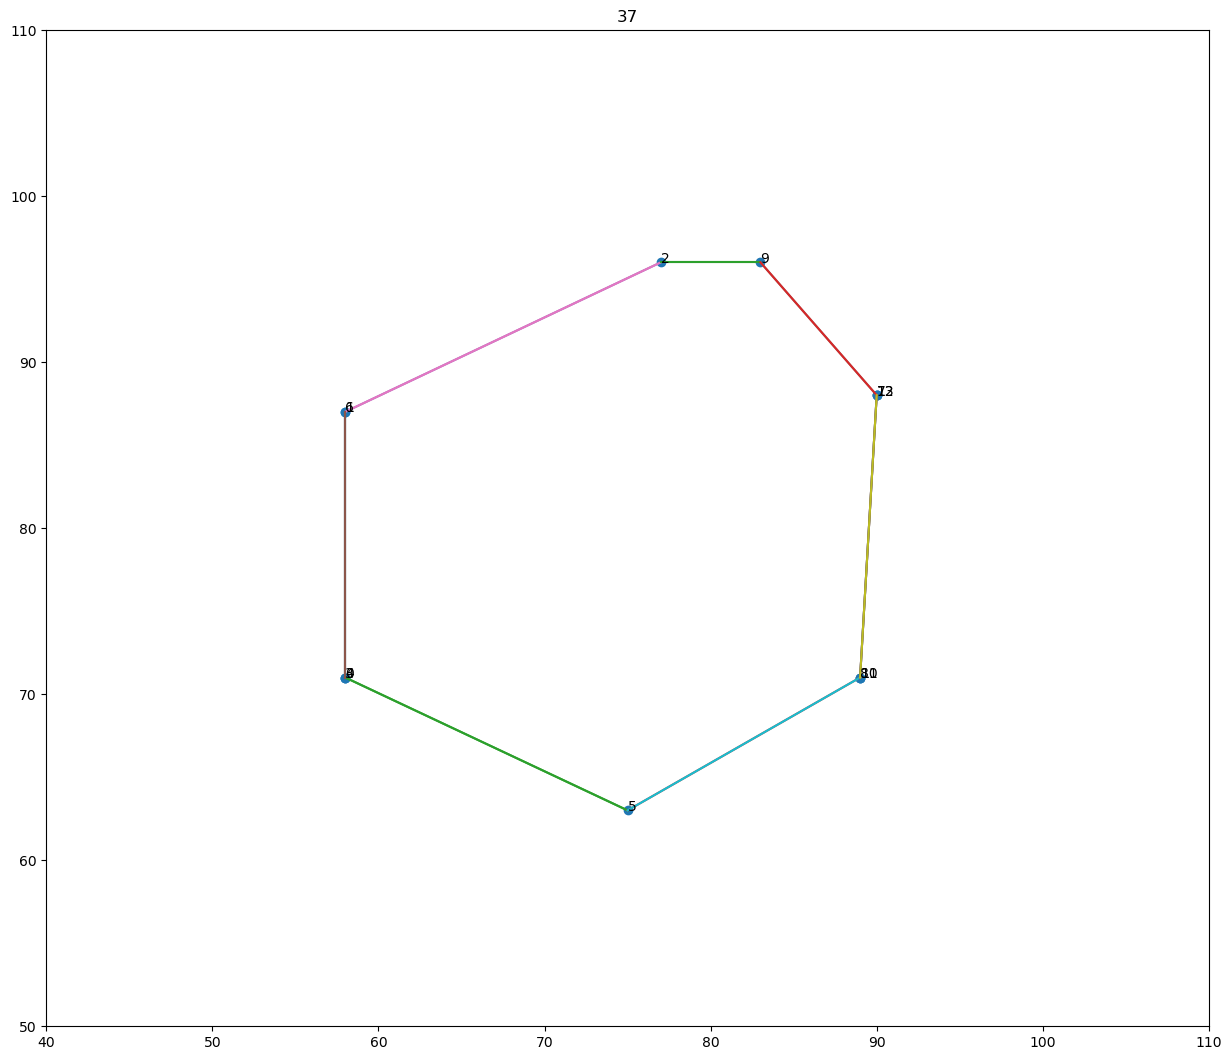

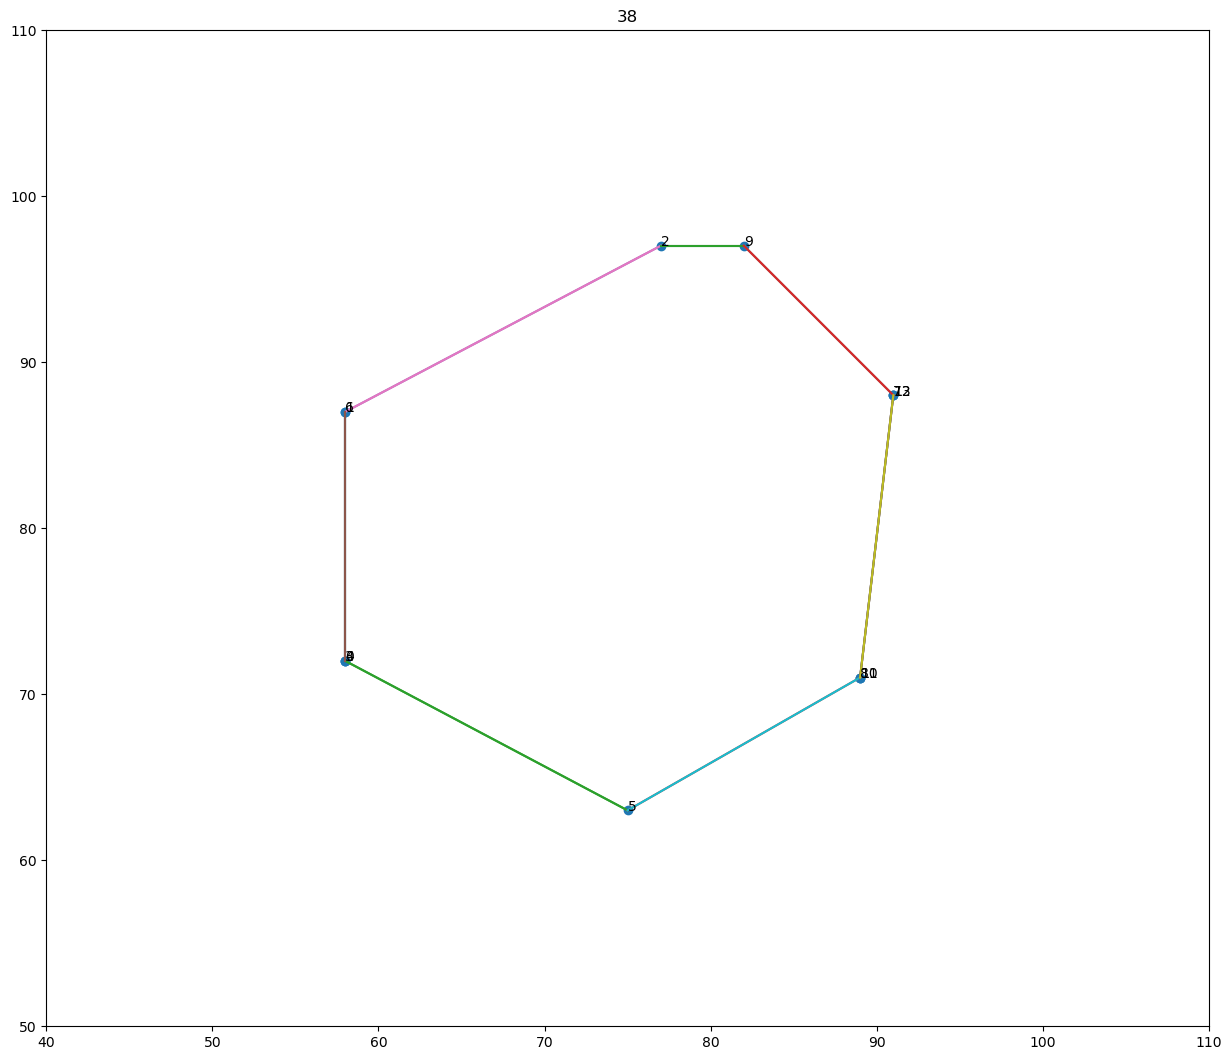

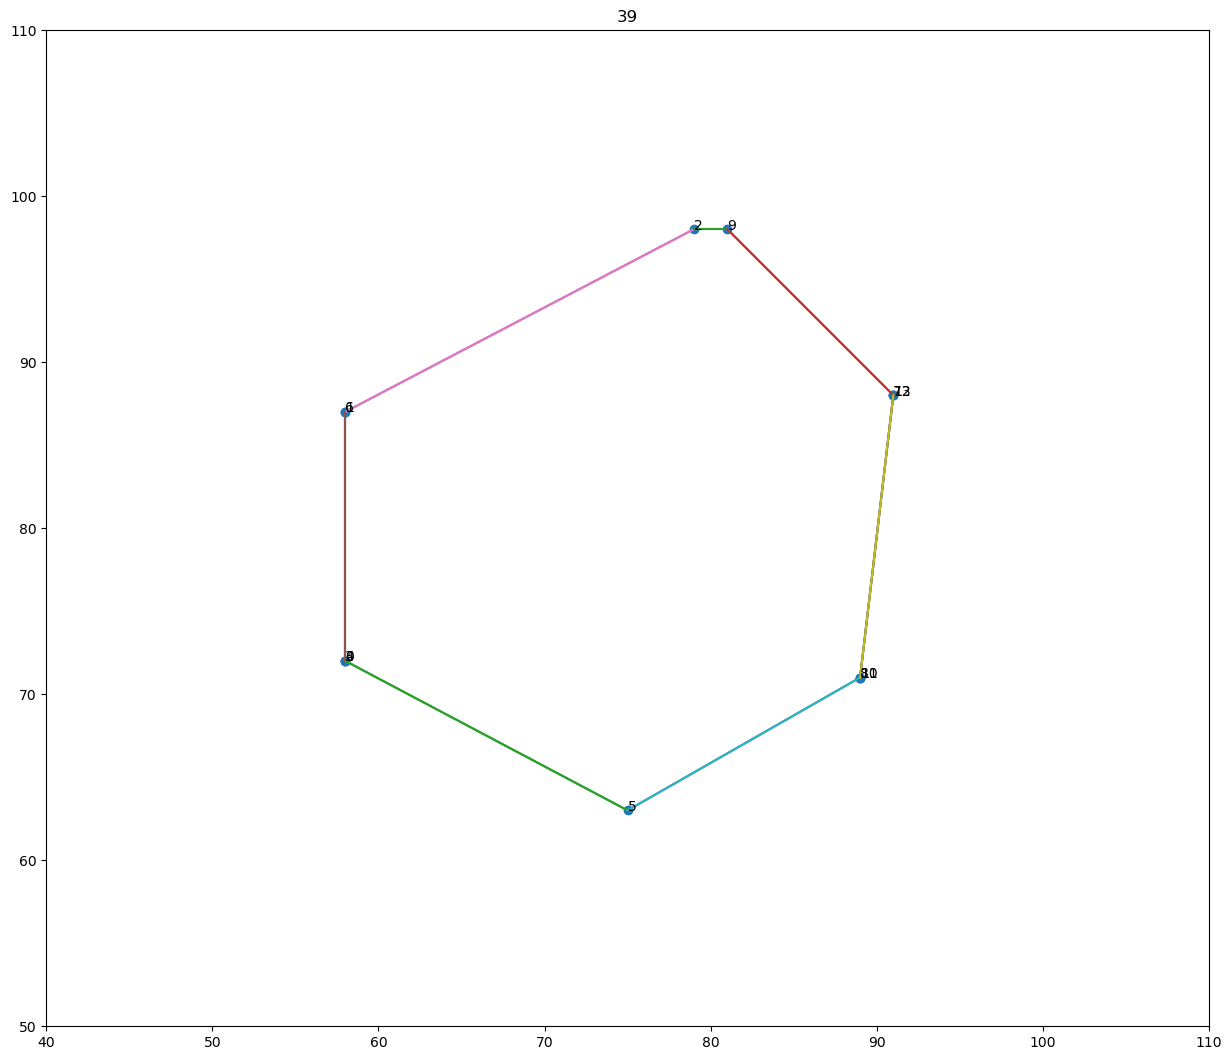

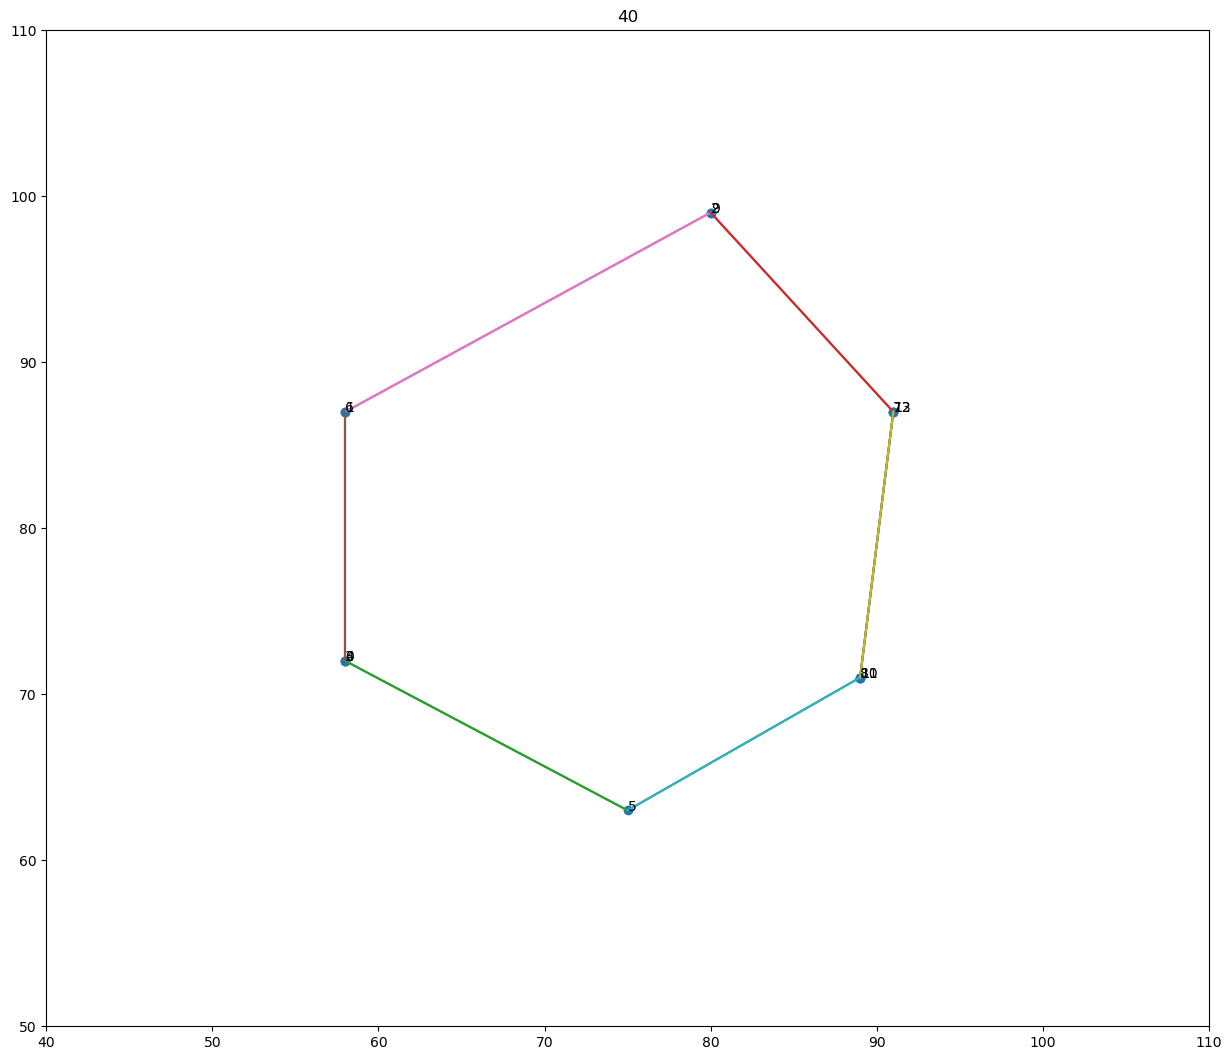

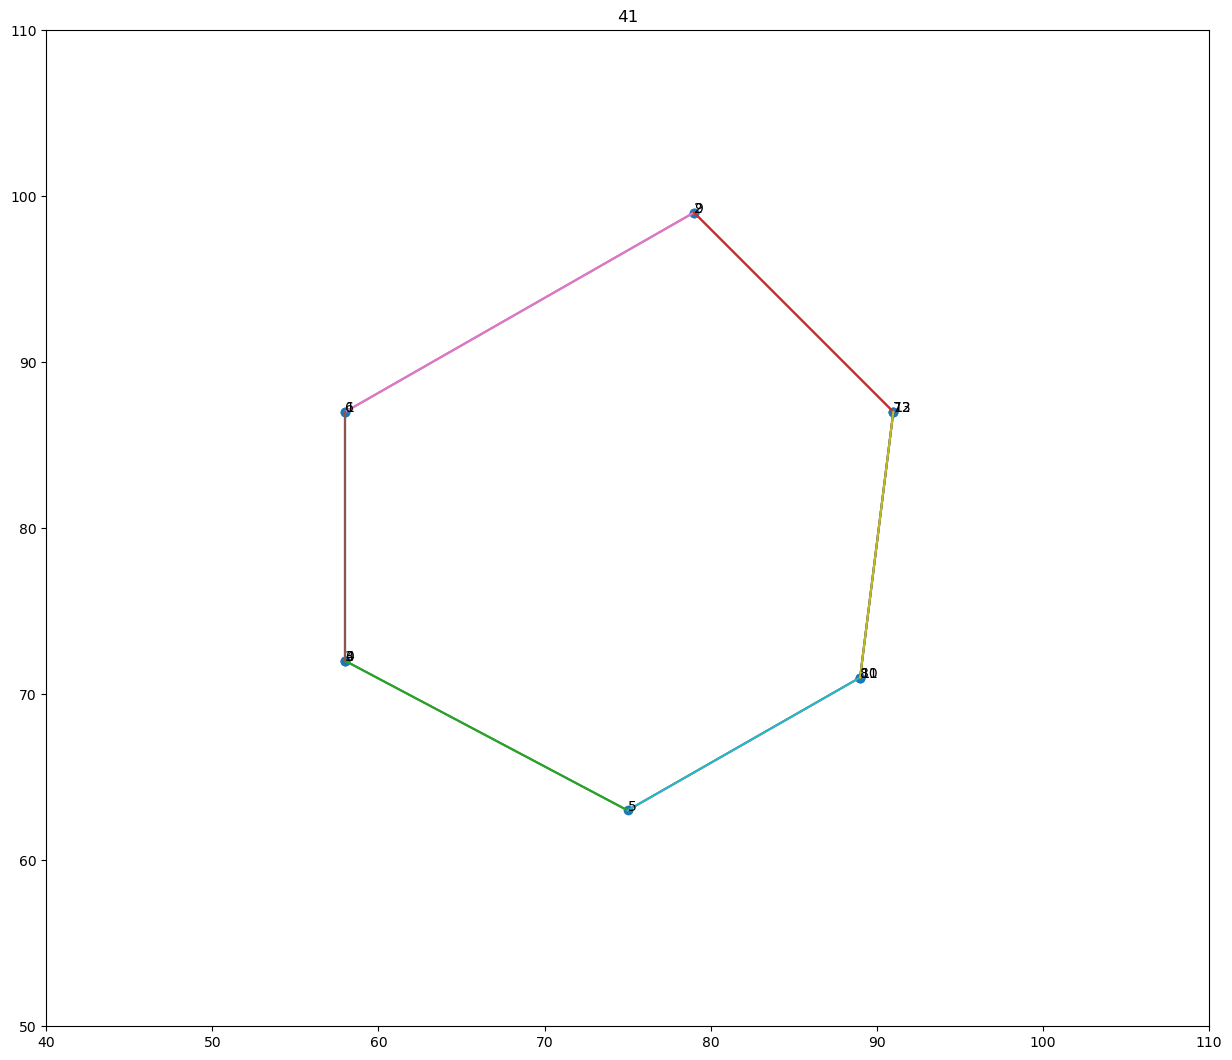

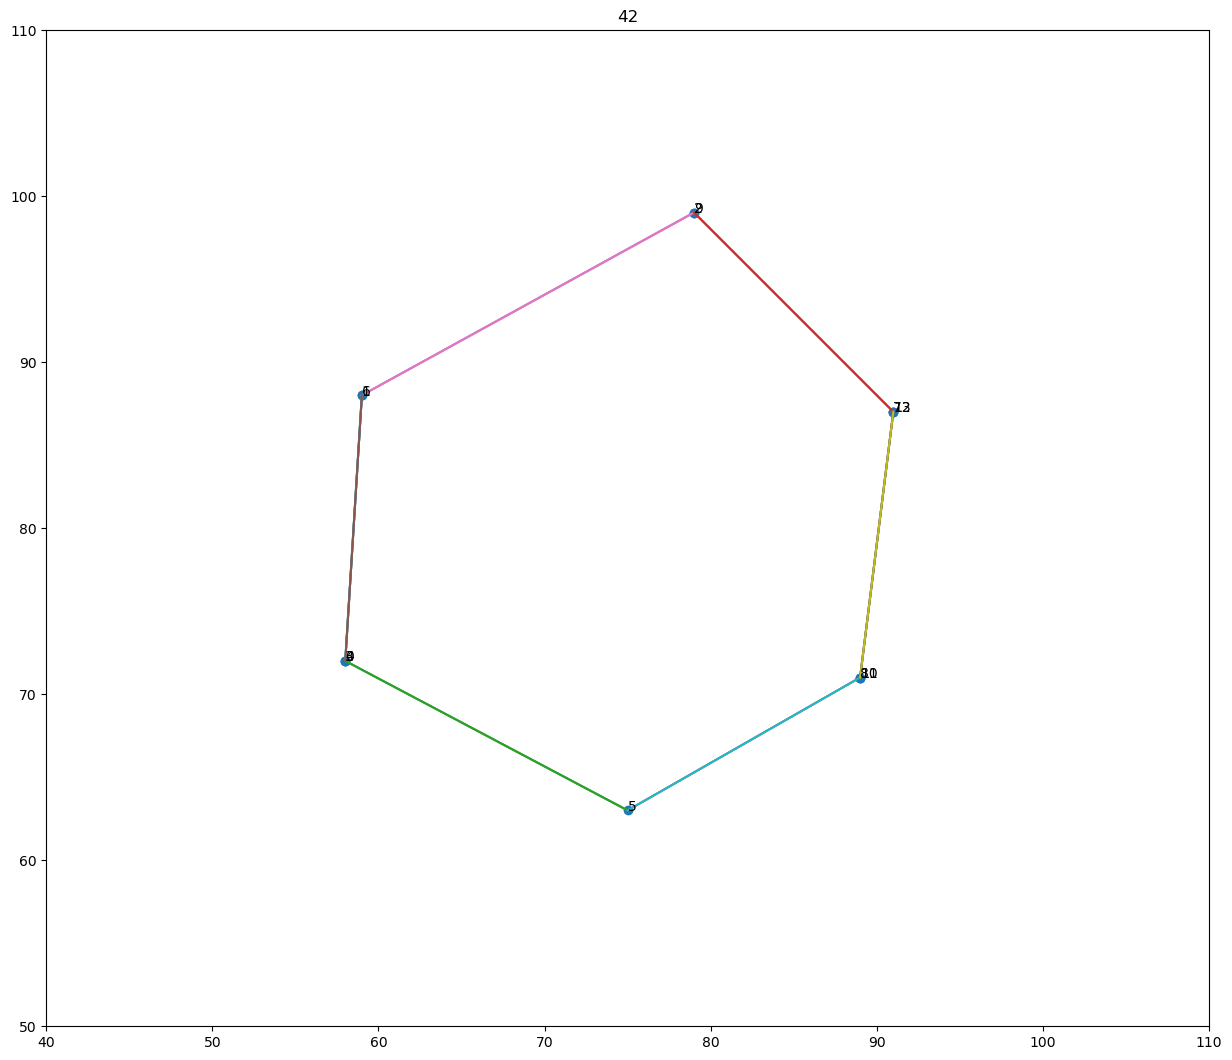

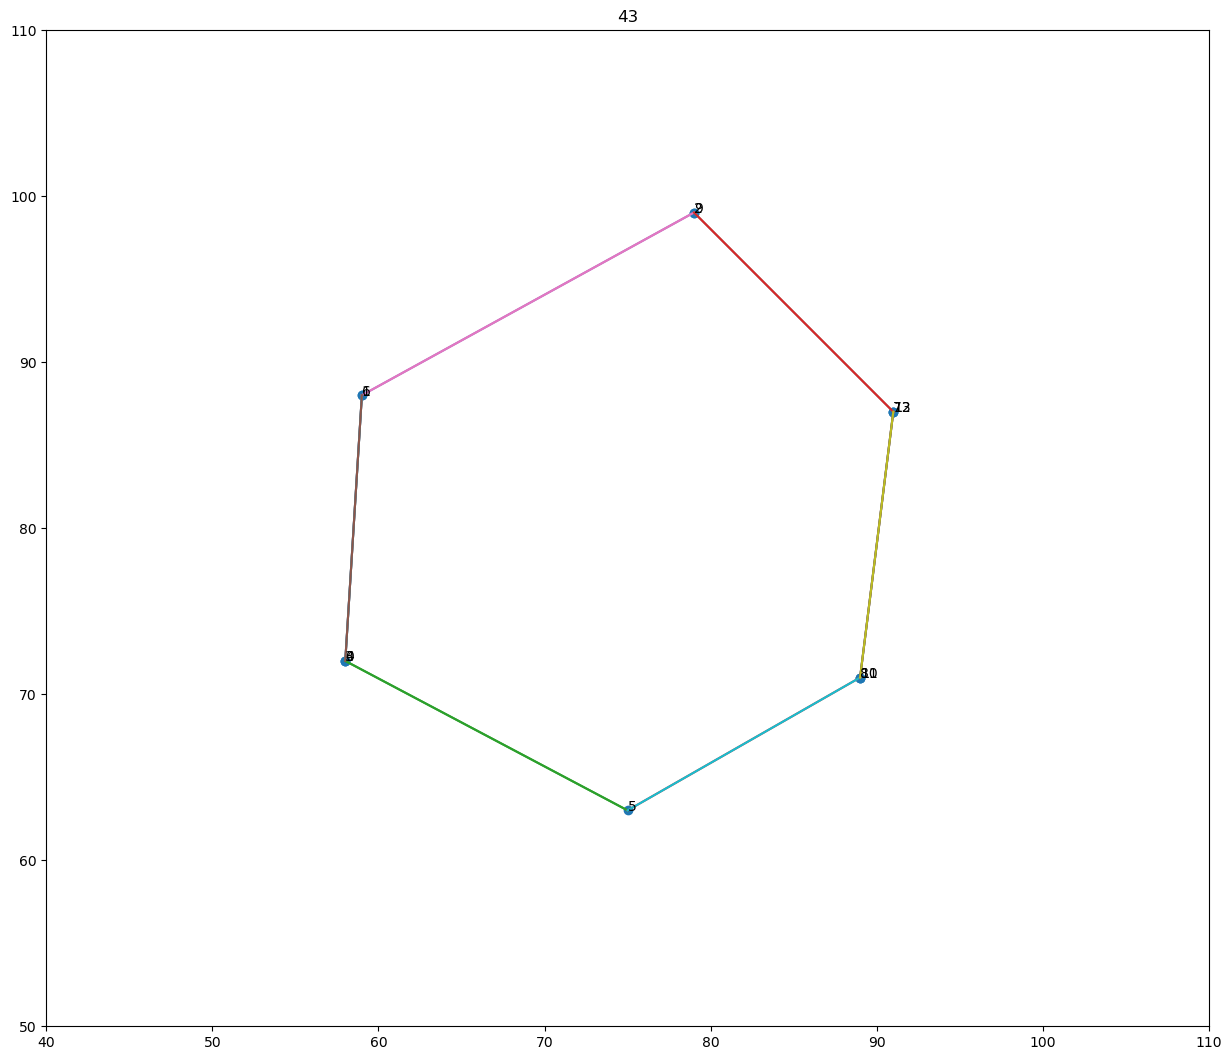

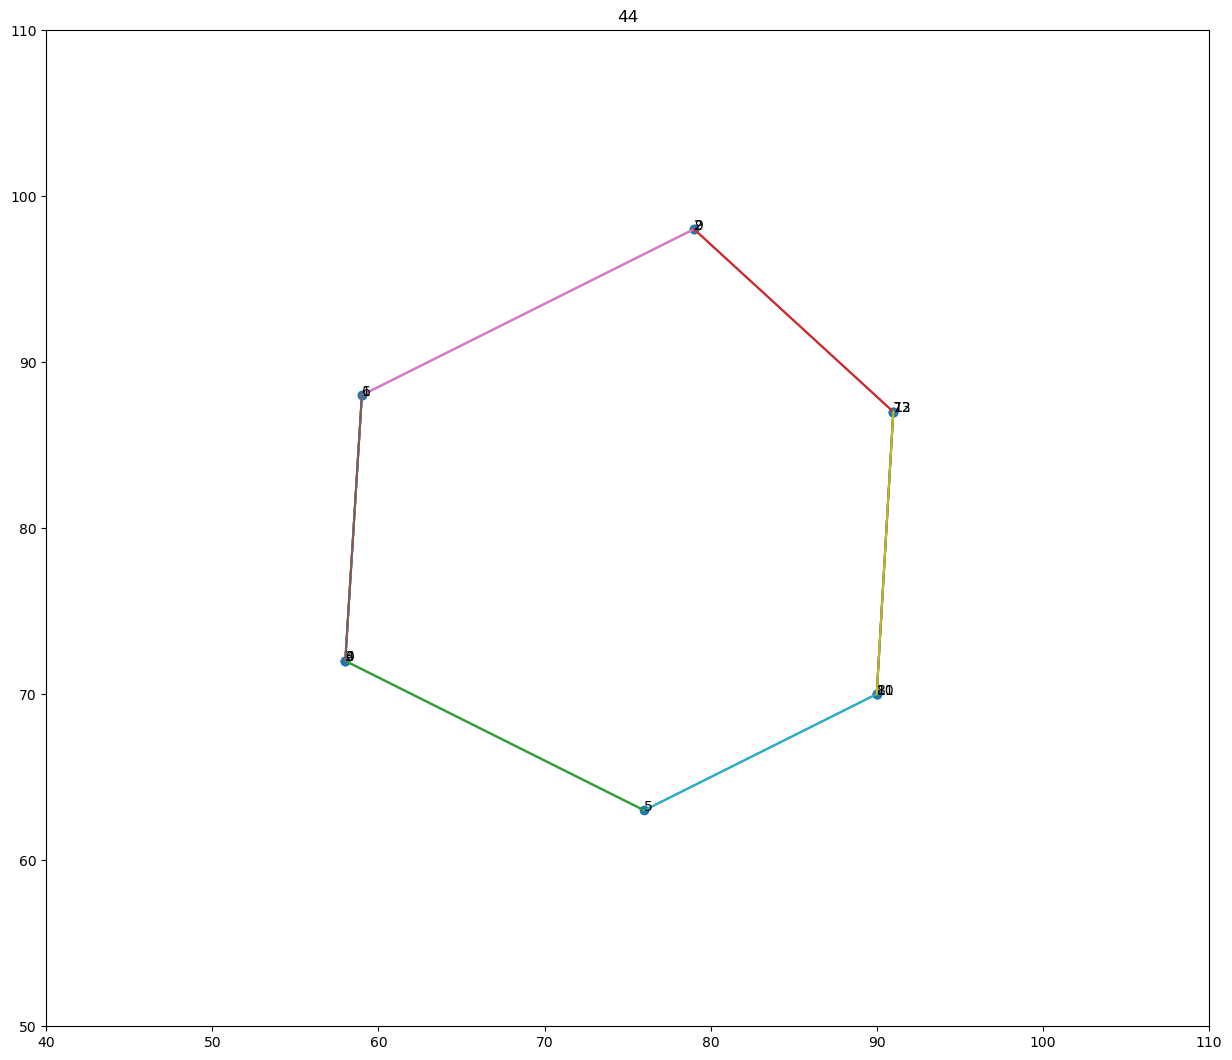

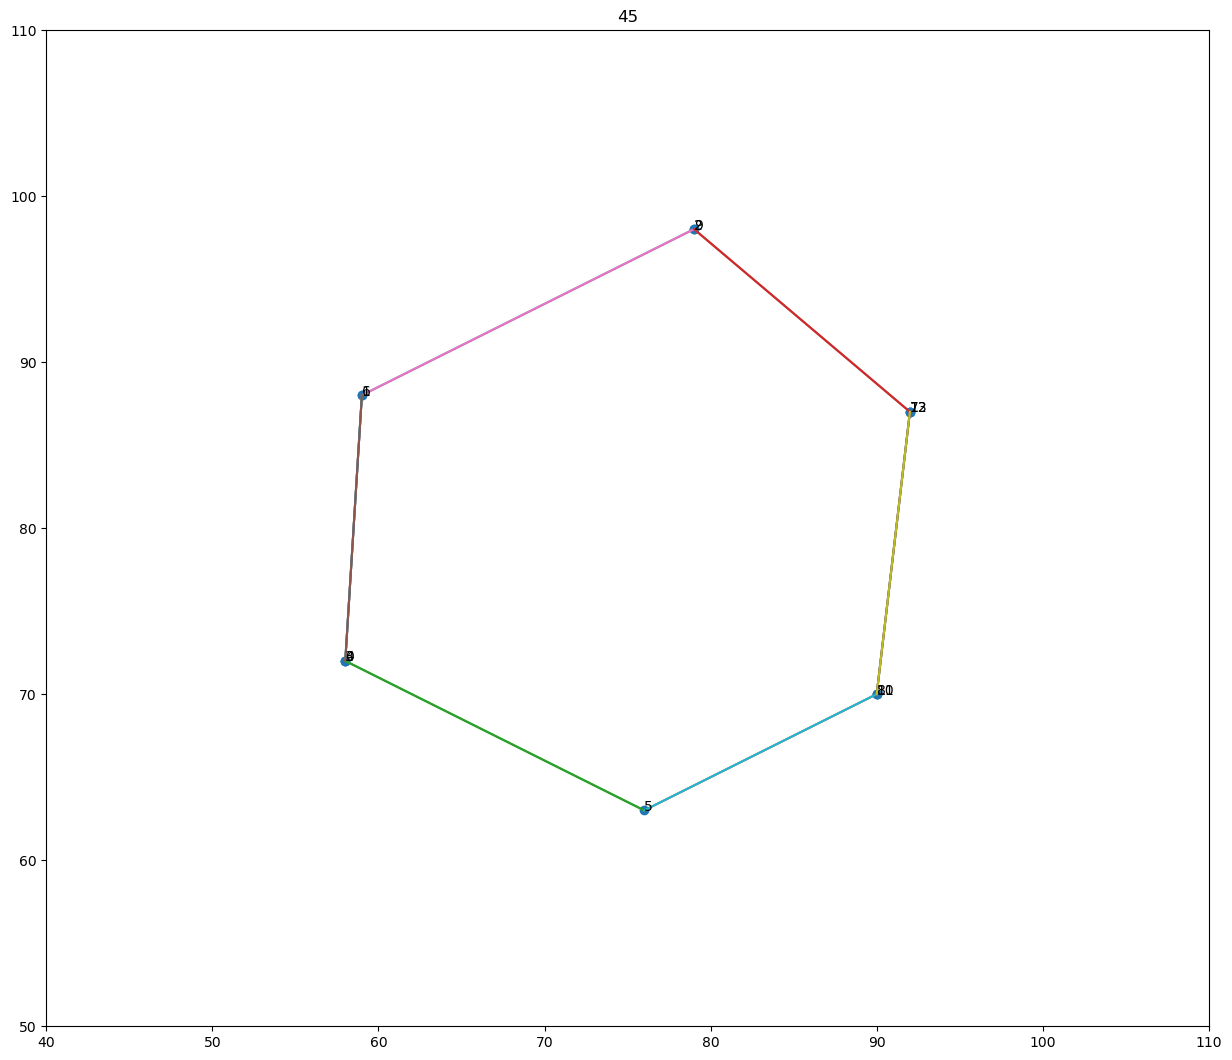

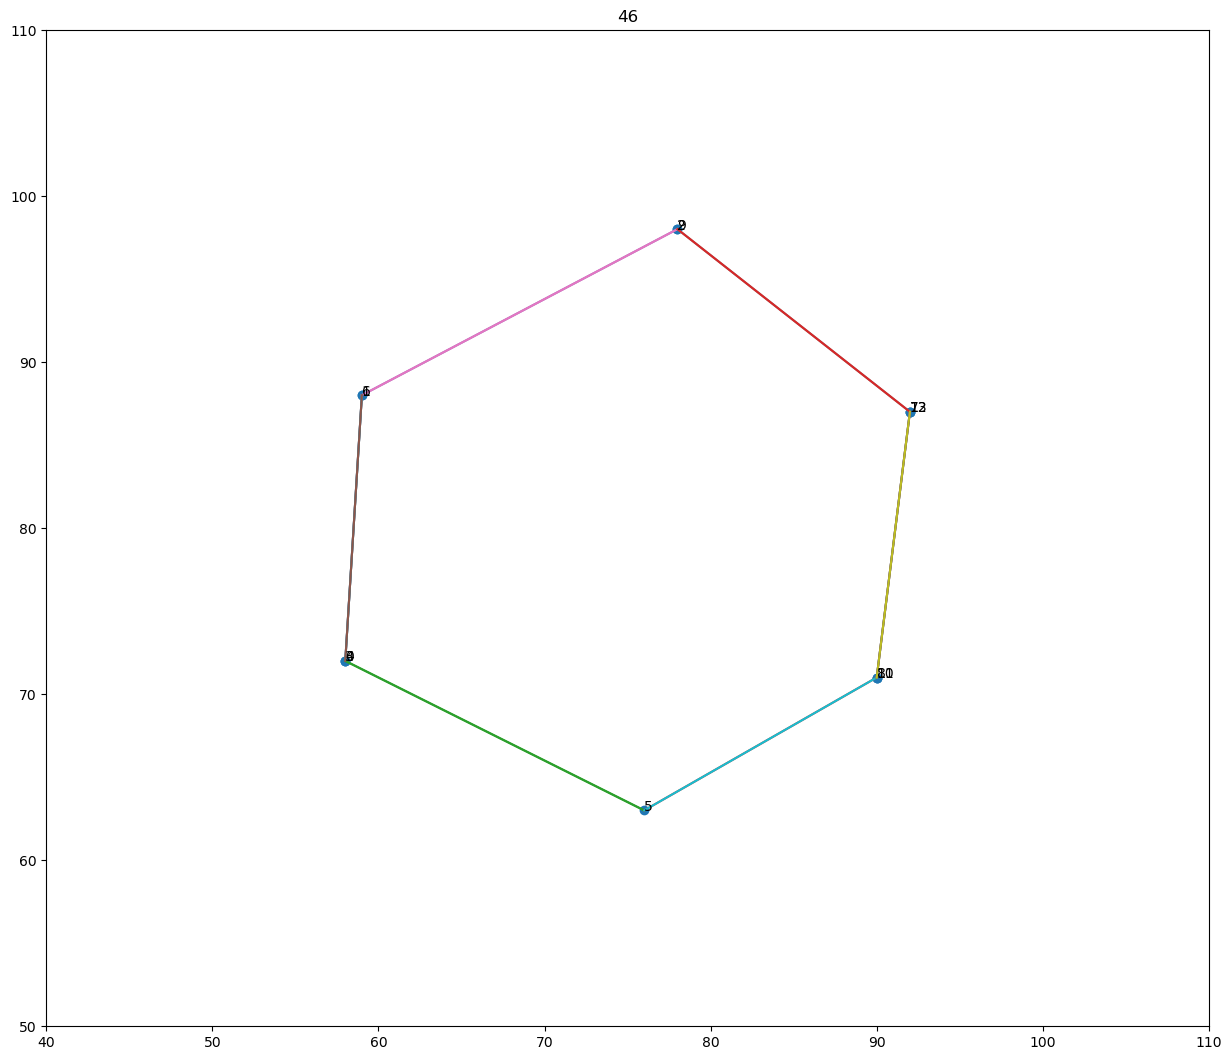

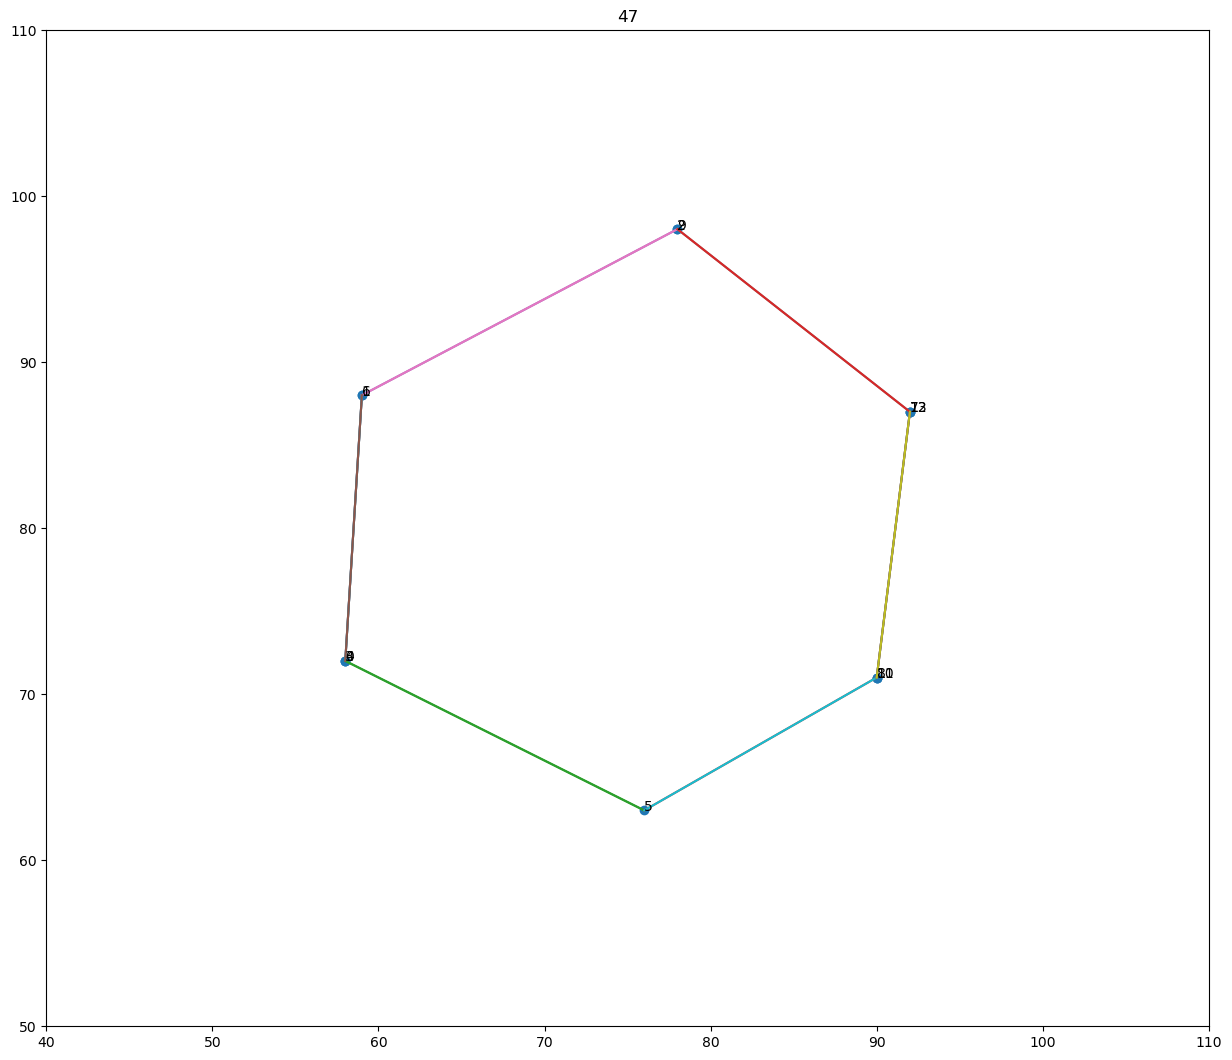

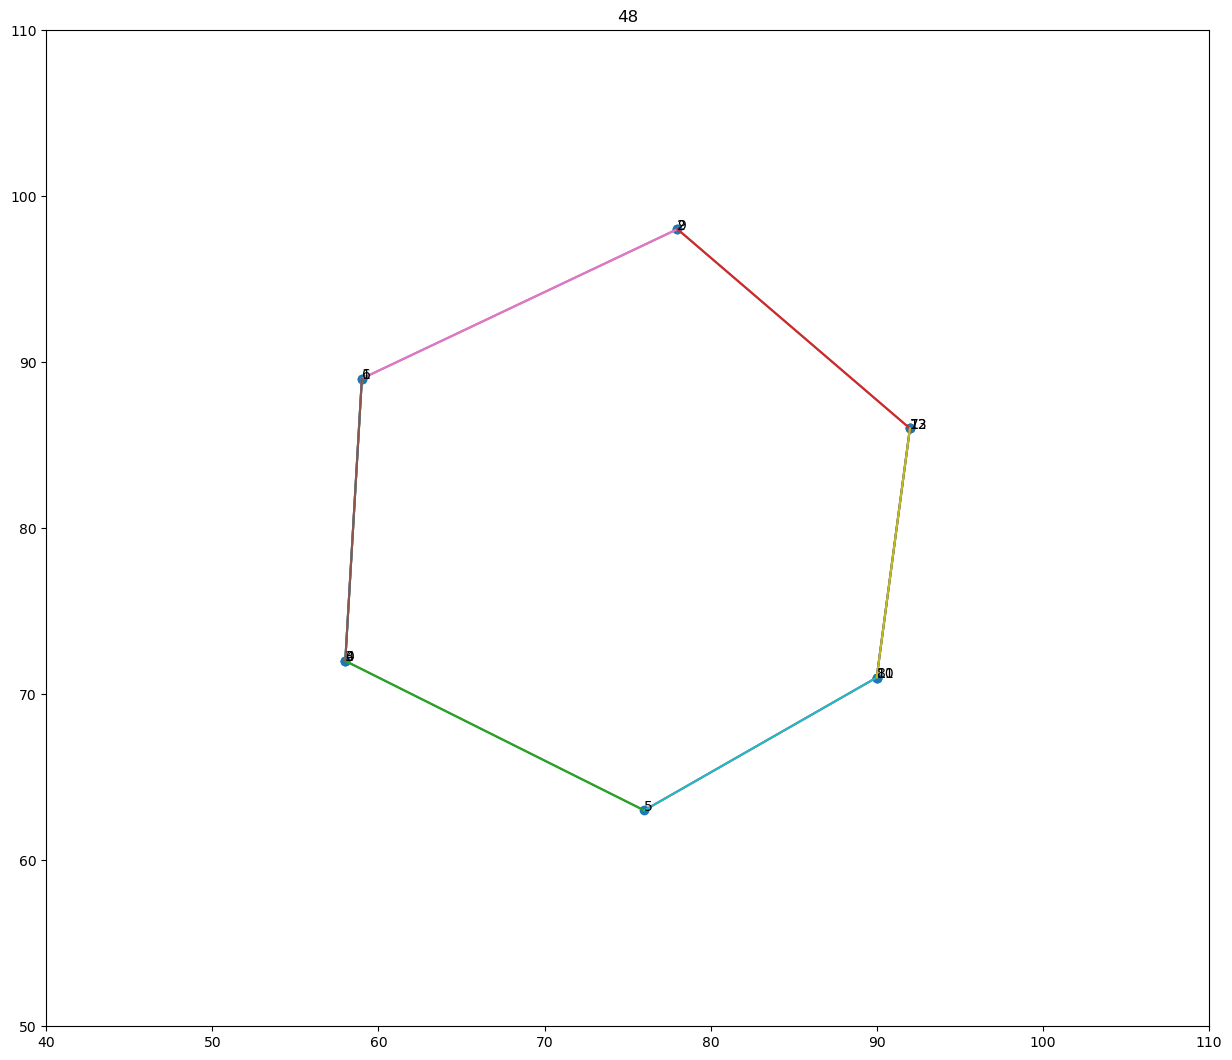

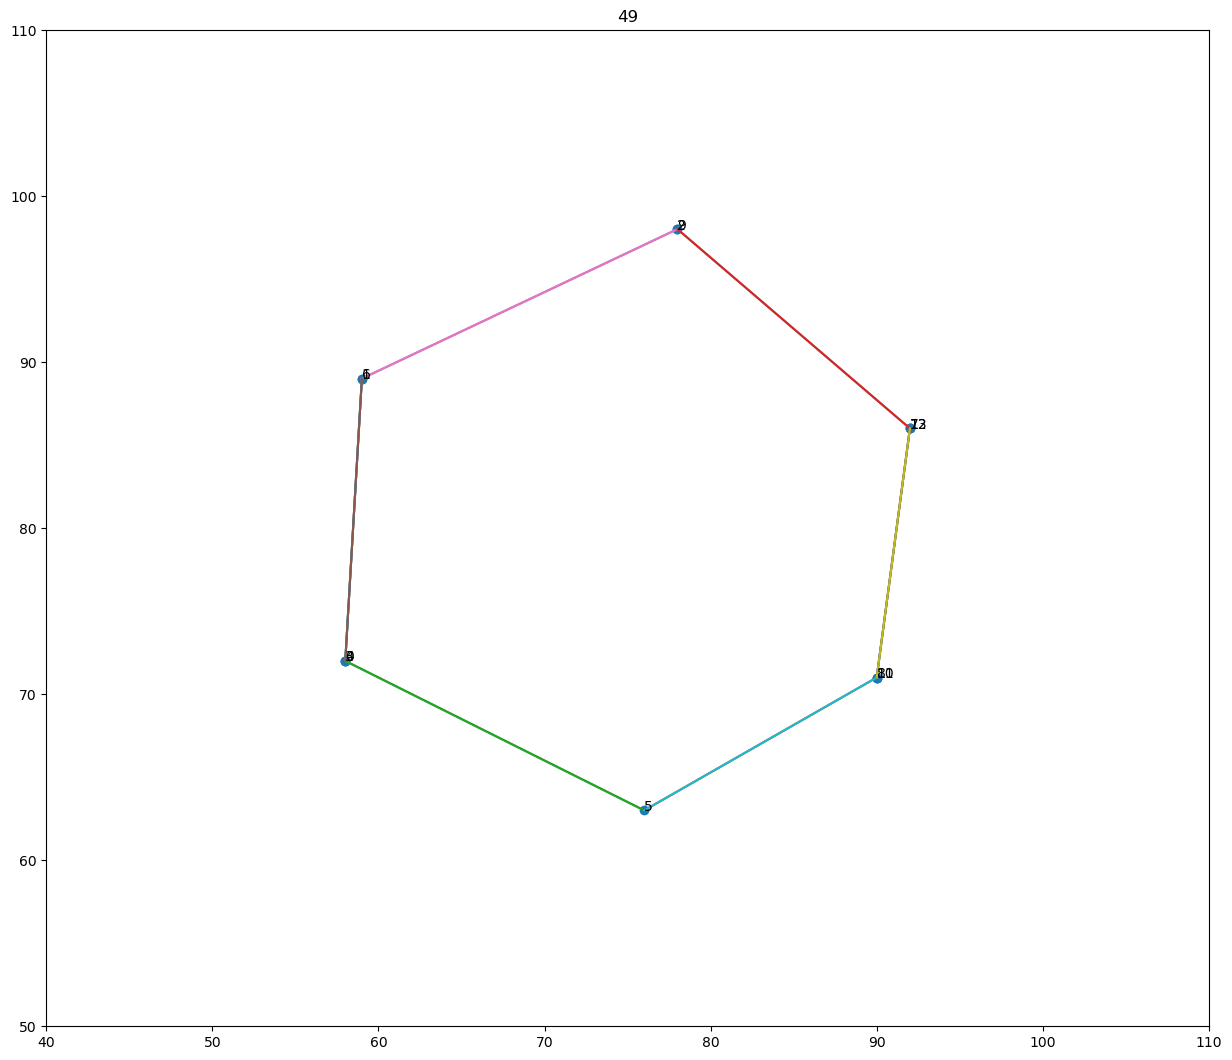

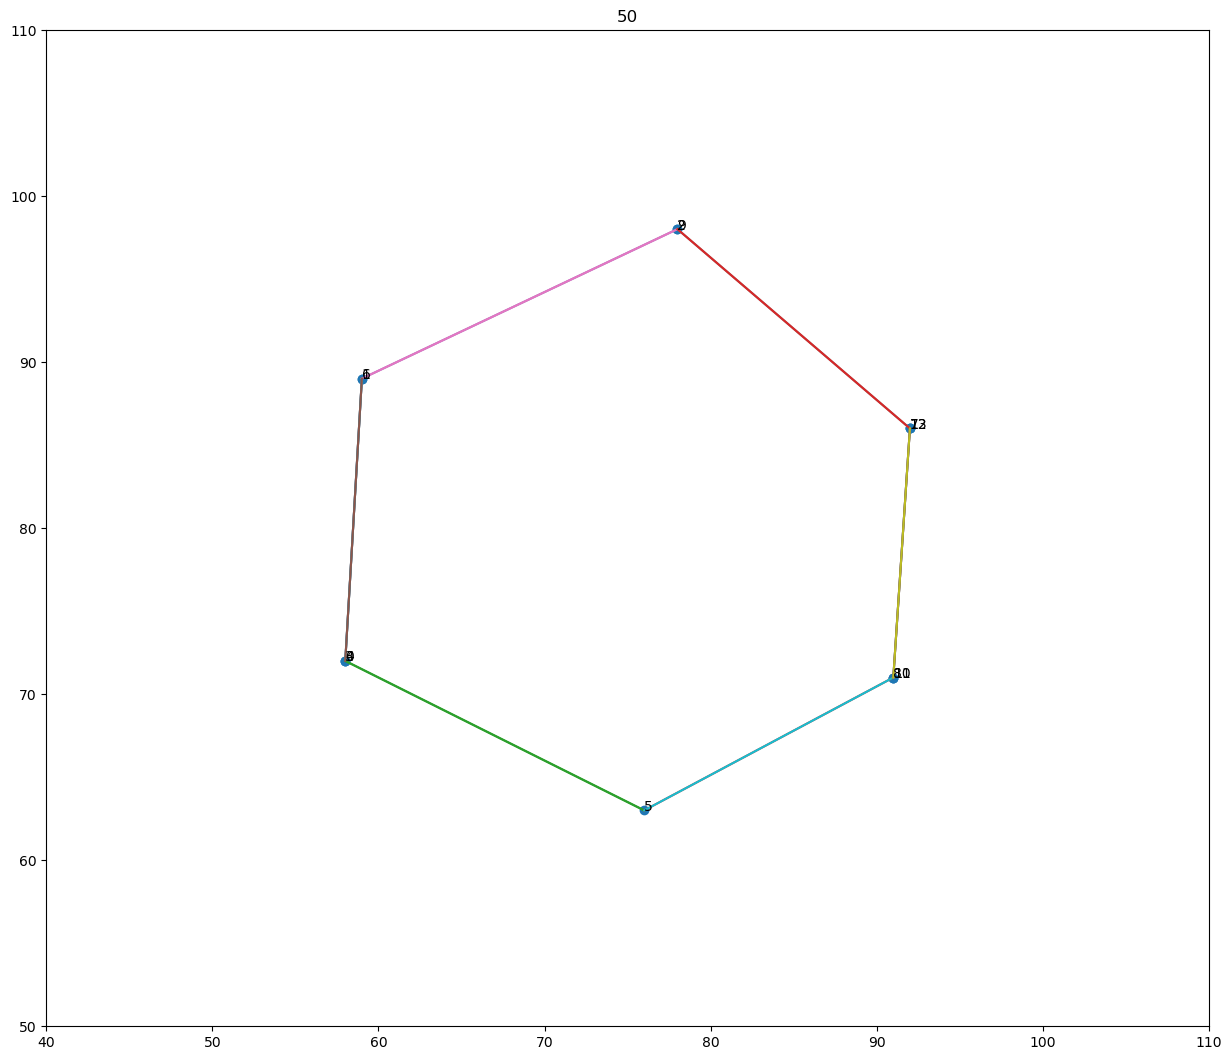

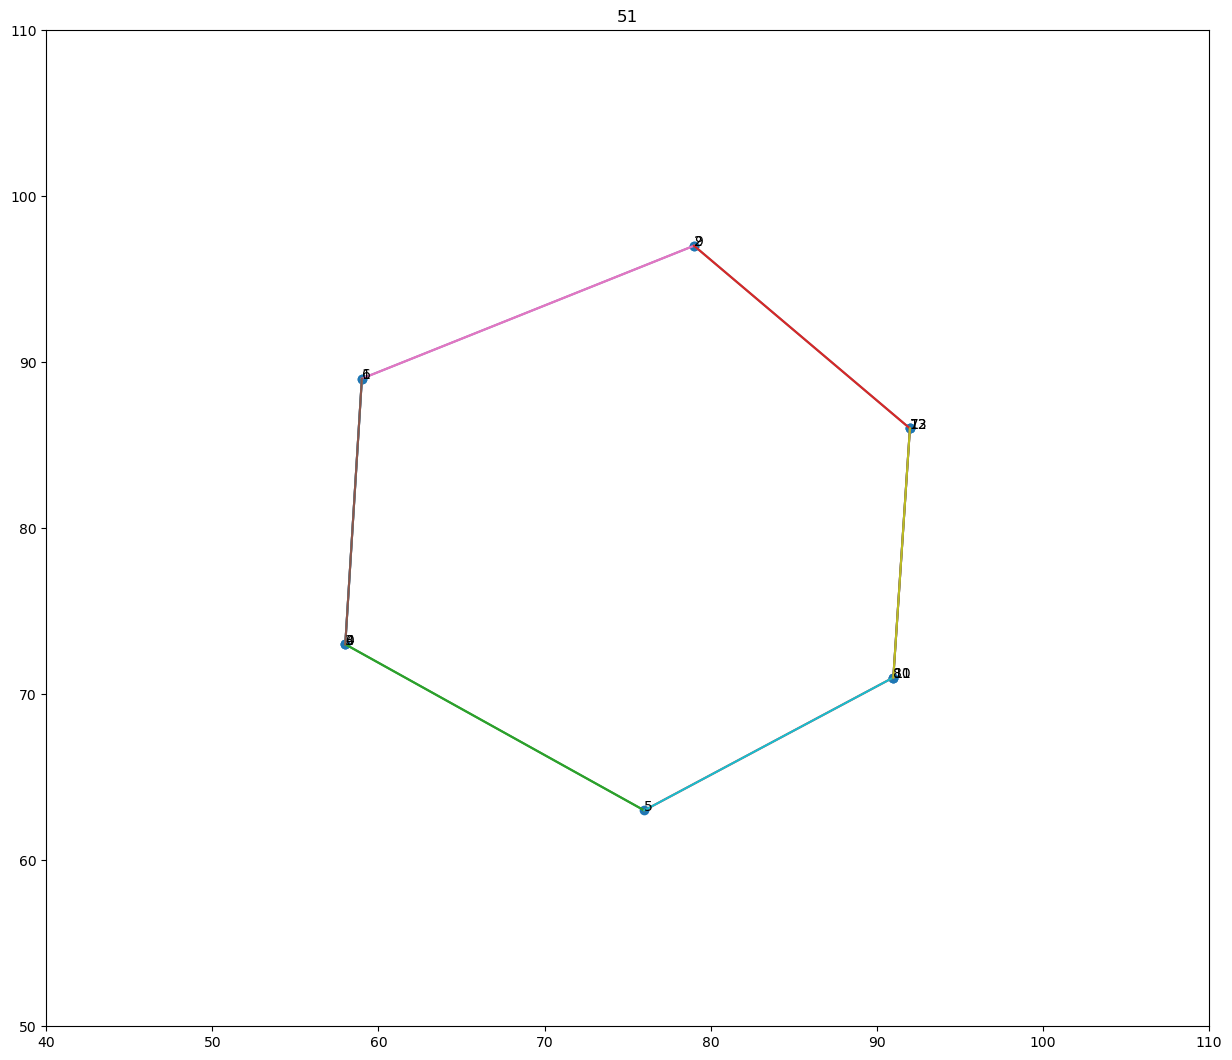

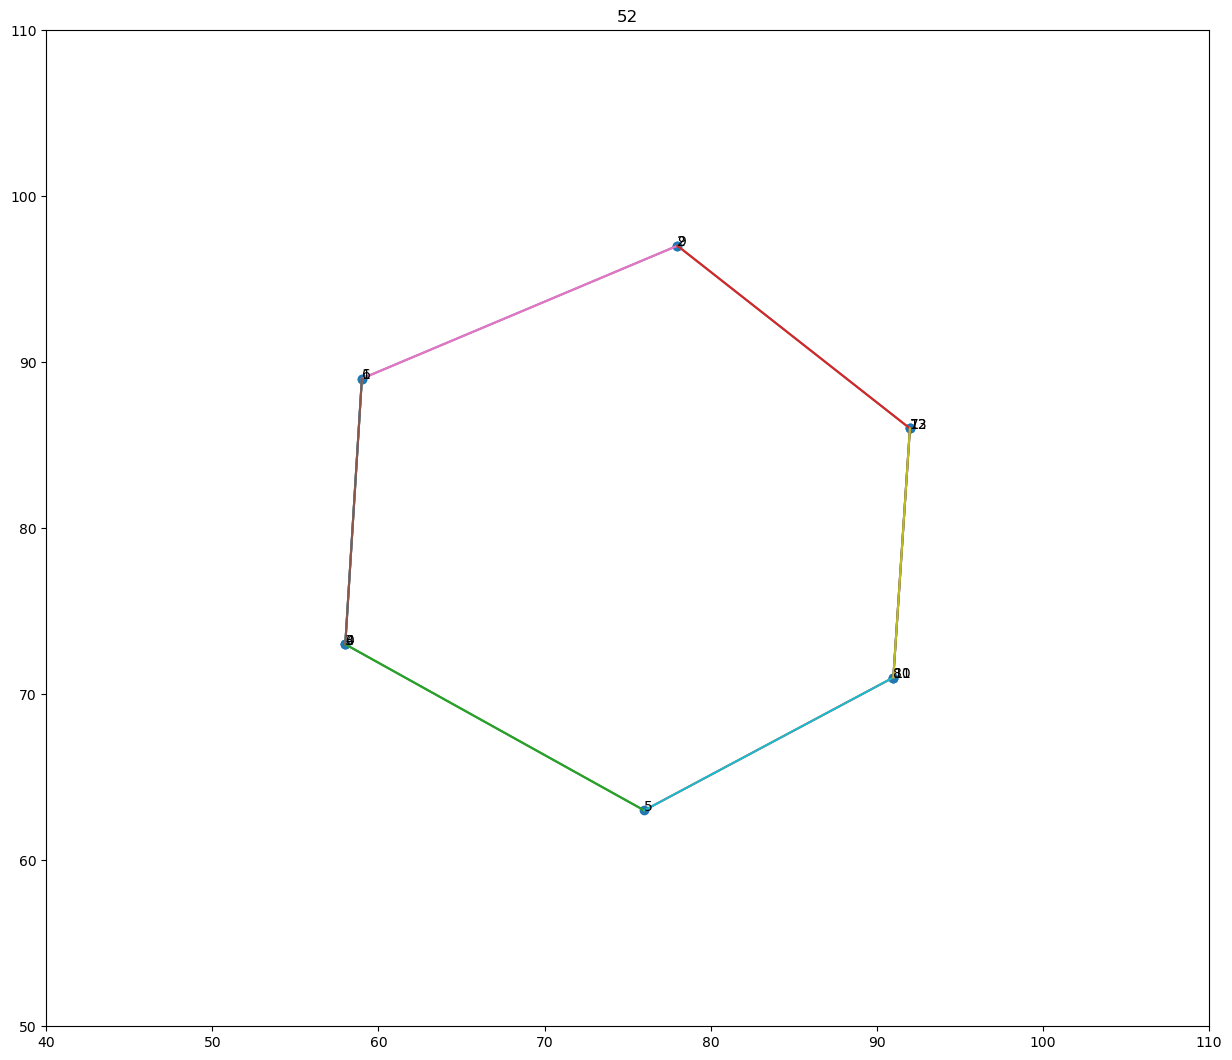

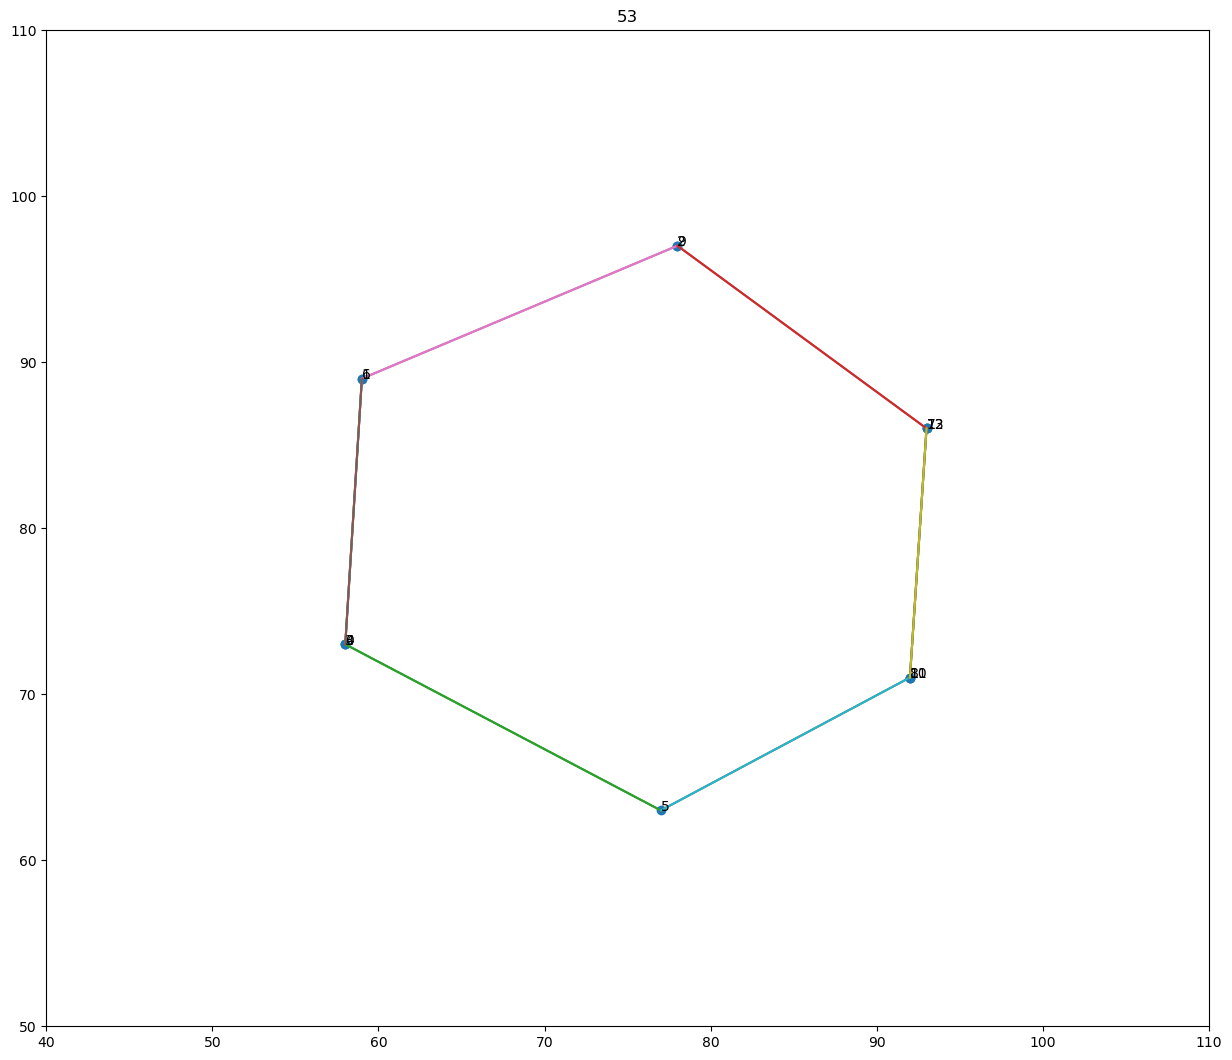

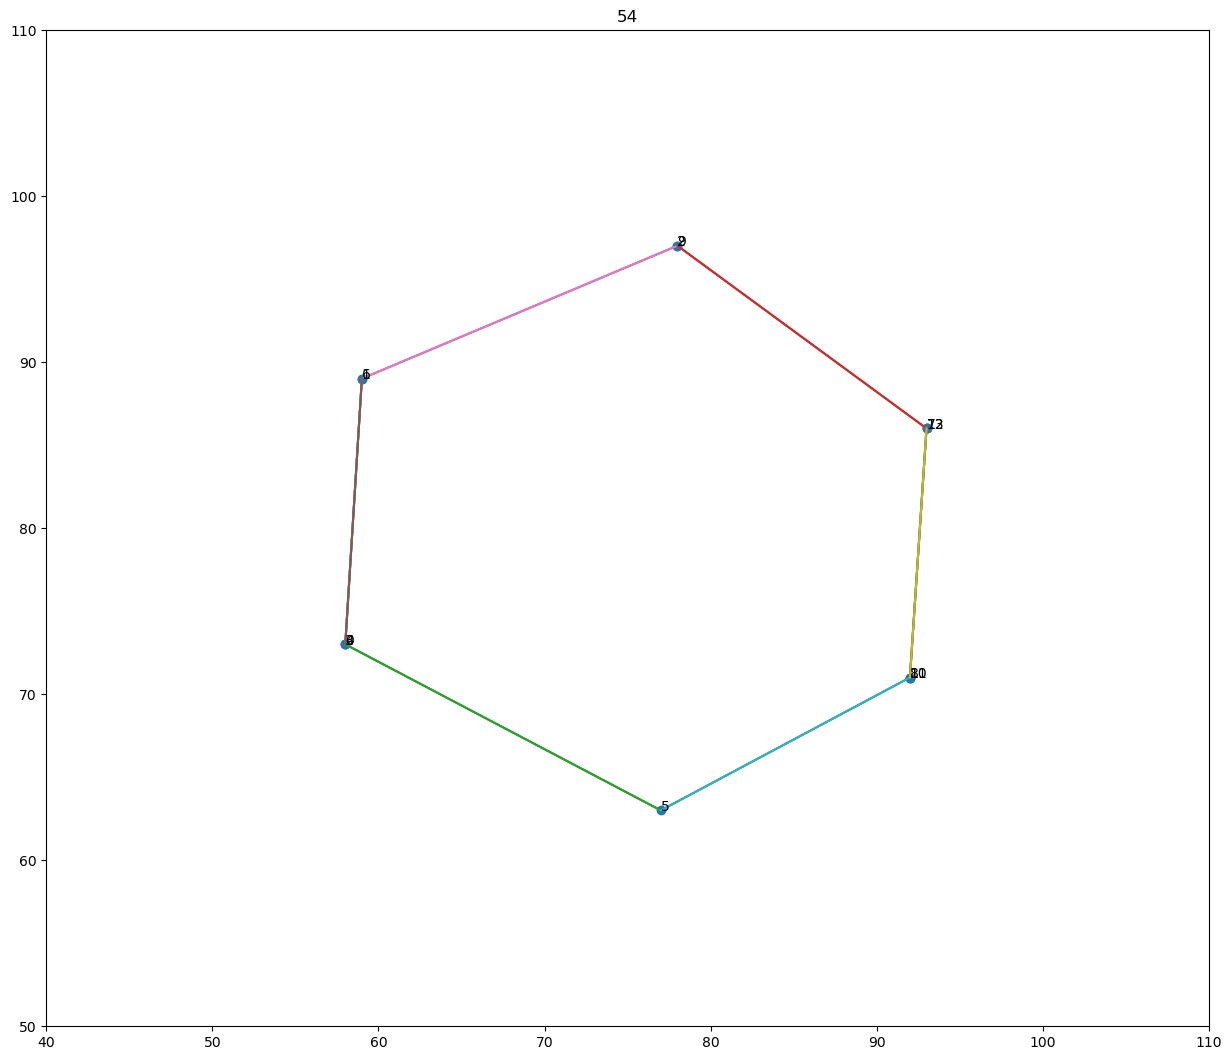

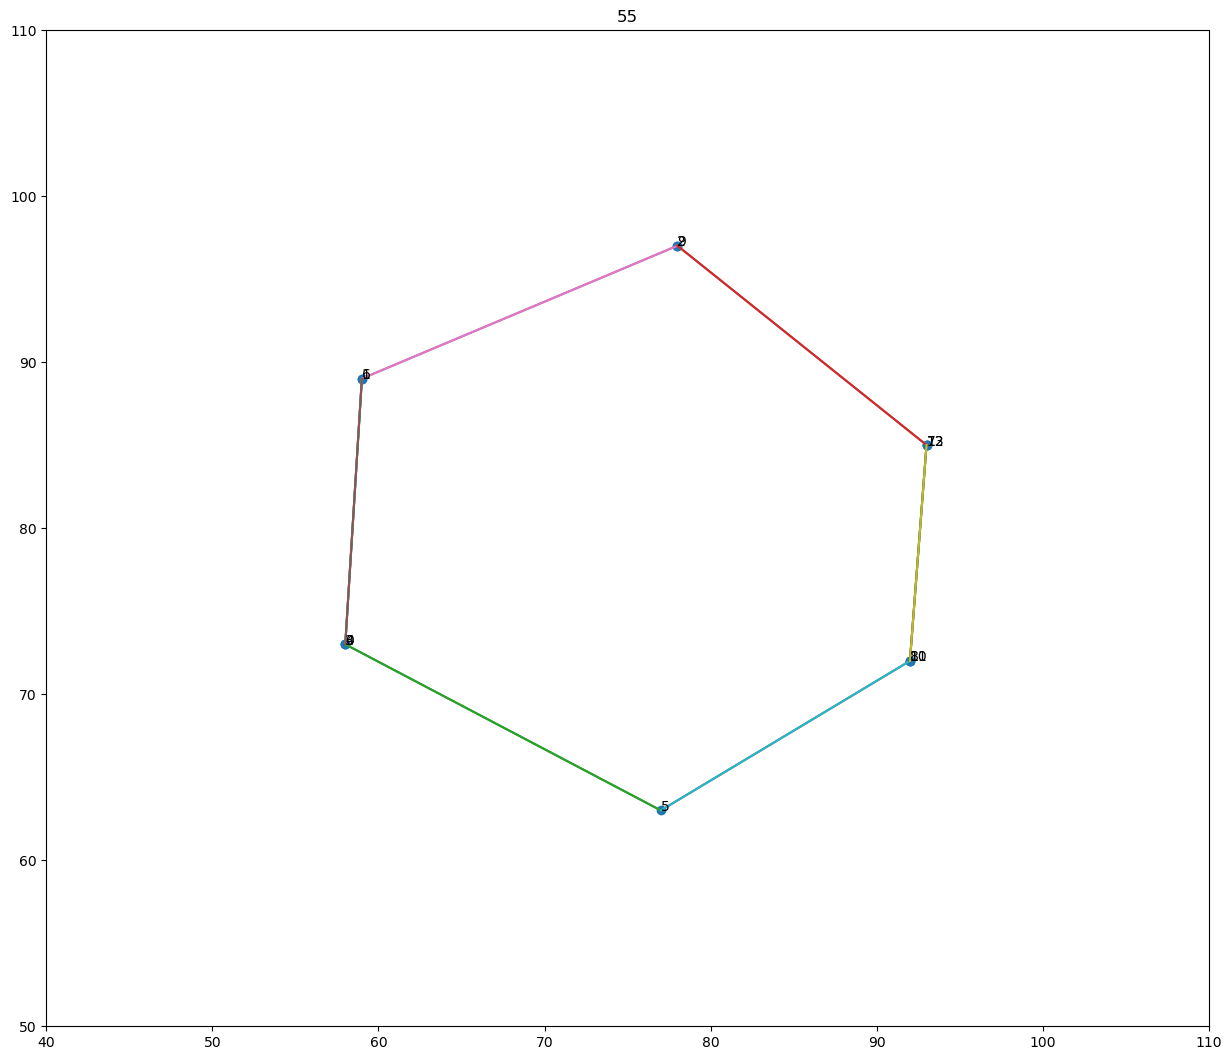

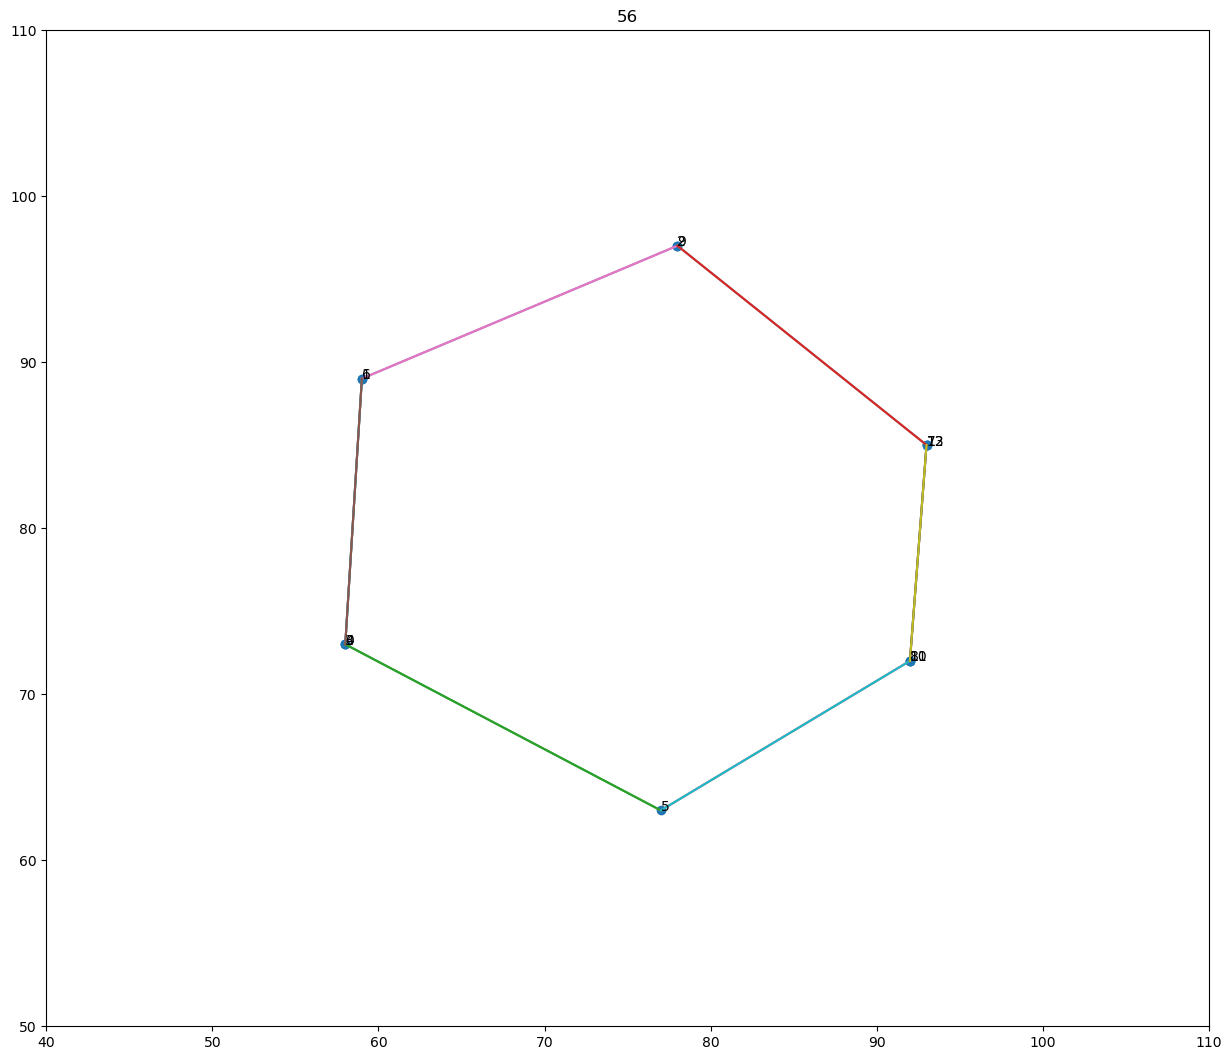

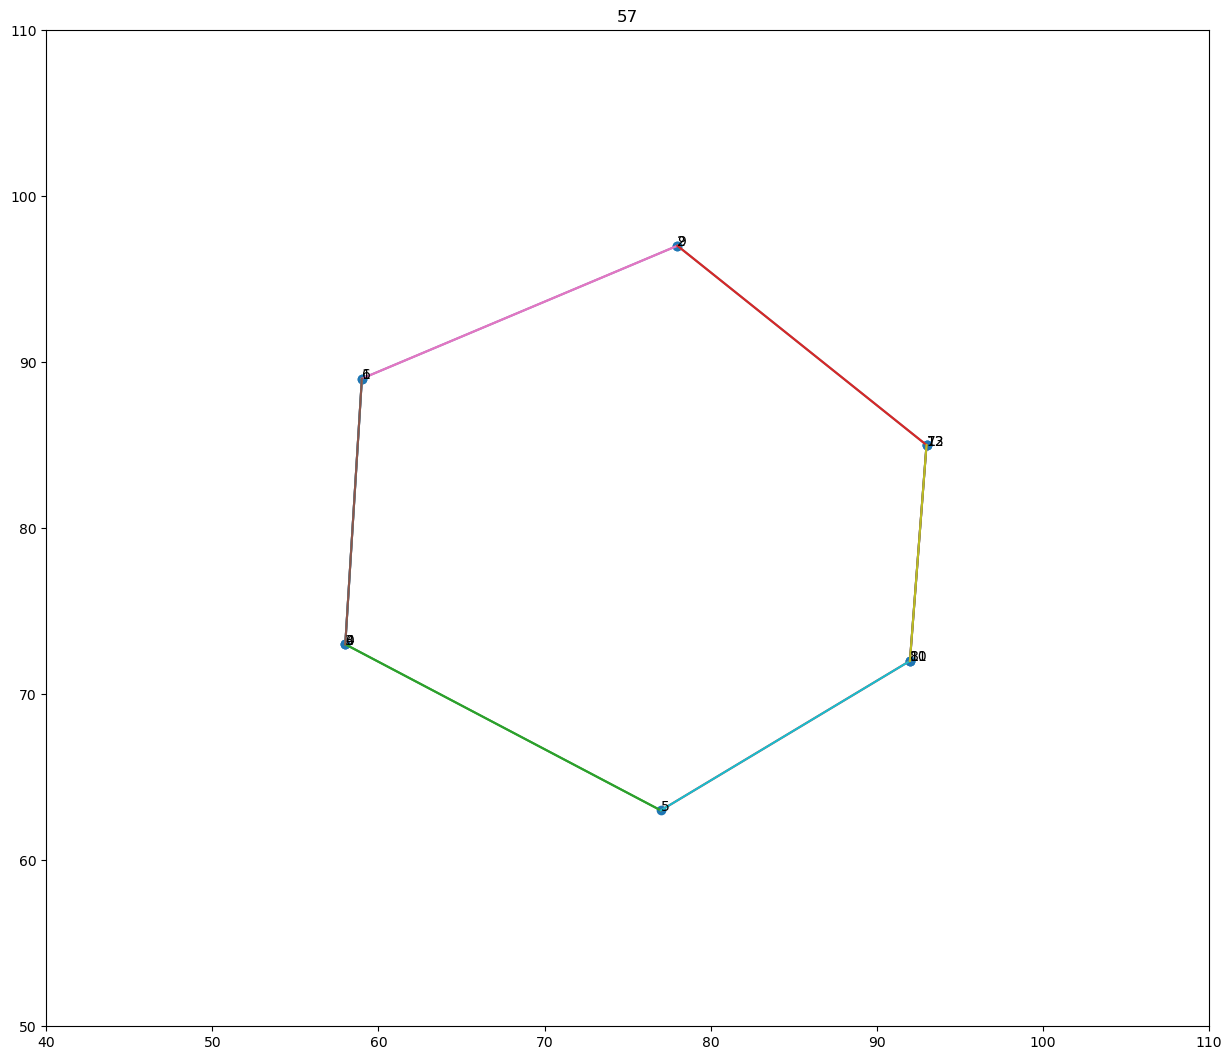

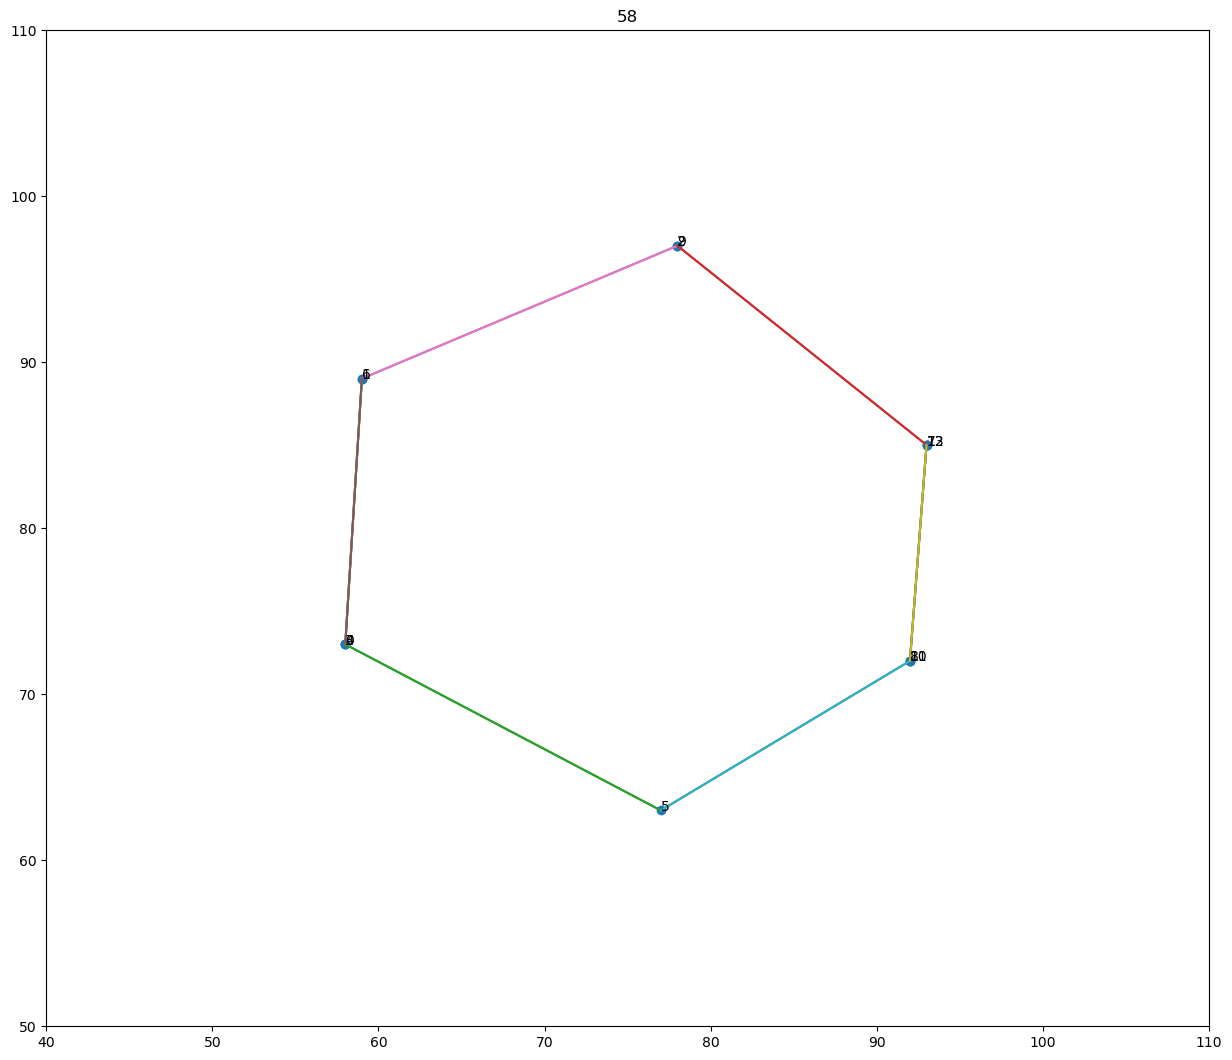

In [13]:
save_plots(tp_dict, adj_dict)

In [14]:
with imageio.get_writer('track_plots/tr_plots.gif', mode='I') as writer:
    for i in range(59):
        filename = f'track_plots/plot_{i}.png'
        image = imageio.imread(filename)
        writer.append_data(image)

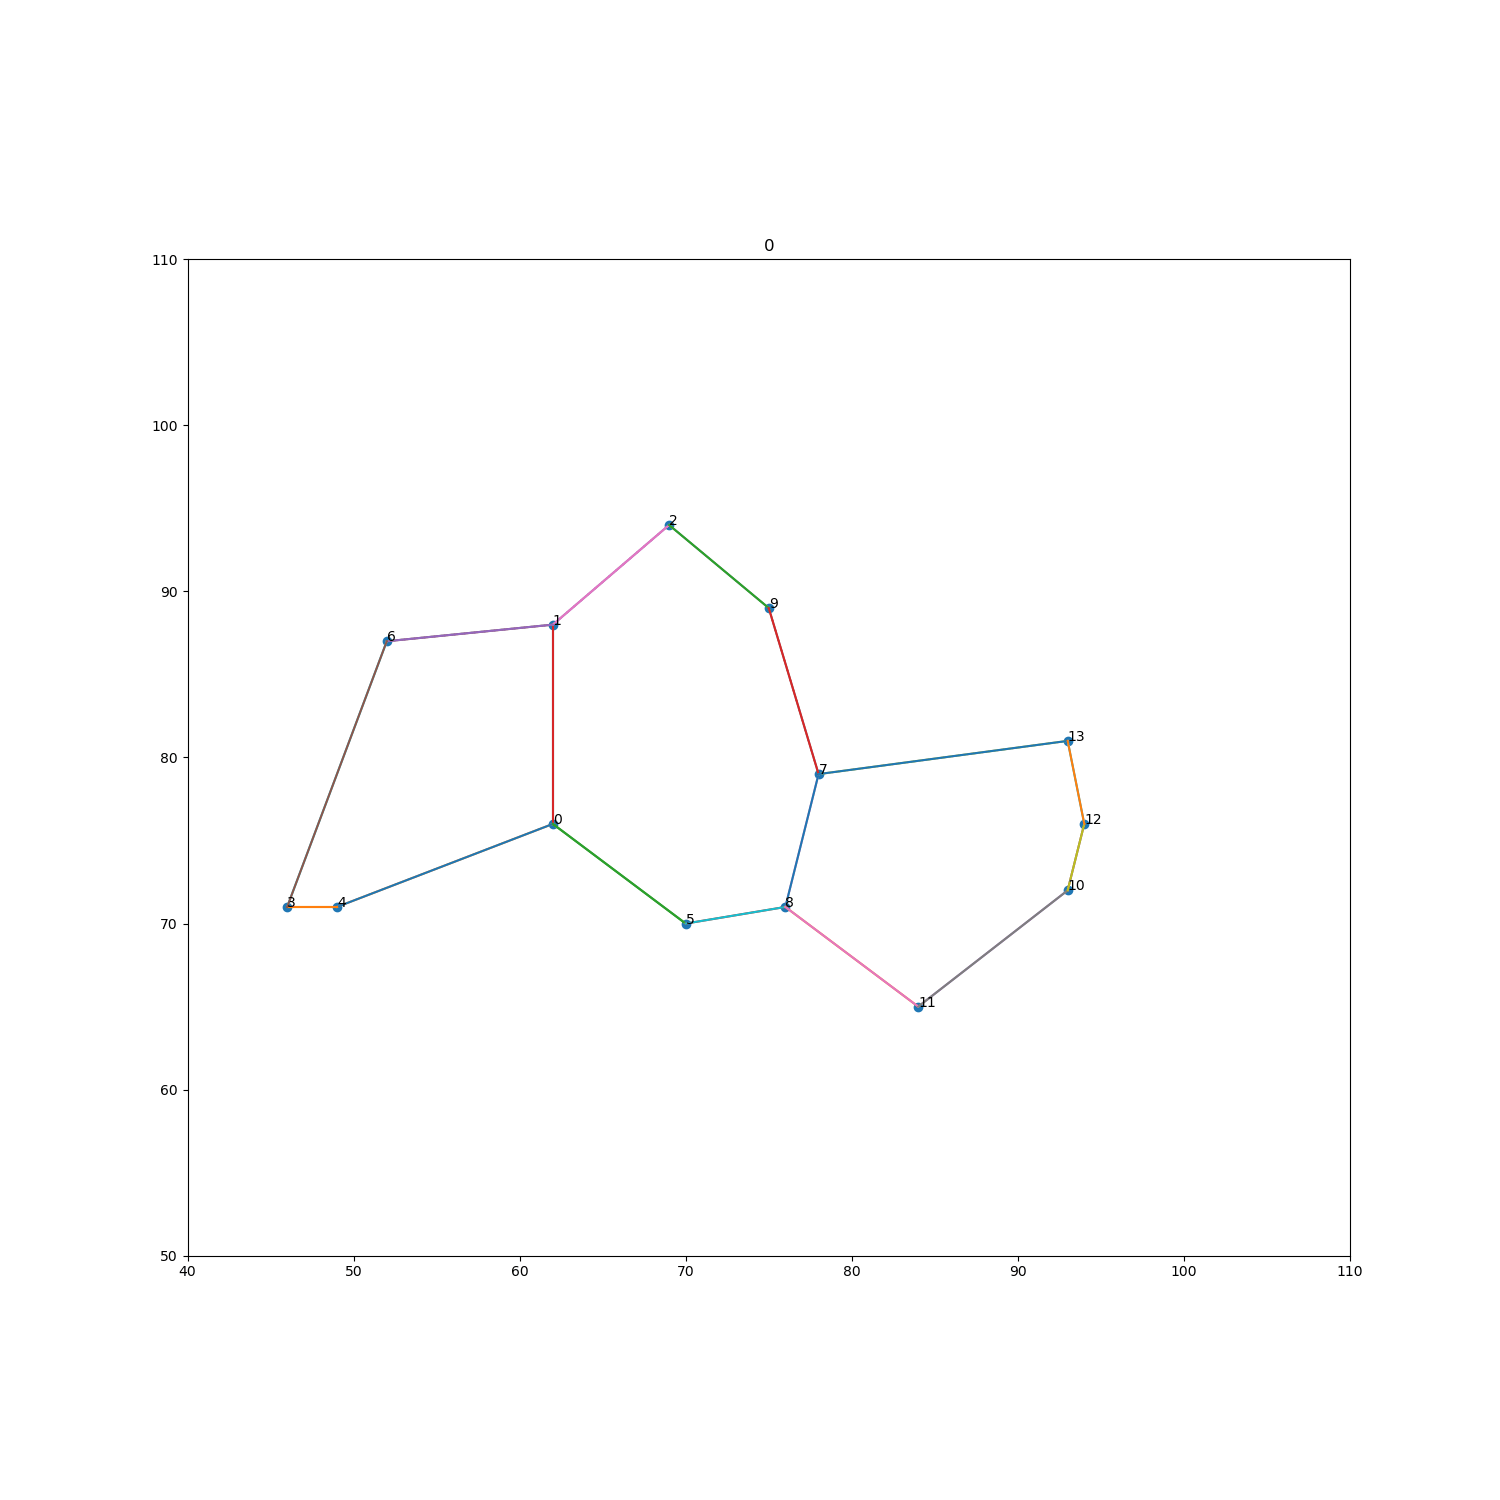

In [15]:
Image(filename='track_plots/tr_plots.gif')

In [48]:
with open('Trajectories/tracks.pickle', 'wb') as handle:
    pickle.dump(tp_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
with open('Trajectories/adj_mat.pickle', 'wb') as handle:
    pickle.dump(adj_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
indices = np.where(adj_dict != 0)

In [22]:
tp_dict[0].shape

(14, 2)

In [44]:
tp_matrix = np.zeros((14,2,59))
adj_matrix = np.zeros((14,14,59))

In [45]:
for i in range(59):
    tp_matrix[:,:,i] = tp_dict[i]
    adj_matrix[:,:,i] = adj_dict[i]

In [55]:
adj_matrix[:,:,0].shape

(14, 14)

In [40]:
tp_dict[3]

array([[61., 76.],
       [60., 86.],
       [69., 93.],
       [49., 72.],
       [54., 71.],
       [68., 70.],
       [51., 86.],
       [79., 80.],
       [77., 72.],
       [77., 88.],
       [94., 70.],
       [83., 66.],
       [96., 76.],
       [93., 80.]])